# Social Network Analysis - Amber Heard Case - Instagram
Adel Abu Hashim & Mahmoud Nagy - November 2021

## Table of Contents
<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>This case study aims to help **Amber Heard** <br>
> 
> By analyzing new accounts posting/ commenting against a victim of a Social Bot Disinformation/Influence Operation. 
> 
> **We have two main datasets**: <br>
>(The datasets screaped from **Instagram**).
> - 1- A dataset with posts data.
> - 2- A dataset with comments data.

In [978]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go
import warnings
import re
import seaborn as sb
import re
import pickle

warnings.filterwarnings("ignore")

import plotly.io as pio
from helpers import barh, pie, get_top, handler, isnull, bar, bar_peaks, draw_heatmap, facet_heat, facet_days, SameText

pio.renderers
# pio.renderers.default = "svg"
svg_renderer = pio.renderers["svg"]
svg_renderer.width = 950
svg_renderer.height = 550

%matplotlib inline

In [979]:
os.chdir("../Data")

In [980]:
ls

1Mil Instagram AH SNA comments.zip
Instagram Posts - AH 2018-2021 study 193K.zip
Instagram SNA AH comments.zip
comments.csv
comments_cleaned.csv
comments_text.csv
negative_text.pkl
negative_users.pkl
posts.csv
posts_cleaned.csv


In [981]:
original_comments = pd.read_csv('comments.csv')

In [982]:
original_comments.head()

,message,timestamp,id,n_replies,n_likes,media_id,in_reply_to,from.id,from.username,from.is_verified,from.url,from.profile_pic
0,#scarlettjohansson #alexandradaddario #emiliac...,1.592888e+09,1.791523e+16,0.0,0.0,2.337635e+18,NaN,3.988264e+09,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,NaN
1,🔥🔥❤️,1.592888e+09,1.784587e+16,0.0,0.0,2.337635e+18,NaN,3.988264e+09,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,NaN
2,Very beautiful 😘❤️❤️❤️i love you very much 😍💘💘...,1.592888e+09,1.788947e+16,0.0,0.0,2.337635e+18,NaN,1.230201e+10,fr.ederic2368,False,https://www.instagram.com/fr.ederic2368,NaN
3,❤️❤️❤️❤️❤️❤️,1.592889e+09,1.786950e+16,0.0,0.0,2.337635e+18,NaN,2.490417e+09,muataz_87,False,https://www.instagram.com/muataz_87,NaN
4,Bombón bello 💖💖💖💖💖,1.592889e+09,1.806608e+16,0.0,0.0,2.337635e+18,NaN,1.521544e+09,jorgero122129,False,https://www.instagram.com/jorgero122129,NaN


<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda"><b>Exploratory Data Analysis</b></a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='posts'></a>
## Posts
<ul>
<li><a href="#posts"><b>Posts</b></a></li>  
<li><a href="#comments">Comments</a></li>  
</ul>

><ul>
 <li><a href="#top_posted">Top posted users</a></li>
 <li><a href="#captions">Captions</a></li>  
 <li><a href="#image_video">Image or Video</a></li>  
 <li><a href="#loc">Locations</a></li>  
 </ul>

In [983]:
df_posts = pd.read_csv("posts_cleaned.csv")
print(df_posts.shape)
df_posts.head()

(193967, 7)


,id,is_video,caption,location,user_id,username,account_url
0,2312672024680952662,False,According to the Digital trends: Visual effect...,Hollywood,32529918546,cinescenes_,https://www.instagram.com/cinescenes_
1,2337634847974873162,False,My girl❤️,NaN,3988263563,scarlettjohansonoffcial,https://www.instagram.com/scarlettjohansonoffcial
2,2383123126627446477,False,❤❤❤\n#eizagonzalez #alexandradaddario\n#jennif...,"Los Angeles, California",38331031416,divine.hollywood.women,https://www.instagram.com/divine.hollywood.women
3,2389292367830952143,False,Use #KarenGillanslover \nThe smile kills me.😍😍...,NaN,18754453450,karen_gillans_lover,https://www.instagram.com/karen_gillans_lover
4,2484525220804152653,False,.\nجانی دپ به دنبال پروژه\u200cای جدید جهت نقش...,NaN,7105766142,cinemafars.official,https://www.instagram.com/cinemafars.official


In [984]:
df_posts["id"] = df_posts["id"].astype("str")
df_posts["user_id"] = df_posts["user_id"].astype("str")
df_posts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193967 entries, 0 to 193966
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           193967 non-null  object
 1   is_video     193967 non-null  bool  
 2   caption      193586 non-null  object
 3   location     22682 non-null   object
 4   user_id      193967 non-null  object
 5   username     193967 non-null  object
 6   account_url  193967 non-null  object
dtypes: bool(1), object(6)
memory usage: 9.1+ MB


In [985]:
isnull(df_posts)

The number of NaNs in id: 0
The number of NaNs in is_video: 0
The number of NaNs in caption: 381
The number of NaNs in location: 171285
The number of NaNs in user_id: 0
The number of NaNs in username: 0
The number of NaNs in account_url: 0


In [986]:
total_posts = df_posts.shape[0]
total_posted_users = df_posts["username"].nunique()

In [987]:
print(f"total number of posts {total_posts} by {total_posted_users} users")

total number of posts 193967 by 36137 users


<a id='top_posted'></a>
>### Top posted users
> <ul>
 <li><a href="#top_posted"><b>Top posted users</b></a></li>
 <li><a href="#captions">Captions</a></li>  
 <li><a href="#image_video">Image or Video</a></li>  
 <li><a href="#loc">Locations</a></li>  
 </ul>

In [988]:
df_top_users_posts = get_top(
    df_posts, col="username", n=10, column_name="username", count_name="n_posts"
)
df_top_users_posts

,username,n_posts
0,ijasonmomoa,2639
1,queenamberheard,2622
2,master_clondike,2464
3,heard_addicted,2285
4,amberheardit,2010
5,amber_heard_diehard_fans_india,1797
6,_actor_movie,1569
7,amberheardaily,1497
8,ashleytisdale6_,1390
9,instaupdatess,1346



Investigated --> These Users are Posting Normal Comments



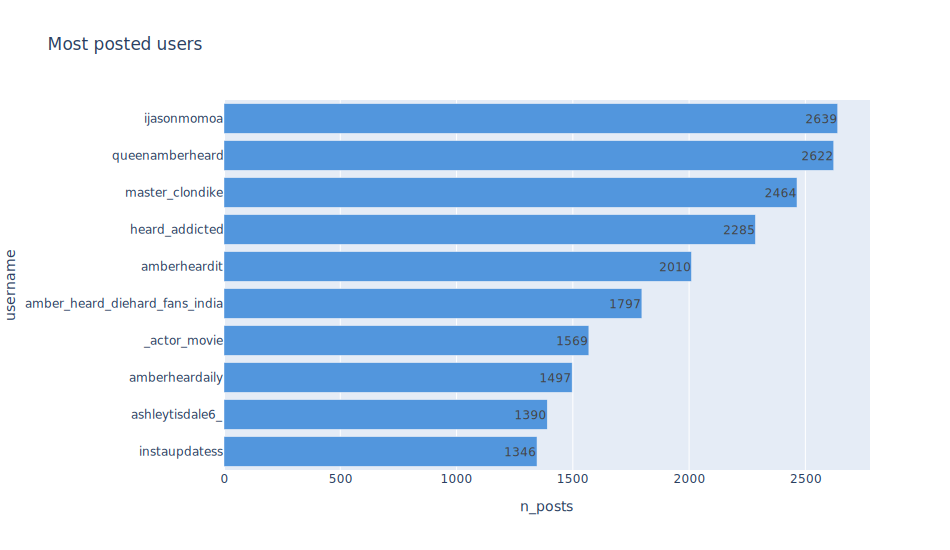

In [989]:
print("\nInvestigated --> These Users are Posting Normal Comments\n")
barh(df_top_users_posts, "Most posted users")

<a id='captions'></a>
>### Captions
> <ul>
 <li><a href="#top_posted">Top posted users</a></li>
 <li><a href="#captions"><b>Captions</b></a></li>  
 <li><a href="#image_video">Image or Video</a></li>  
 <li><a href="#loc">Locations</a></li>  
 </ul>

In [990]:
df_posts.query("username == 'instaupdatess'").caption.value_counts().head(20)

🖤\n➖➖➖➖➖➖➖➖➖➖➖ Gal Gadot ♥️\n\n#galgadot #wonderwoman #dianaprince #galgadotsexy #elizabetholsen #scarlettjohansson #margotrobbie #jenniferlawrence #pattyjenkins #brielarson #hollywood #queen #girl #selenagomez #alexandradaddario #amberheard #emmanuellechriqui #bhfyp #hollywoodcelebrity #actress #milakunis #victoriajustice #hollywoodcelebrity #hollywoodgirl #bollywoodactress #bollywoodstyle #hollywoodlook #hollywoodsexy #galgadothot #ighollywood #jenniferlawrence #kristenstewart                                                                                                                                    76
🖤\n➖➖➖➖➖➖➖➖➖ Amber Heard ♥️\n•\n#amberheard #aquaman #mera #jasonmomoa #hollywood #queen #girl #victoriajustice #humanrights #amber #amberheardfans #follow #johnnydepp #margotrobbie #amberheardedit #actress #jenniferlawrence #galgadot #gameofthrones #angelinajolie #alexandradaddario #brielarson #meganfox #milakunis #bhfyp #throwback #scarlettjohansson #emiliaclarke #amberheardsty

In [991]:
df_posts.caption.value_counts().head()

#jason #jasonmomoa #khaldrogo #aquaman #prideofgypsies #jasonmomoafans #jasonmomoanews #jasonmomoaupdates #jasonmomoafanpage #jasonmomoaedit #jasonmomoaofficial #arthurcurry #lisabonet #emiliaclarke #momoa #jasonmomoaaquaman #aquamanmovie #conanthebarbarian #amberheard #alohaj #gameofthrones #khaldrogo                                                                                                                                                                                                                                                                                                                                                          2569
❤❤❤\n#eizagonzalez #alexandradaddario\n#jenniferlawrence #katebeckinsale #sexyactress #jenniferaniston #scarlettjohansson #amberheard #nicolekidman #emmastone  #emmawatson #kyliejenner #kareenakapoor #katrinakaif #kimkardashian #katherinelangford #kendalljenner #kattyperry #aliabhatt #shraddhakapoor #dishapatani #deepikapadukone #priyankachopra

### #jason #jasonmomoa #khaldrogo #aquaman #prideofgypsies #jasonmomoafans #jasonmomoanews #jasonmomoaupdates #jasonmomoafanpage #jasonmomoaedit #jasonmomoaofficial #arthurcurry #lisabonet #emiliaclarke #momoa #jasonmomoaaquaman #aquamanmovie #conanthebarbarian #amberheard #alohaj #gameofthrones #khaldrogo     

In [992]:
df_posts.query(" caption == @df_posts.caption.value_counts().index[0] ")[
    "username"
].value_counts()

ijasonmomoa        2566
thegameoflaughs       2
ompriscila            1
Name: username, dtype: int64

In [993]:
df_posts.query(" caption == @df_posts.caption.value_counts().index[0] ")[
    "location"
].value_counts()

Series([], Name: location, dtype: int64)

In [994]:
img_video = get_top(
    df_posts.query(" caption == @df_posts.caption.value_counts().index[0] "),
    col="is_video",
    n=0,
    column_name="type",
    count_name="n_posts",
)
img_video["type"] = ["image", "video"]
img_video

,type,n_posts
0,image,2546
1,video,23


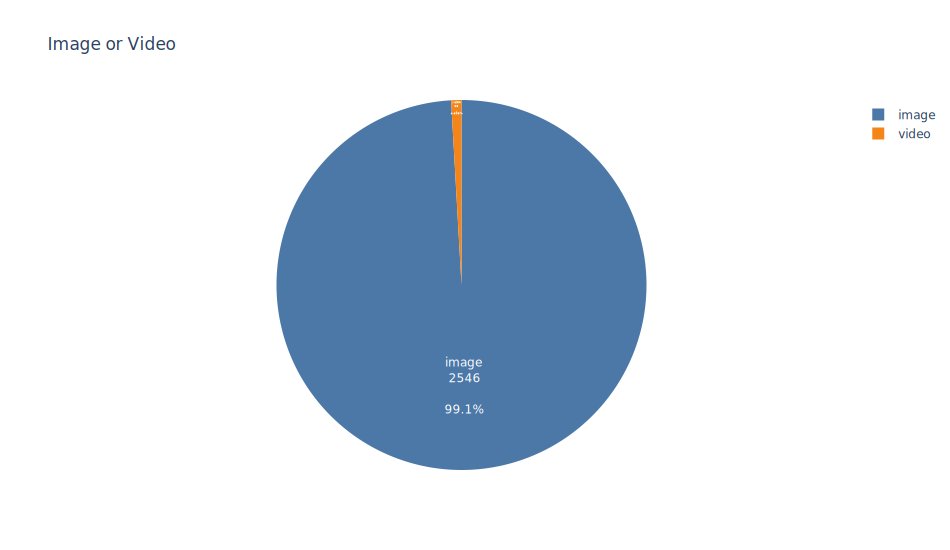

In [995]:
pie(img_video, "Image or Video")

#### This text was made by 3 users
    - ijasonmomoa        2566
    - thegameoflaughs       2
    - ompriscila            1
#### 99.1% of posts are images 
#### No loctations for those images

### ❤❤❤\n#eizagonzalez #alexandradaddario\n#jenniferlawrence #katebeckinsale #sexyactress #jenniferaniston #scarlettjohansson #amberheard #nicolekidman #emmastone  #emmawatson #kyliejenner #kareenakapoor #katrinakaif #kimkardashian #katherinelangford #kendalljenner #kattyperry #aliabhatt #shraddhakapoor #dishapatani #deepikapadukone #priyankachopra  #kendalljenner #shraddhakapoor #dishapatani #naomiscott #angelinajolie #annehathaway #hollywoodactress #hotactress #hottness #hotactressaddicts   

In [996]:
df_posts.query(" caption == @df_posts.caption.value_counts().index[1] ")[
    "username"
].value_counts()

divine.hollywood.women    713
divine.bollywood.women    558
glambeauty2964            332
divine.women12964          13
imoviral                    2
rinkuchoudhary5457          1
Name: username, dtype: int64

In [997]:
df_posts.query(" caption == @df_posts.caption.value_counts().index[1] ")[
    "location"
].value_counts()

New York, New York                       768
Los Angeles, California                  567
Paris, France                            178
New York City , USA                       19
Frankfurt, Germany                        18
New York City U.S.A.                      15
California                                 5
Long Beach, California                     5
Dabboo Ratnani Studio                      4
London, United Kingdom                     4
California, USA                            3
New Downtown, Los Angeles, California      2
Philippines                                2
Dubai, United Arab Emirates                2
Philipines Boracay Island                  1
Bangkok, Thailand                          1
New York City                              1
Mexico                                     1
Maharashtra Mumbai                         1
Los Angeles County Hall of Records         1
Dubbai                                     1
Goa Beach                                  1
Italy     

In [998]:
img_video = get_top(
    df_posts.query(" caption == @df_posts.caption.value_counts().index[1] "),
    col="is_video",
    n=0,
    column_name="type",
    count_name="n_posts",
)
img_video["type"] = ["image", "video"]
img_video

,type,n_posts
0,image,1591
1,video,28


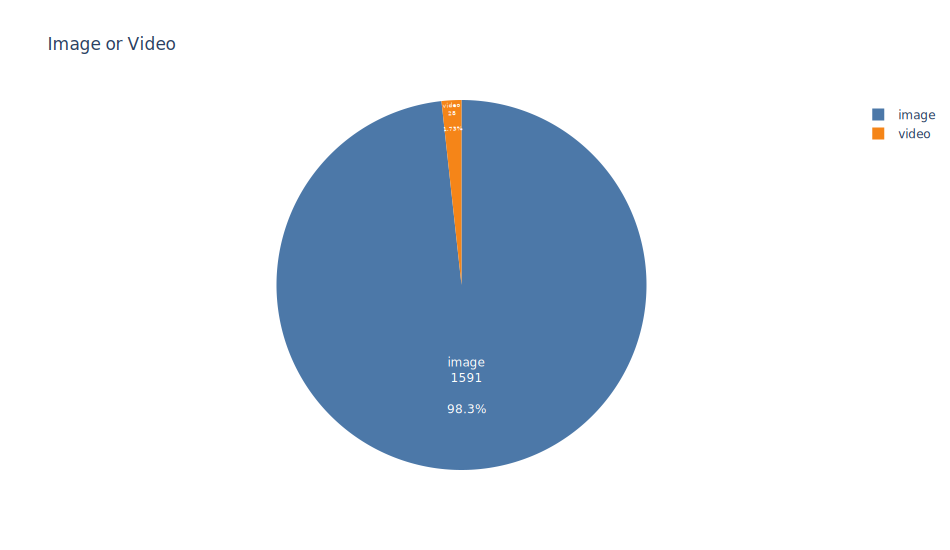

In [999]:
pie(img_video, "Image or Video")

#### This text was made by 6 users
    - divine.hollywood.women    713
    - divine.bollywood.women    558
    - glambeauty2964            332
    - divine.women12964          13
    - imoviral                    2
    - rinkuchoudhary5457          1
#### 98.3% of posts are images
#### Top Locations are
    - New York, New York           768
    - Los Angeles, California      567
    - Paris, France                178

### Available for sale.......Paypal payment accepted ...For worldwide delivery ... DM me if you are interested\nHigh quality stone💯\n\n#rockhound #stoneforsale #cabsforsale #jewelrymaker #jewelry #wirework #wireworkjewelry #canada #lapidary #lapidaryart #jasper #minerals #stonecollection #cabochon #chabochons #silversmithing #wirework #wireworkjewelry #canada #lapidary #lapidaryart #jasper #minerals #stonecollection #cabochon #chabochons #silversmithing #wireartists #wirolljewelry #wireartists # wireverschons #workmith #metalsmith #wireartists #gemstonejewelry #amberheard #bumblebee #bumblebeejasper #bumblebees #instajewelry #gemstonejewelry

In [1000]:
df_posts.query(" caption == @df_posts.caption.value_counts().index[2] ")[
    "username"
].nunique()

24

In [1001]:
df_posts.query(" caption == @df_posts.caption.value_counts().index[2] ")[
    "username"
].value_counts()

junot_aji                   188
naturecrystal_wholeseler    145
crystalstone_natural        124
cv.alifa_gamstone           110
crystals_wholesaler         107
cv.alifa_permata             68
aisha_alifa280917            54
crystals.snow_               48
usman_stone_natural          33
pairuz6                      27
momsadeli                    25
crystal_stone03              21
bengbeng_crystal98           17
crystal_stone255             14
moms_crystal                 10
paul_rich_walker              9
the.brilliant.stones_11       7
dogol_gemstone                5
rindiicrystalstone            4
crystalhasby.id               3
akbartrodriguezzii            3
natural_stone_mason           2
hapipah891                    1
perdian_crazy_cristal         1
Name: username, dtype: int64

In [1002]:
df_posts.query(" caption == @df_posts.caption.value_counts().index[2] ")[
    "location"
].value_counts()

Cipamingkis, Jawa Barat, Indonesia    1
Name: location, dtype: int64

In [1003]:
img_video = get_top(
    df_posts.query(" caption == @df_posts.caption.value_counts().index[2] "),
    col="is_video",
    n=0,
    column_name="type",
    count_name="n_posts",
)
img_video["type"] = ["image", "video"]
img_video

,type,n_posts
0,image,977
1,video,49


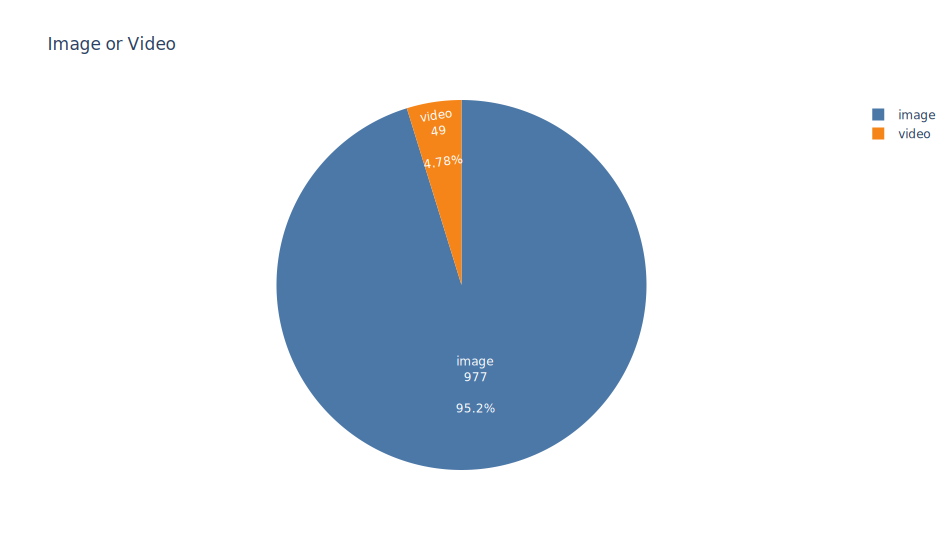

In [1004]:
pie(img_video, "Image or Video")

#### This text was made by 24 users
    - junot_aji                   188
    - naturecrystal_wholeseler    145
    - crystalstone_natural        124
    - cv.alifa_gamstone           110
    - crystals_wholesaler         107
    - cv.alifa_permata             68
    - aisha_alifa280917            54
    - ...
#### 95.2% of posts are images

### @amberheard.0\n.\n.\n.\n.\n.\n.\n.\n.\n#amberheard #alexandradaddario\xa0#katemiddleton\xa0#katebeckinsale\xa0#lucilleball\xa0#sandrabullock\xa0#love\xa0#queen\xa0#scarlettjohansson\xa0#scarletwitch\xa0#kristenstewart\xa0#selenator\xa0#selenagomez\xa0#jenniferlopez\xa0#jenniferlawrence\xa0#kateupton\xa0#arianagrande\xa0#meganfox\xa0#salmahayek\xa0#kyliejenner\xa0#kendalljenner\xa0#kimkardashian\xa0#kourtneykardashian\xa0#emmaroberts\xa0#emmawatson\xa0#emmastone\xa0#rihanna\xa0#katyperry\xa0#demilovato 

In [1005]:
df_posts.query(" caption == @df_posts.caption.value_counts().index[3] ")[
    "username"
].nunique()

265

In [1006]:
df_posts.query(" caption == @df_posts.caption.value_counts().index[3] ")[
    "username"
].value_counts()

iconicambers              96
nigeldoubloon             56
ladies_and_gentlemen11    49
gooners_az                48
amberjjheard              44
                          ..
filmes_e_series.br         1
monekerr                   1
modacllection              1
cinecapitol                1
jon_erik_chedid            1
Name: username, Length: 265, dtype: int64

In [1007]:
df_posts.query(" caption == @df_posts.caption.value_counts().index[3] ")[
    "location"
].value_counts()

Paris, France         2
Brazil                1
Columbus, Ohio        1
GYM                   1
Kerala                1
明治神宮 (Meiji Jingu)    1
Beijing               1
New York, New York    1
United States         1
Donetsk, Ukraine      1
Name: location, dtype: int64

In [1008]:
img_video = get_top(
    df_posts.query(" caption == @df_posts.caption.value_counts().index[3] "),
    col="is_video",
    n=0,
    column_name="type",
    count_name="n_posts",
)
img_video["type"] = ["image", "video"]
img_video

,type,n_posts
0,image,929
1,video,18


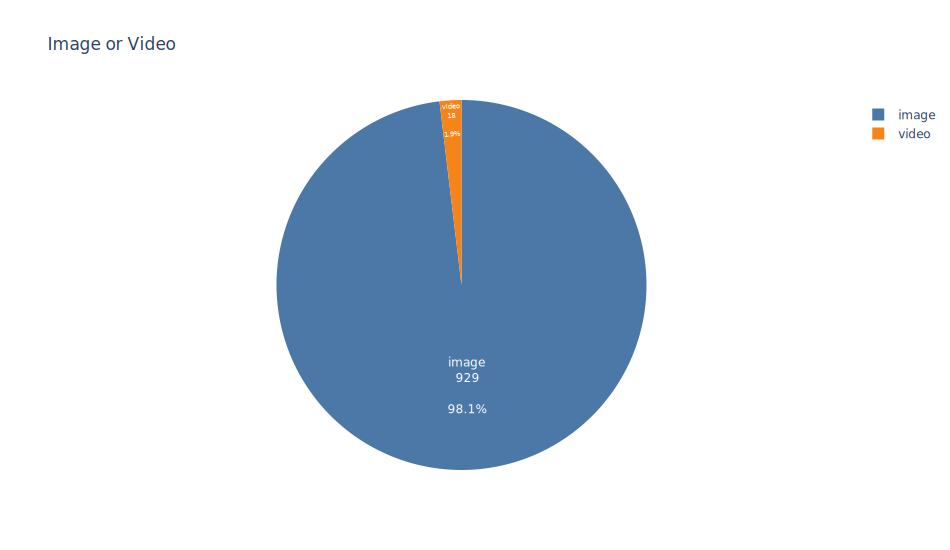

In [1009]:
pie(img_video, "Image or Video")

#### This text was made by 265 users
    - iconicambers                  96
    - nigeldoubloon                 56
    - ladies_and_gentlemen11        49
    - gooners_az                    48
    - amberjjheard                  44
    - ...
#### 98.1% of posts are images

<a id='image_video'></a>
>### Image or Video
> <ul>
 <li><a href="#top_posted">Top posted users</a></li>
 <li><a href="#captions">Captions</a></li>  
 <li><a href="#image_video"><b>Image or Video</b></a></li>  
 <li><a href="#loc">Locations</a></li>  
 </ul>

In [1010]:
df_posts["is_video"].value_counts()

False    175010
True      18957
Name: is_video, dtype: int64

In [1011]:
image_video = df_posts["is_video"].value_counts().to_frame().reset_index()
image_video["index"] = ["image", "video"]
image_video.rename(columns={"index": "type", "is_video": "n_posts"}, inplace=True)
image_video

,type,n_posts
0,image,175010
1,video,18957


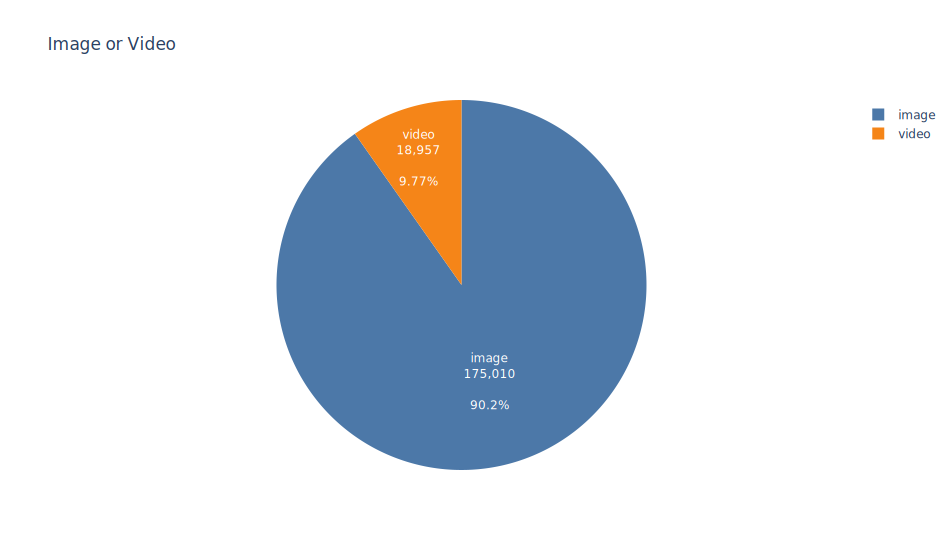

In [1012]:
pie(image_video, "Image or Video")

<a id='loc'></a>
>### Locations
><ul>
 <li><a href="#top_posted">Top posted users</a></li>
 <li><a href="#captions">Captions</a></li>  
 <li><a href="#image_video">Image or Video</a></li>  
 <li><a href="#loc"><b>Locations</b></a></li>  
 </ul>

In [1013]:
top_locations = get_top(
    df_posts, col="location", n=10, column_name="location", count_name="n_posts"
)

In [1014]:
top_locations

,location,n_posts
0,"Los Angeles, California",1786
1,"New York, New York",1370
2,"Jakarta, Indonesia",1087
3,"Adana, Turkey",842
4,Hollywood,415
5,"London, United Kingdom",309
6,"Paris, France",292
7,"Moscow, Russia",245
8,"Mexico City, Mexico",210
9,Atlantis,203


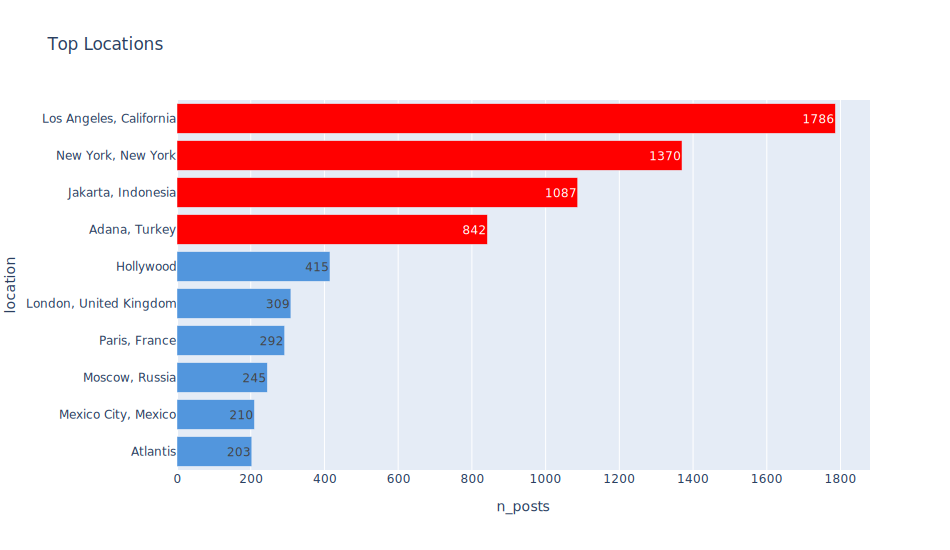

In [1015]:
barh(top_locations, "Top Locations", 500)

<a id='comments'></a>
## Comments

<ul>
<li><a href="#posts">Posts</a></li>  
<li><a href="#comments"><b>Comments</b></a></li>  
</ul>

> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#deep">Deeper Investigations</a></li>
 </ul>

In [1016]:
df_comments = pd.read_csv("comments_cleaned.csv")
print(df_comments.shape)
df_comments.head()

(1751113, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
0,#scarlettjohansson #alexandradaddario #emiliac...,2020-06-23 06:50:19,17915232430430980,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6
1,🔥🔥❤️,2020-06-23 06:50:20,17845867817208020,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6
2,very beautiful 😘❤️❤️❤️i love you very much 😍💘💘...,2020-06-23 06:54:04,17889474637566402,0.0,0.0,2337634847974873088,n,12302008022,fr.ederic2368,False,https://www.instagram.com/fr.ederic2368,2020,Jun,23,2020-06-23,6
3,❤️❤️❤️❤️❤️❤️,2020-06-23 07:12:28,17869498675832482,0.0,0.0,2337634847974873088,n,2490417195,muataz_87,False,https://www.instagram.com/muataz_87,2020,Jun,23,2020-06-23,7
4,bombón bello 💖💖💖💖💖,2020-06-23 07:14:40,18066076495222844,0.0,0.0,2337634847974873088,n,1521544054,jorgero122129,False,https://www.instagram.com/jorgero122129,2020,Jun,23,2020-06-23,7


In [1017]:
df_comments["datetime"] = pd.to_datetime(df_comments["datetime"])
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751113 entries, 0 to 1751112
Data columns (total 16 columns):
 #   Column       Dtype         
---  ------       -----         
 0   message      object        
 1   datetime     datetime64[ns]
 2   id           int64         
 3   n_replies    float64       
 4   n_likes      float64       
 5   media_id     int64         
 6   parent_id    object        
 7   user_id      int64         
 8   username     object        
 9   is_verified  bool          
 10  account_url  object        
 11  year         int64         
 12  month        object        
 13  dayofmonth   int64         
 14  date         object        
 15  hour         int64         
dtypes: bool(1), datetime64[ns](1), float64(2), int64(6), object(6)
memory usage: 202.1+ MB


In [1018]:
isnull(df_comments)

The number of NaNs in message: 0
The number of NaNs in datetime: 0
The number of NaNs in id: 0
The number of NaNs in n_replies: 335514
The number of NaNs in n_likes: 0
The number of NaNs in media_id: 0
The number of NaNs in parent_id: 0
The number of NaNs in user_id: 0
The number of NaNs in username: 0
The number of NaNs in is_verified: 0
The number of NaNs in account_url: 0
The number of NaNs in year: 0
The number of NaNs in month: 0
The number of NaNs in dayofmonth: 0
The number of NaNs in date: 0
The number of NaNs in hour: 0


<a id='over_time'></a>
> ## Exploring Comments Created OVER TIME
> <ul>
 <li><a href="#over_time"><b>Comments Created OVER TIME</b></a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#deep">Deeper Investigations</a></li>
 </ul>

<a id='all_years'></a>
>>### Comments Created in Each Year
> <ul>
 <li><a href="#all_years"><b>Comments Created in Each Year</b></a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

In [1019]:
df_years = (
    df_comments.groupby(df_comments["year"])["message"]
    .count()
    .reset_index(name="n_comments")
)
df_years

,year,n_comments
0,2014,4
1,2015,1
2,2016,15
3,2017,116
4,2018,227847
5,2019,333197
6,2020,711339
7,2021,478594


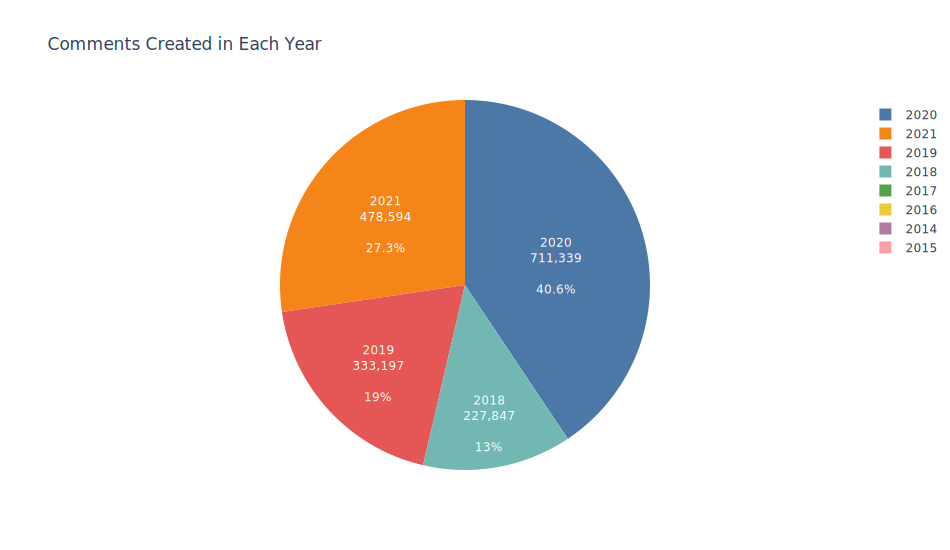

In [1020]:
pie(df_years, "Comments Created in Each Year")

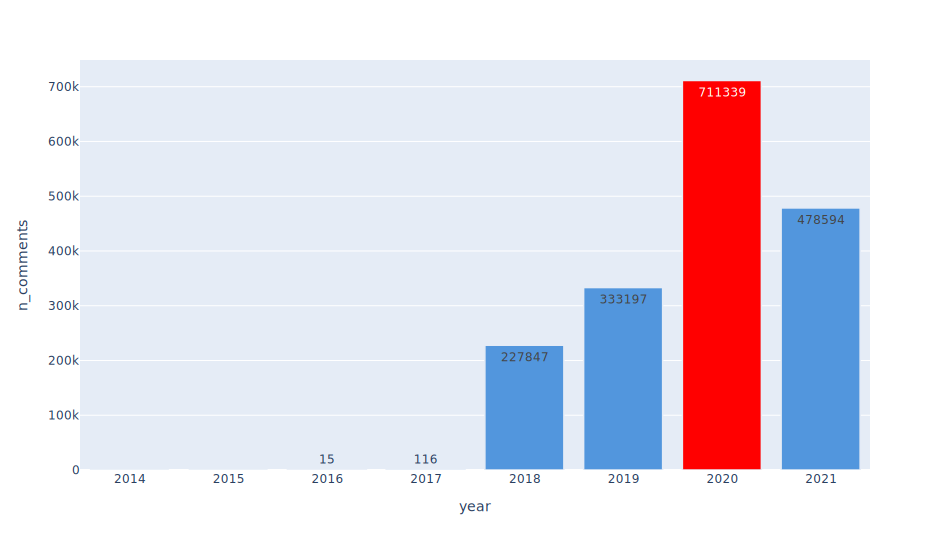

In [1021]:
bar(df_years, "year", "n_comments", "Comments Created in Each Year", margin=700000)

Instagram/ Initial release date: October 2010

<a id='all_months'></a>
>>### Comments Created in Each Month
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months"><b>Comments Created in Each Month</b></a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

In [1022]:
# df_monthly_counts = df_comments.groupby(['year', 'month']).count()['message']\
# .reset_index(name='n_comments').rename(columns={'index': 'date'})

# Convert month into an ordered categorical type
# months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# mord = pd.api.types.CategoricalDtype(ordered=True, categories=months)  # mord --> months ordered
# df_monthly_counts['month'] = df_monthly_counts['month'].astype(mord)

# df_monthly_counts.sort_values(['year','month'], inplace=True)
# df_monthly_counts

In [1023]:
# total comments over years
df_comments.year.value_counts()

2020    711339
2021    478594
2019    333197
2018    227847
2017       116
2016        15
2014         4
2015         1
Name: year, dtype: int64

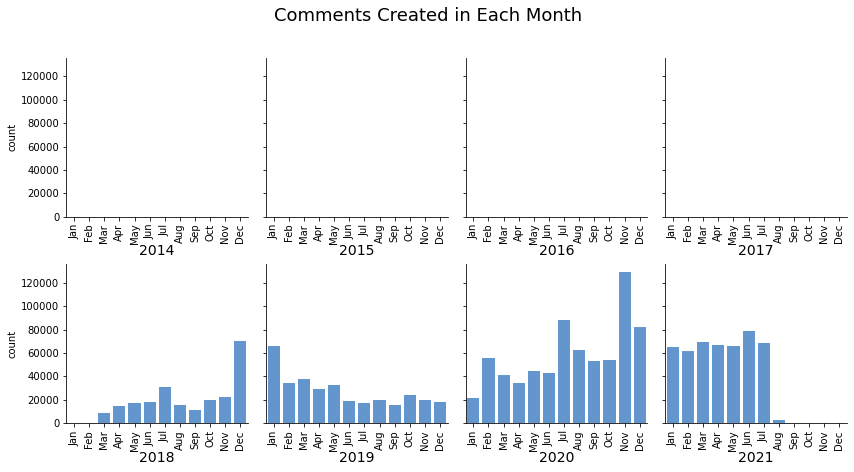

In [1024]:
month_ord = [
    "Jan",
    "Feb",
    "Mar",
    "Apr",
    "May",
    "Jun",
    "Jul",
    "Aug",
    "Sep",
    "Oct",
    "Nov",
    "Dec",
]
g = sb.FacetGrid(data=df_comments, col="year", col_wrap=4)
g.map(sb.countplot, "month", order=month_ord, palette=["#5296dd"])

g.set_xticklabels(rotation=90)
g.set_titles("{col_name}", size=14, y=-0.28)
g.fig.suptitle("Comments Created in Each Month", fontsize=18, y=1.06)

g.fig.subplots_adjust(wspace=0.1, hspace=0.3)
g.set_xlabels("")
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True)

**NOTE:**
- 2018 Peaks --> Dec
- 2019 Peaks --> Jan
- 2020 Peaks --> Nov, Jul
- 2021 Peaks --> Jun

<a id='all_days'></a>
>>### Comments Created in Each Day
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days"><b>Comments Created in Each Day</b></a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

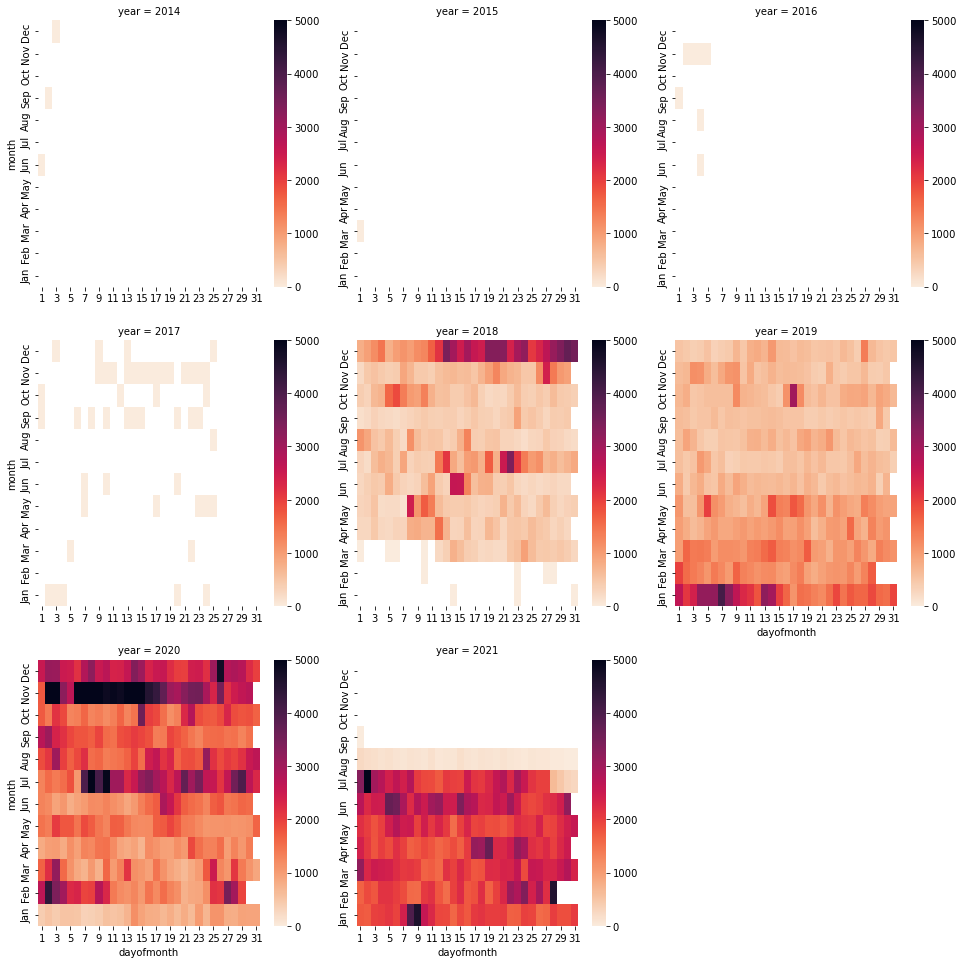

In [1025]:
daily_counts = df_comments.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=3, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=5000);

g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1026]:
# d = daily_counts[daily_counts.year==2020].pivot(index='month', columns='dayofmonth', values='count')
# d

In [1027]:
# d = d.reindex(index=months[::-1])
# d

In [1028]:
df_comments_18 = df_comments[df_comments["year"] == 2018]
df_comments_19 = df_comments[df_comments["year"] == 2019]
df_comments_20 = df_comments[df_comments["year"] == 2020]
df_comments_21 = df_comments[df_comments["year"] == 2021]

<a id='2018_days'></a>
>>### Comments Created in Each Day of 2018
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days"><b>Comments Created in Each Day of 2018</b></a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

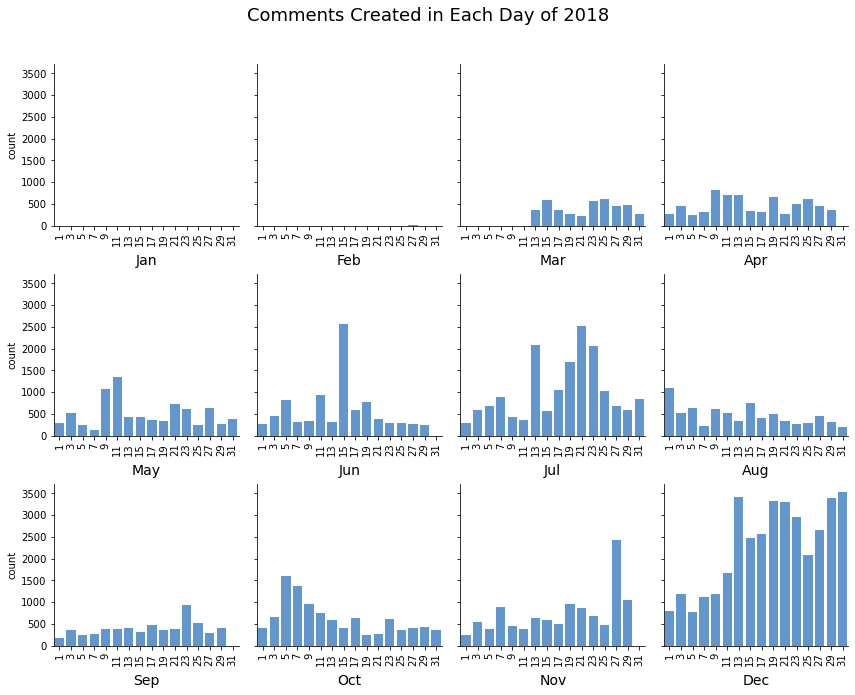

In [1029]:
facet_days(df_comments_18, "2018")

**NOTE:** 
- The peak on Jun 15, 2018
- The peaks in Jul 2018
- The peak on Nov 27, 2018
- The peaks in Dec 2018

<a id='2019_days'></a>
>>### Comments Created in Each Day of 2019
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days"><b>Comments Created in Each Day of 2019</b></a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

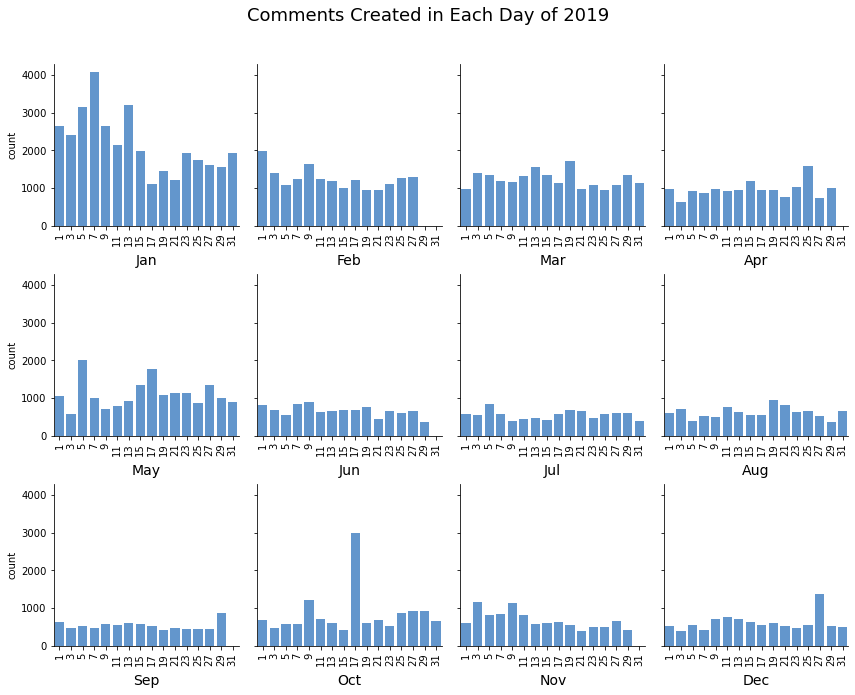

In [1030]:
facet_days(df_comments_19, "2019")

**NOTE:** 
- The peaks on Jan 2019
- The peak on Oct 17, 2019

<a id='2020_days'></a>
>>### Comments Created in Each Day of 2020
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days"><b>Comments Created in Each Day of 2020</b></a></li>
 <li><a href="#2021_days">Comments Created in Each Day of 2021</a></li>
 </ul>

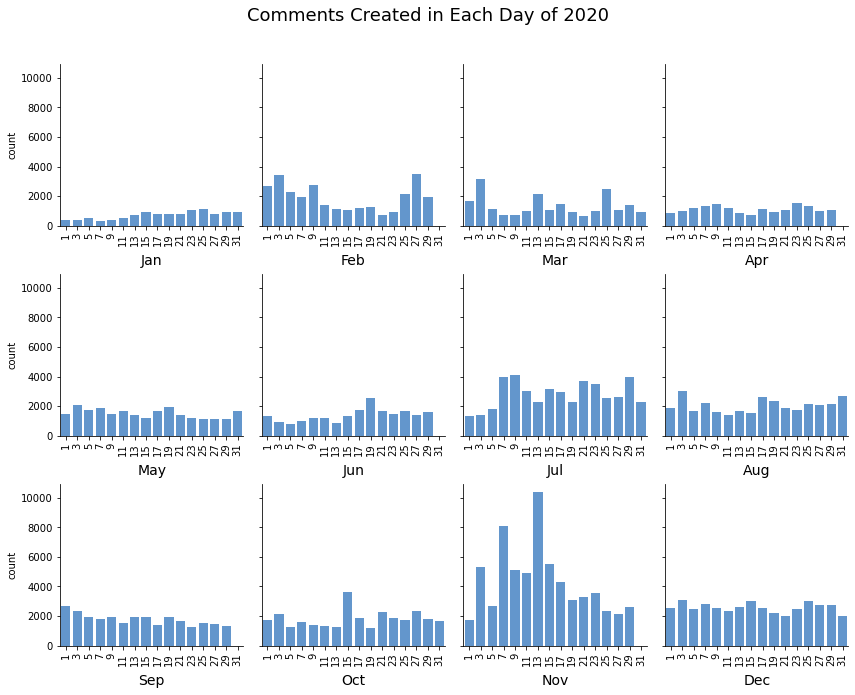

In [1031]:
facet_days(df_comments_20, "2020")

**NOTE:** 
- 13 November is a peak in 2020

<a id='2021_days'></a>
>>### Comments Created in Each Day of 2021
> <ul>
 <li><a href="#all_years">Comments Created in Each Year</a></li>
 <li><a href="#all_months">Comments Created in Each Month</a></li>
 <li><a href="#all_days">Comments Created in Each Day</a></li>
 <li><a href="#2018_days">Comments Created in Each Day of 2018</a></li>
 <li><a href="#2019_days">Comments Created in Each Day of 2019</a></li>
 <li><a href="#2020_days">Comments Created in Each Day of 2020</a></li>
 <li><a href="#2021_days"><b>Comments Created in Each Day of 2021</b></a></li>
 </ul>

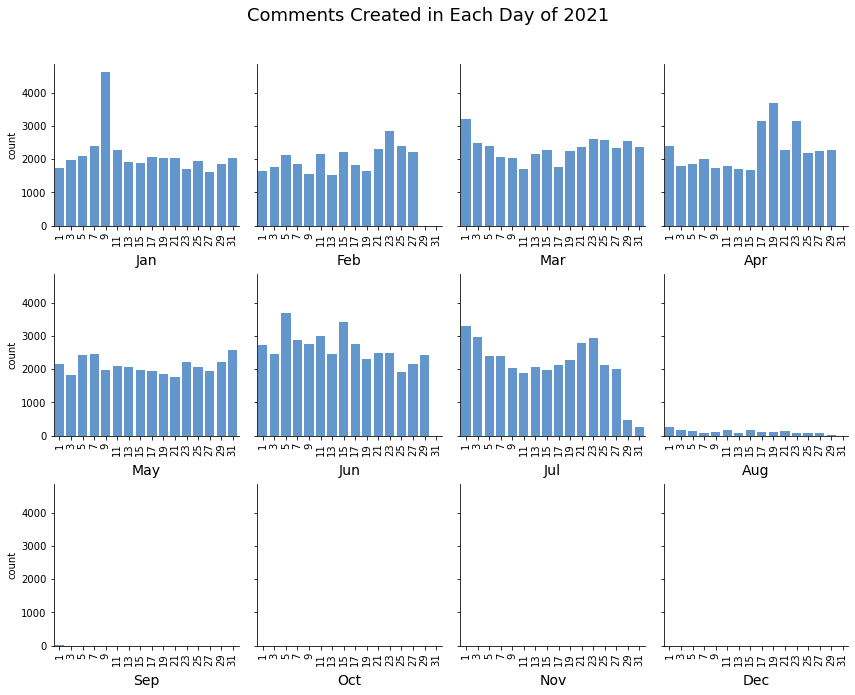

In [1032]:
facet_days(df_comments_21, "2021")

**NOTE:** 
- The peak on Jan 9, 2021

<a id='peaks'></a>
>## Investigate Peaks
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks"><b>Investigate Peaks</b></a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#deep">Deeper Investigations</a></li>
 </ul>

In [1033]:
# Create a data frame with the number of comments in each date
df_ncomments = df_comments.groupby(['date']).agg({'message':'count', 'n_replies': 'sum', 'n_likes': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_ncomments["date"] = pd.to_datetime(df_ncomments["date"])
df_ncomments.head(15)


,date,n_comments,n_replies,n_likes
1047,2020-11-13,10407,5020.0,155110.0
1036,2020-11-02,8659,4083.0,83069.0
1041,2020-11-07,8123,2890.0,82691.0
1048,2020-11-14,6086,1138.0,51965.0
919,2020-07-08,6068,2263.0,74994.0
1278,2021-07-02,5767,1764.0,85995.0
1049,2020-11-15,5551,1254.0,54036.0
1037,2020-11-03,5303,1324.0,55976.0
1042,2020-11-08,5130,960.0,28951.0
1043,2020-11-09,5101,1263.0,37681.0


<a id='all'></a>
>>### Peaks in All Years
> <ul>
 <li><a href="#all"><b>All Years</b></a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

In [1034]:
# filter on dates with peaks
df_peaks = df_ncomments[['date', 'n_comments']]
df_peaks_18 = df_peaks[df_peaks.date.dt.year == 2018]
df_peaks_19 = df_peaks[df_peaks.date.dt.year == 2019]
df_peaks_20 = df_peaks[df_peaks.date.dt.year == 2020]
df_peaks_21 = df_peaks[df_peaks.date.dt.year == 2021]

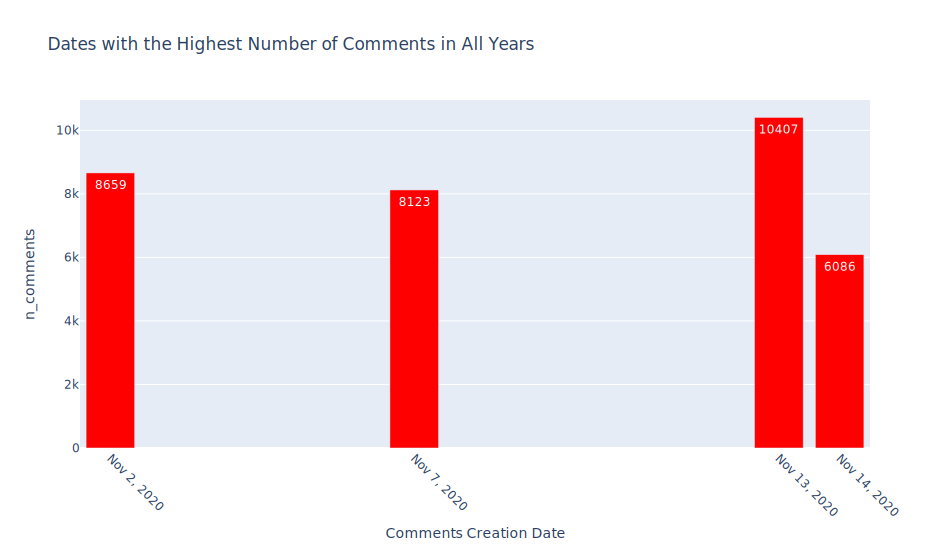

In [1035]:
bar_peaks(df_peaks.head(4), "Dates with the Highest Number of Comments in All Years")

**NOTE:**
- 2018 Peaks --> Dec
- 2019 Peaks --> Jan
- 2020 Peaks --> Nov, Jul

In [1036]:
df_dec_18 = df_ncomments[
    (df_ncomments["date"].dt.year == 2018) & (df_ncomments["date"].dt.month == 12)
]
df_jan_19 = df_ncomments[
    (df_ncomments["date"].dt.year == 2019) & (df_ncomments["date"].dt.month == 1)
]
df_nov_20 = df_ncomments[
    (df_ncomments["date"].dt.year == 2020) & (df_ncomments["date"].dt.month == 11)
]
df_jul_20 = df_ncomments[
    (df_ncomments["date"].dt.year == 2020) & (df_ncomments["date"].dt.month == 7)
]

<a id='2018'></a>
>>### 2018 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018"><b>2018</b></a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

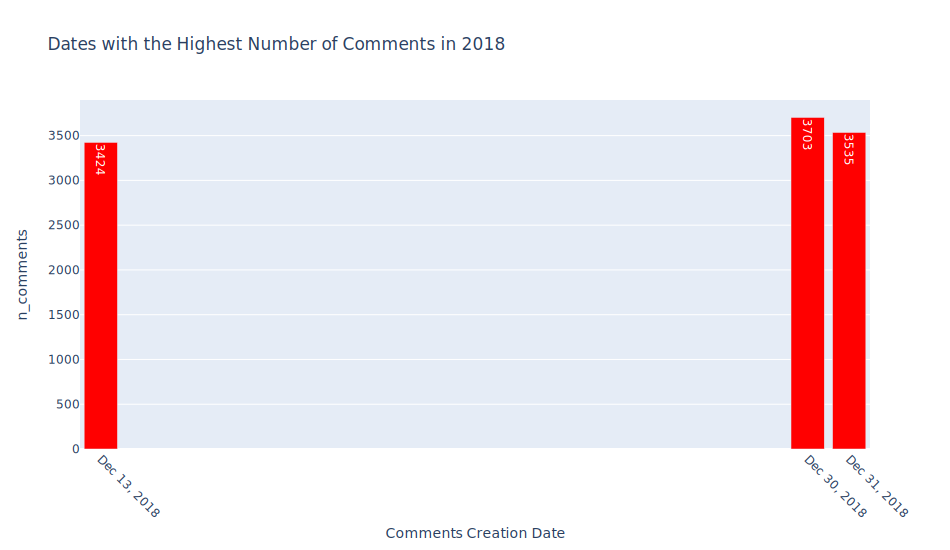

In [1037]:
bar_peaks(df_peaks_18.head(3), "Dates with the Highest Number of Comments in 2018")

In [1038]:
def bar_dates(df, title, threshold=float("inf")):
    fig = px.bar(df, x="date", y="n_comments", text="n_comments")

    fig.update_layout(
        title={"text": title, "x": 0.5, "xanchor": "center", "yanchor": "top"}
    )
    fig.update_layout(xaxis=dict(title="Comments Creation Date", tickmode="linear"))

    clrs = ["red" if (y > threshold) else "#5296dd" for y in df["n_comments"]]
    fig.update_traces(
        marker_color=clrs, marker_line_width=1.5, opacity=1, textposition="auto"
    )
    fig.update_xaxes(tickangle=45)
    fig.show("svg")

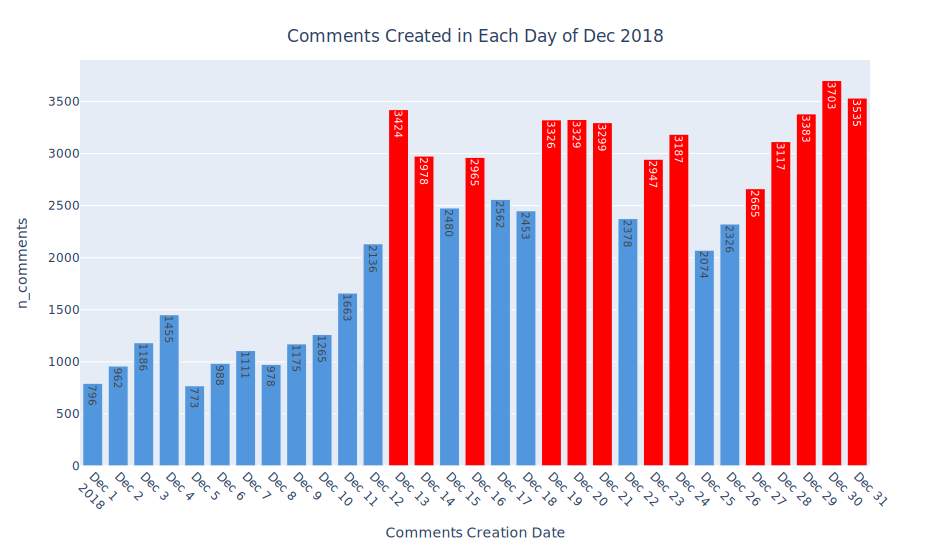

In [1039]:
bar_dates(df_dec_18, "Comments Created in Each Day of Dec 2018", 2600)

<a id='2019'></a>
>>### 2019 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019"><b>2019</b></a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

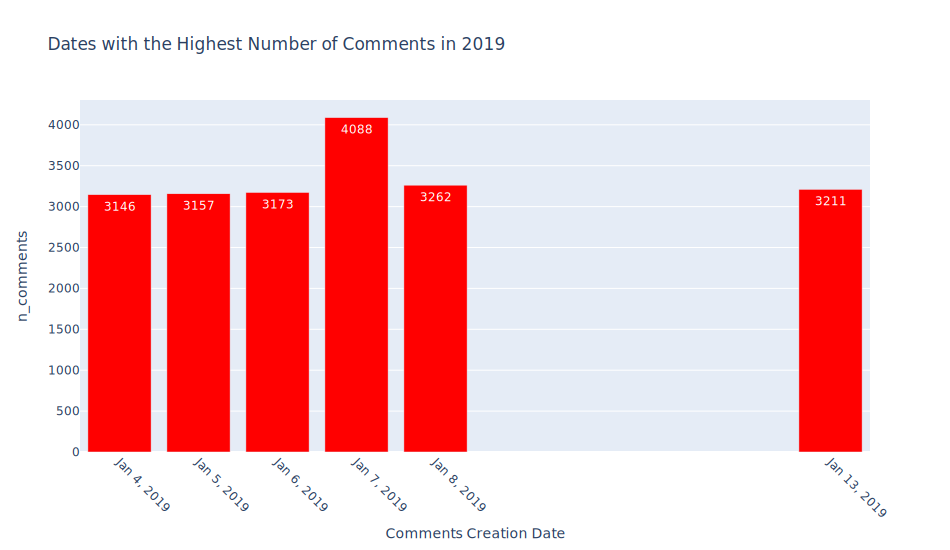

In [1040]:
bar_peaks(df_peaks_19.head(6), "Dates with the Highest Number of Comments in 2019")

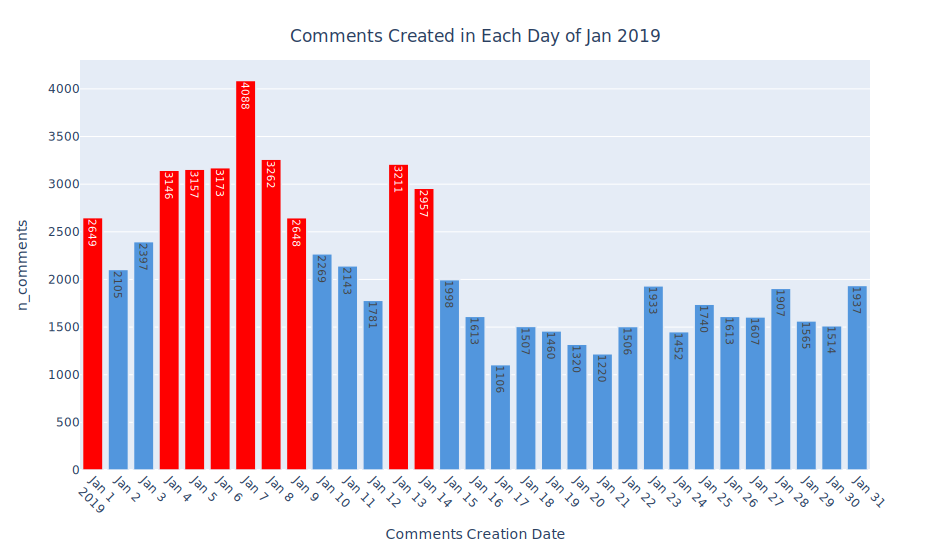

In [1041]:
bar_dates(df_jan_19, "Comments Created in Each Day of Jan 2019", 2600)

<a id='2020'></a>
>>### 2020 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020"><b>2020</b></a></li>
 <li><a href="#2021">2021</a></li>
 </ul>

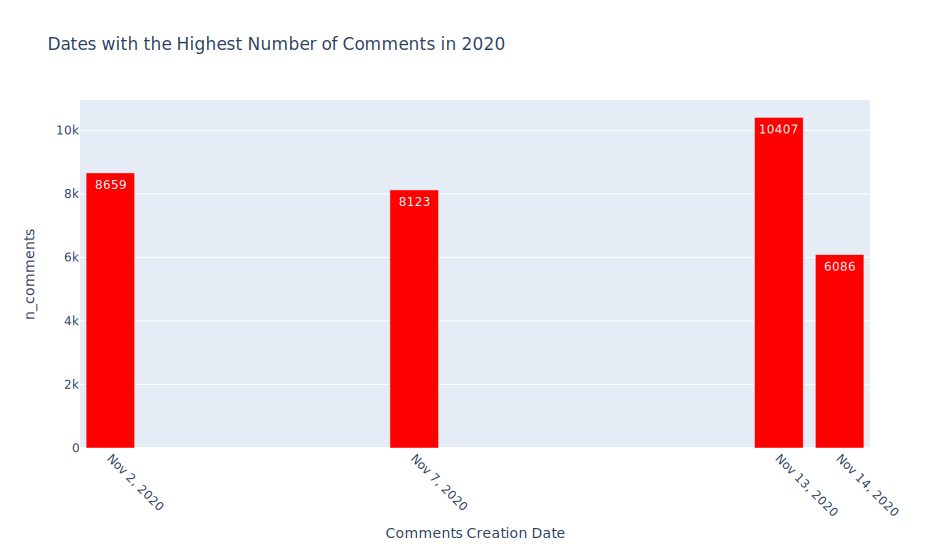

In [1042]:
bar_peaks(df_peaks_20.head(4), "Dates with the Highest Number of Comments in 2020")

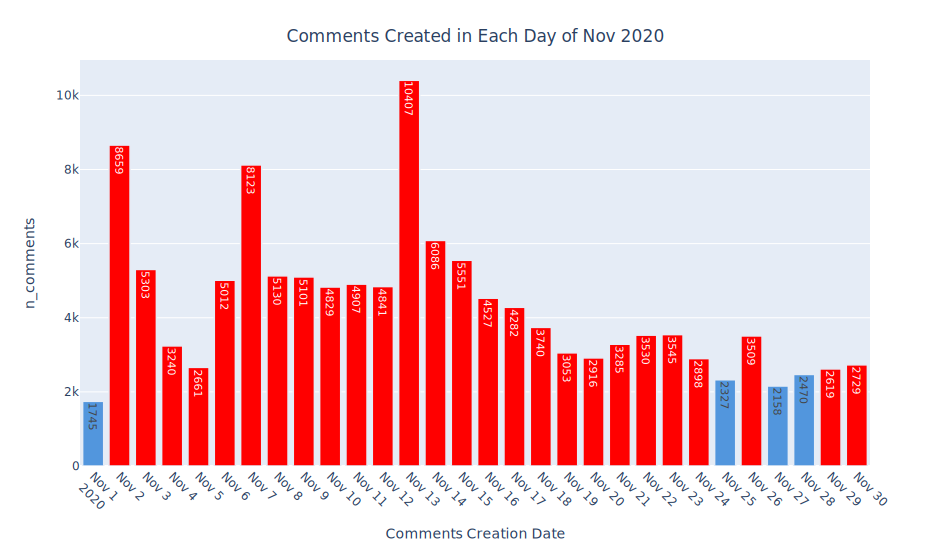

In [1043]:
bar_dates(df_nov_20, "Comments Created in Each Day of Nov 2020", 2600)

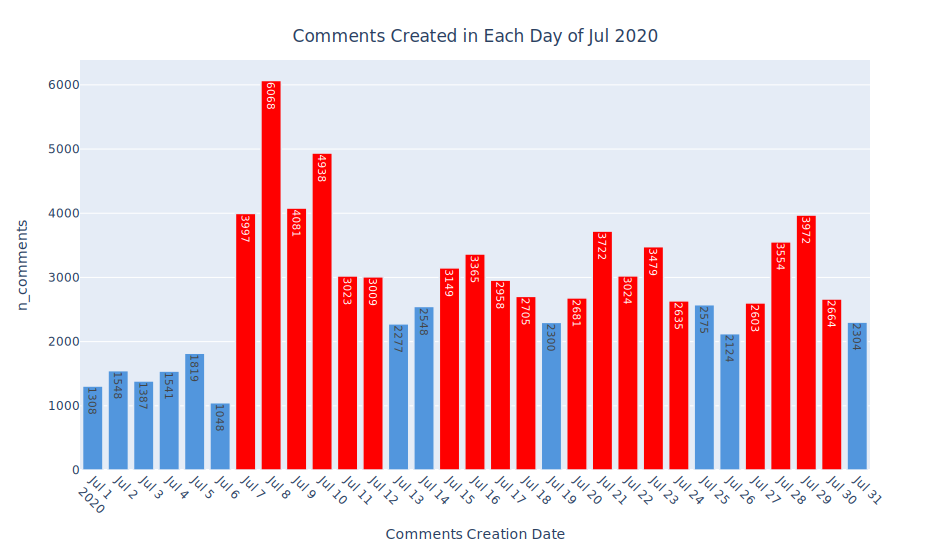

In [1044]:
bar_dates(df_jul_20, "Comments Created in Each Day of Jul 2020", 2600)

<a id='2021'></a>
>>### 2021 Peaks
> <ul>
 <li><a href="#all">All Years</a></li>
 <li><a href="#2018">2018</a></li>
 <li><a href="#2019">2019</a></li>
 <li><a href="#2020">2020</a></li>
 <li><a href="#2021"><b>2021</b></a></li>
 </ul>

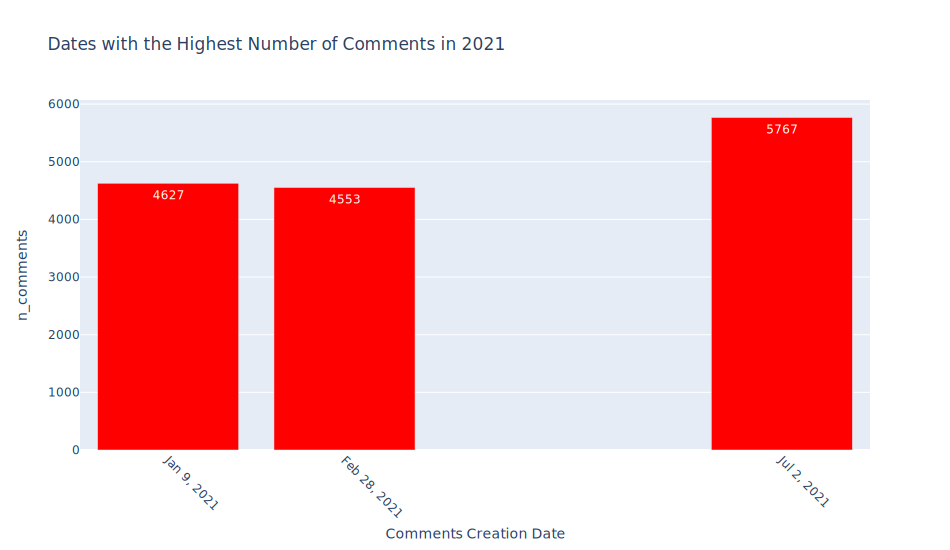

In [1045]:
bar_peaks(df_peaks_21.head(3), "Dates with the Highest Number of Comments in 2021")

<a id='top_peaks'></a>
>## Comments on Peak Days
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks"><b>Comments on Peak Days</b></a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#deep">Deeper Investigations</a></li>
 </ul>

In [1046]:
# Create an empty set of negatively commenting users
neg_users = set()

In [1047]:
# Create an empty set of negative text
neg_text = set()

In [1048]:
df_comments.head(1)

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
0,#scarlettjohansson #alexandradaddario #emiliac...,2020-06-23 06:50:19,17915232430430980,0.0,0.0,2337634847974873088,n,3988263563,scarlettjohansonoffcial,False,https://www.instagram.com/scarlettjohansonoffcial,2020,Jun,23,2020-06-23,6


### Users with The Most Contributions on Each Date

In [1049]:
df = df_comments.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

print("\nInvestigated --> These Users are Posting Normal Comments\n")
df.head(15)


Investigated --> These Users are Posting Normal Comments



,date,username,n_comments,n_likes,n_replies
709442,2020-08-24,sinasbutterfly,836,17.0,2.0
1168335,2021-06-05,anaww._.opi,359,20.0,0.0
1170715,2021-06-06,hasti._mm90,302,14.0,4.0
1169236,2021-06-05,maral_kp99,292,15.0,2.0
1171113,2021-06-06,maral_kp99,250,11.0,6.0
1168863,2021-06-05,hasti._mm90,215,9.0,1.0
1170141,2021-06-06,anaww._.opi,189,14.0,3.0
999503,2021-02-11,angel_amber__heard,183,200.0,0.0
162874,2018-12-24,missdanicosplay,175,166.0,3.0
1168735,2021-06-05,fateme.hoseinzadeh66,156,7.0,0.0


### Peak Dates

In [1050]:
df_ncomments.head()

,date,n_comments,n_replies,n_likes
1047,2020-11-13,10407,5020.0,155110.0
1036,2020-11-02,8659,4083.0,83069.0
1041,2020-11-07,8123,2890.0,82691.0
1048,2020-11-14,6086,1138.0,51965.0
919,2020-07-08,6068,2263.0,74994.0


### 2020-11-13

In [1051]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-13"][
    "username"
].value_counts().head(10)

visannelutu             48
universe_.marvel        44
lks_ctm                 41
netos.k                 36
v4l3nt1nlol             30
becauseitsjohnnydepp    28
di22mendez              25
notdiko                 23
sonneterio              21
cris.chichenol          19
Name: username, dtype: int64

#### di22mendez   
<font color='red'>negative comments</font> | <font color='red'>newly created</font>
- Account created on FEBRUARY 6, 2021
- 12 posts
- 235 followers
- 5,163 following

In [1052]:
neg_users = neg_users|{'di22mendez'}
neg_text = neg_text|{'remove amber', 'remove-amber', 'removed'}

In [1053]:
df_comments.query("username == 'di22mendez'")['message'].value_counts().head(15)

@avilaricardoj https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                       1
@soyjosebruges https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                       1
@_black_.myrram._ oks                                                                                            1
@lautaro.g.barrios https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                   1
@gftg5062442 te lo paso jsjsjs 😂🕊                                                                                1
@galarz.ivan https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                         1
@josh_emef aah, crei que decias que ya había ganado :)                                                           1
@josh_emef no ganó el juicio aún. johnny perdió contra un portal de noticias, no contra amber.                   1
@_mmaaxxii._ oks                                                                

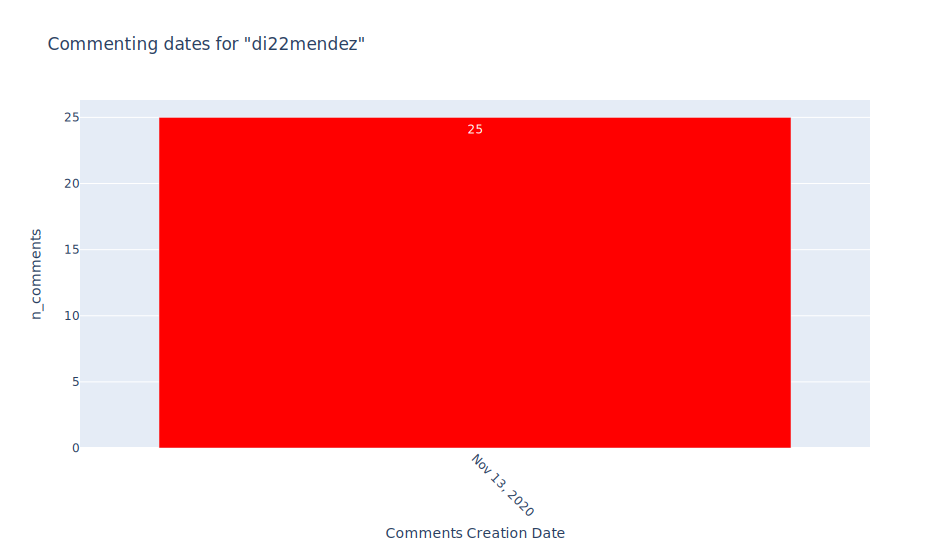

In [1054]:
bar_peaks(get_top(df_comments[df_comments.username == "di22mendez"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "di22mendez"')

#### becauseitsjohnnydepp  
<font color='red'>negative comments</font>

- first posted on Aug 23, 2016  
- has a total of 10,810 posts 
- 35.7k followers
- 1,968 following
- becauseitsjohnnydepp ^ created around September 2016

In [1055]:
neg_users = neg_users|{'becauseitsjohnnydepp'}
neg_text = neg_text|{'amber lunge', 'assaulted johnny', 'amberheardisanabuser', 'clawing', 'tugging', 
                     'aggressively pull', 'amber-heard-abus', 'amber heard abus', 'amber abus'}

In [1056]:
df_comments.query("username == 'becauseitsjohnnydepp'")['message'].value_counts().head(15)

#justiceforjohnnydepp                                                                                                                                                                                                                                                     55
#justiceforjohnnydepp https://www.change.org/p/the-people-warner-bros-bring-johnny-depp-back-as-gellert-grindelwald                                                                                                                                                       29
https://www.change.org/p/the-people-warner-bros-bring-johnny-depp-back-as-gellert-grindelwald #justiceforjohnnydepp                                                                                                                                                       28
#justiceforjohnnydepp https://meaww.com/johnny-depp-children-amber-heard-abusing-bahamas-actor-estate-manager                                                                                    

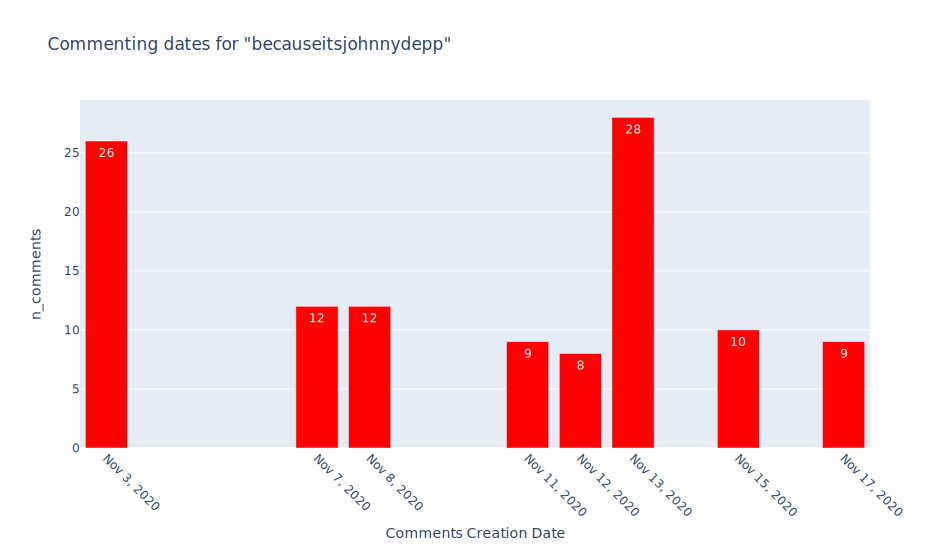

In [1057]:
bar_peaks(get_top(df_comments[df_comments.username == "becauseitsjohnnydepp"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "becauseitsjohnnydepp"')

In [1058]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-13"][
    "message"
].value_counts().head(20)

#justiceforjohnnydepp                                                                                                  221
❤️                                                                                                                      40
no                                                                                                                      37
😍                                                                                                                       23
#justiceforjohnnydepp https://www.change.org/p/the-people-warner-bros-bring-johnny-depp-back-as-gellert-grindelwald     22
love you                                                                                                                19
❤️❤️❤️                                                                                                                  18
😍😍😍                                                                                                                     17
#boycottaquaman2

### 2020-11-02
<font color='red'>Lots of negative comments can be seen on that date.</font>

In [1059]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-02"][
    "username"
].value_counts().head(10)

queenmusicvidoe      71
queenmusicvideo      60
_jas_min_pr._        37
babikate6            35
untilthenia          33
amirali.fitness2     33
saghar.ttmfar        32
academic_force       30
tom_hiddleston_ir    30
maryam_khaledi_77    30
Name: username, dtype: int64

#### tom_hiddleston_ir  
<font color='red'>negative comments</font> | <font color='red'>newly created</font>

- first posted on OCTOBER 26, 2020
- 148 posts
- 1,702 followers
- 664 following

In [1060]:
neg_users = neg_users|{'tom_hiddleston_ir'}
neg_text = neg_text|{'amberheardisaliar', 'nojohnnynopotc', 'wearewhityoujohnnydepp'}

In [1061]:
print('\nOnly Posting one Hashtag at a time!!\n')
df_comments.query("username == 'tom_hiddleston_ir'")['message'].value_counts().head(15)


Only Posting one Hashtag at a time!!



#nojohnnynopotc            8
#justiceforjohnnydepp      6
#amberheardisaliar         6
#fuckthesun                5
#wearewhityoujohnnydepp    5
Name: message, dtype: int64

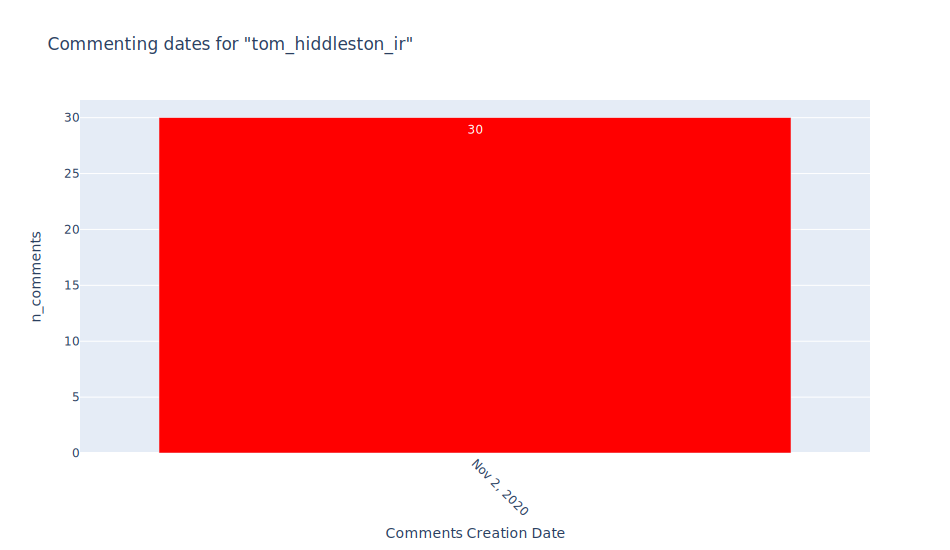

In [1062]:
bar_peaks(get_top(df_comments[df_comments.username == "tom_hiddleston_ir"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "tom_hiddleston_ir"')

#### queenmusicvidoe  
<font color='red'>negative comments</font>

- private account
- 0 posts
- 4 followers
- 403 following

In [1063]:
neg_users = neg_users|{'queenmusicvidoe'}

In [1064]:
print('\nAmplifying lots of Hashtags!!\n')
df_comments.query("username == 'queenmusicvidoe'")['message'].value_counts().head(15)


Amplifying lots of Hashtags!!



@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                  24
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun 💫                 3
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun 💙                 3
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun 💙💙💙💙              2
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun ❤️❤️❤️❤️❤️        2
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun 🧡🧡🧡🧡🧡             2
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #ju

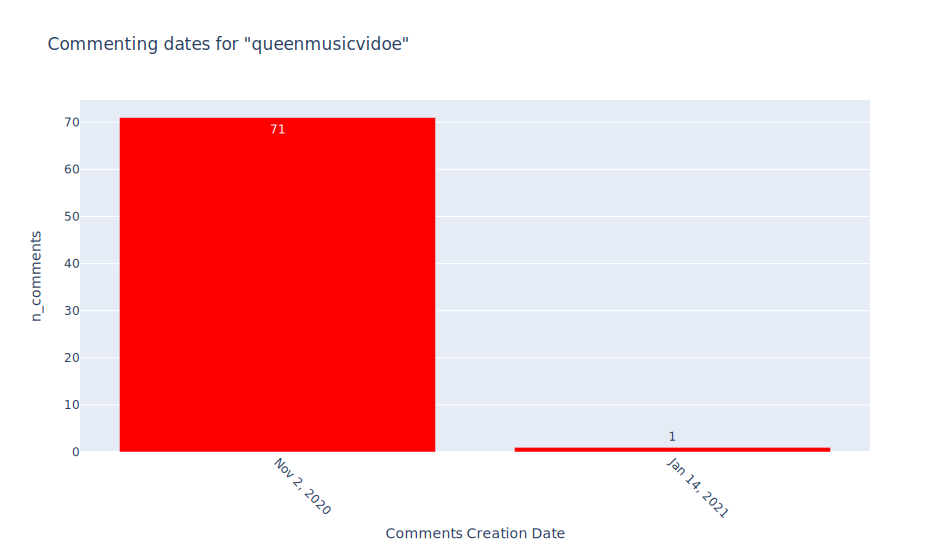

In [1065]:
bar_peaks(get_top(df_comments[df_comments.username == "queenmusicvidoe"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "queenmusicvidoe"')

#### maryam_khaledi_77  
<font color='red'>negative comments</font>

- private account
- 0 posts
- 282 followers
- 297 following

In [1066]:
neg_users = neg_users|{'maryam_khaledi_77'}
neg_text = neg_text|{'amberturd', 'amberisanabuser', 'johnnydeppforever'}

In [1067]:
df_comments.query("username == 'maryam_khaledi_77'")['message'].value_counts().head(15)

#justiceforjohnnydepp                                                                                                                                                                                           7
#amberturd                                                                                                                                                                                                      4
@amberheard 💩💩💩💩💩💩                                                                                                                                                                                              3
#wearewithyoujohnnydepp 💜                                                                                                                                                                                       2
#amberisanabuser                                                                                                                                                

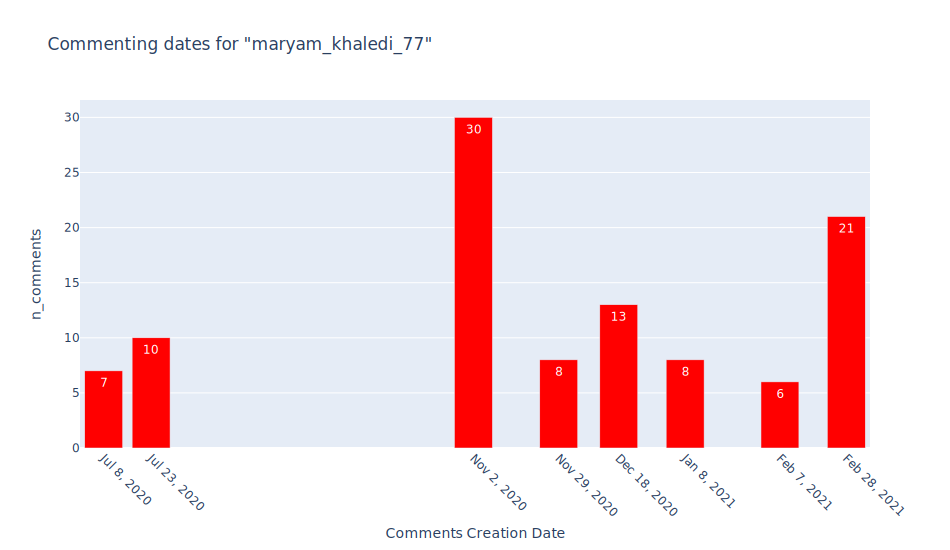

In [1068]:
bar_peaks(get_top(df_comments[df_comments.username == "maryam_khaledi_77"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "maryam_khaledi_77"')

#### _jas_min_pr._
<font color='red'>negative comments</font>

- private account
- 0 posts
- 143 followers
- 266 following

In [1069]:
neg_users = neg_users|{'_jas_min_pr._'}

In [1070]:
df_comments.query("username == '_jas_min_pr._'")['message'].value_counts().head(15)

@johnnydepp                                                                                                                                 18
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun     9
#wearewithyoujohnnydepp                                                                                                                      4
😍😍                                                                                                                                           1
❤️🔥                                                                                                                                          1
💜💜                                                                                                                                           1
💛💜                                                                                                                                           1

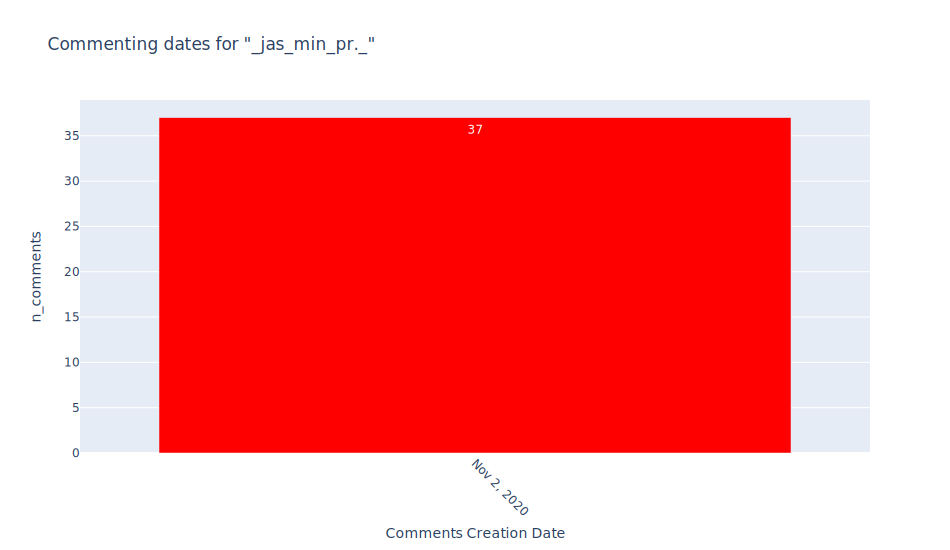

In [1071]:
bar_peaks(get_top(df_comments[df_comments.username == "_jas_min_pr._"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "_jas_min_pr._"')

#### babikate6
<font color='red'>negative comments</font>

- private account
- 0 posts
- 5 followers
- 21 following

In [1072]:
neg_users = neg_users|{'babikate6'}

In [1073]:
df_comments.query("username == 'babikate6'")['message'].value_counts().head(15)

@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard                                                                                                                                                         9
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                                                                                                                                             5
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun ♥️                                                                                                                                          5
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun 🗡️                        

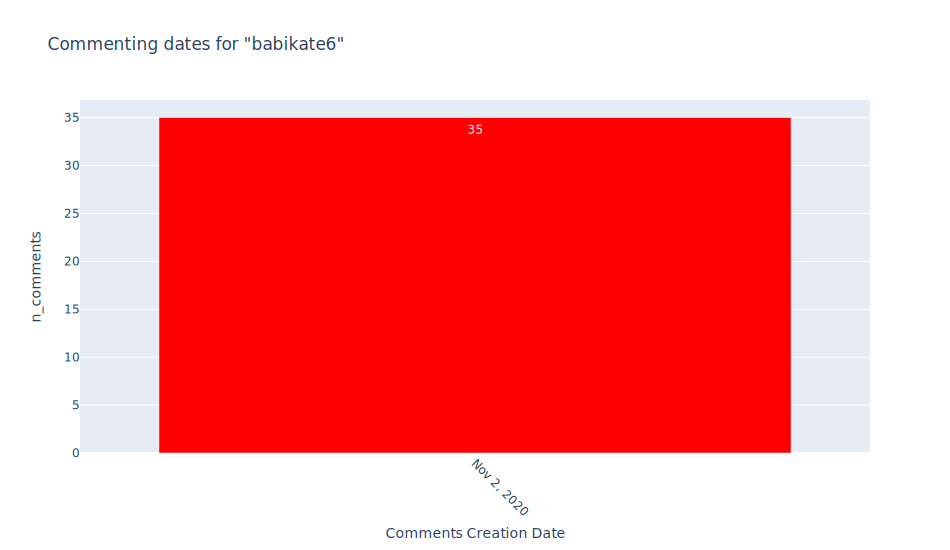

In [1074]:
bar_peaks(get_top(df_comments[df_comments.username == "babikate6"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "babikate6"')

In [1075]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-02"][
    "message"
].value_counts().head(20)

@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun    119
#justiceforjohnnydepp                                                                                                                        82
@johnnydepp                                                                                                                                  80
#wearewithyoujohnnydepp                                                                                                                      35
😍                                                                                                                                            21
❤️❤️❤️                                                                                                                                       20
🔥                                                                                                                                       

### 2020-11-07
<font color='red'>Lots of negative comments can be seen on that date.</font>

In [1076]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-07"][
    "username"
].value_counts().head(10)

azulj.nolasco               51
cinemaporteghal             43
glory_cinema                41
sassything90                23
11_ornella_06               20
olvorka                     18
vengadorunavezvengador      18
theworldofgeeks99up         18
slut_for_big_juicy_tacos    17
samanthastar53              16
Name: username, dtype: int64

#### samanthastar53
<font color='red'>negative comments</font> | <font color='red'>newly created</font>

- Account created on NOVEMBER 5, 2020
- 5 posts
- 34 followers
- 102 following

https://www.instagram.com/p/CKXKaGEMOK8/?utm_source=ig_web_copy_link

In [1077]:
neg_users = neg_users|{'samanthastar53'}
neg_text = neg_text|{'amberheardisanabuserandliar', 'boycottamberheard', 
                     'removeamberheardsfromaquaman2', 'jailforamberheard'}

In [1078]:
df_comments.query("username == 'samanthastar53'")['message'].value_counts().head(15)

#removeamberheardsfromaquaman2      42
#boycottamberheard                  27
#amberheardisanabuserandliar        23
#jailforamberheard                  11
#justiseforjohnnydepp                9
@amberheard 🤮🤮🤮🤮🤮🤮                   9
#amberturd 💩                         8
🤮🤮🤮🤮🤮🤮🤮                              7
#boycottamberheard 🤢                 7
@amberheard 🤮🤮🤮🤮🤮🤮🤮                  7
@amberheard 💩💩💩💩💩💩                   6
#removeamberheardsfromaquaman2 🤢     6
#amberheardisanabuserandliar 🤢       5
#jailforamberheard 🤢                 4
@amberheard 🤮🤮🤮🤮🤮                    4
Name: message, dtype: int64

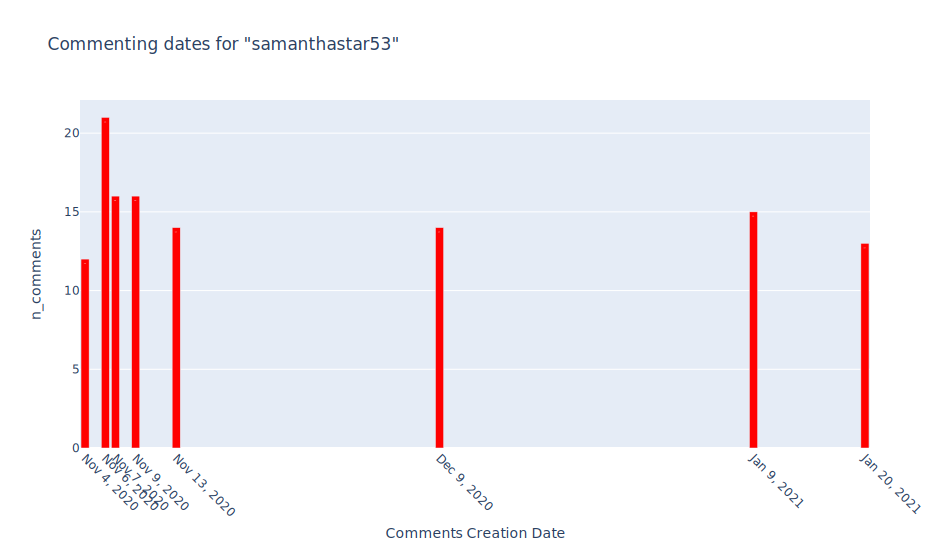

In [1079]:
bar_peaks(get_top(df_comments[df_comments.username == "samanthastar53"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "samanthastar53"')

#### slut_for_big_juicy_tacos
<font color='red'>negative comments</font>

- private account
- 4,643 posts
- 38 followers
- 2,277 following

Bio:  
Daddy Dylan
Not scared of any Bitch. This is my iconic spam. Wish I can be a duck shark or flying squirrel because why the hell not http://chng.it/ttWqDX5yVF


In [1080]:
neg_users = neg_users|{'samanthastar53'}
neg_text = neg_text|{'burn in hell', 'piece of shit', 'jailforamberheard', 'kys', 'get raped', 'go die',
                     'jail', 'diecunt', 'cunt', ' death', ' death ', 'burn', 'kys', ' go kys', ' raped', 'get raped', 'go die',
                     'kill amber', 'kill her', 'deathtoamber'}

In [1081]:
df_comments.query("username == 'slut_for_big_juicy_tacos'")['message'].value_counts().head(15)

die                                                   4
burn in hell                                          2
piece of shit                                         2
she should kys                                        2
cunt                                                  2
fuck this cunt                                        1
i feel like she will abuse the kid                    1
#justiceforjohnnydepp                                 1
fuck her she needs to go to jail                      1
worthless piece of shit                               1
get raped                                             1
#diecunt                                              1
i hope you get beaten to death                        1
go die                                                1
u kys too for supporting her knowing what she does    1
Name: message, dtype: int64

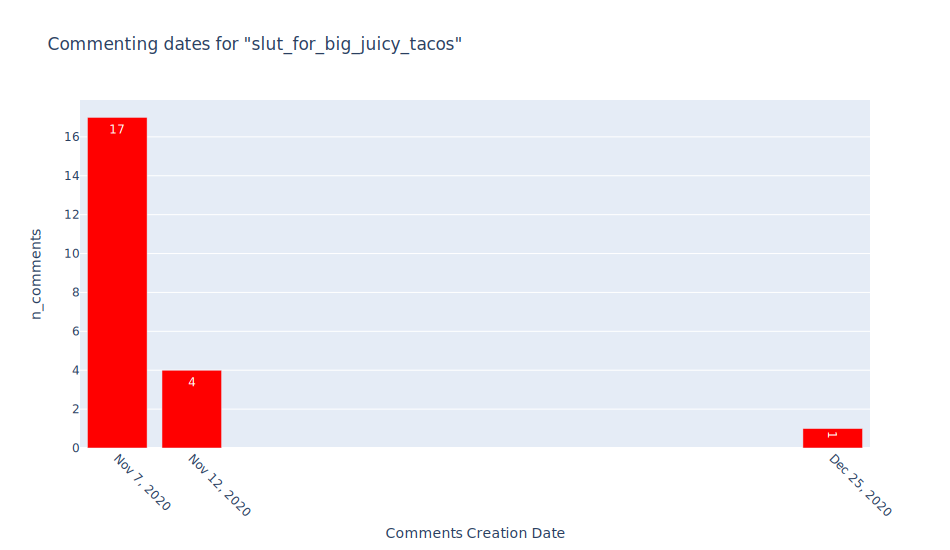

In [1082]:
bar_peaks(get_top(df_comments[df_comments.username == "slut_for_big_juicy_tacos"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "slut_for_big_juicy_tacos"')


#### theworldofgeeks99up
<font color='red'>negative comments</font> 

- 8,311 posts
- 45.3k followers
- 682 following

"@jasonjamie1998 which i don't want amber to be in aquaman 2 that would be cool i'd still go see it but her stupid ass is in it then i cannot at all pay to go watch it and since movie theaters are still not open i doubt i'm gonna pay to watch a movie in theaters again. "

In [1083]:
neg_users = neg_users|{'theworldofgeeks99up'}
neg_text = neg_text|{'stupid ass', 'stupid'}

In [1084]:
df_comments.query("username == 'theworldofgeeks99up'")['message'].value_counts().head(15)

wakanda                                                                                                                                                                                                                                                                         1
@bruh__mode yee.                                                                                                                                                                                                                                                                1
@d_man25 imagine superman still being single. 😅                                                                                                                                                                                                                                 1
@jasonjamie1998 aquaman 2 is gonna be in production soon.                                                                                                                         

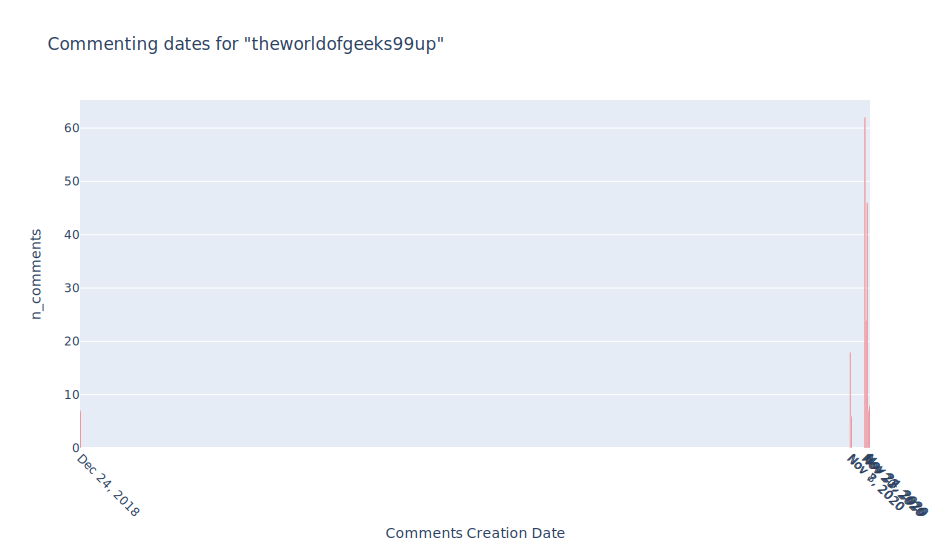

In [1085]:
bar_peaks(get_top(df_comments[df_comments.username == "theworldofgeeks99up"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "theworldofgeeks99up"')

#### olvorka
<font color='red'>negative comments</font> | <font color='red'>newly created</font>

- Account created on JUNE 4, 2021
- 3 posts
- 197 followers
- 83 following

In [1086]:
neg_users = neg_users|{'olvorka'}

In [1087]:
df_comments.query("username == 'olvorka'")['message'].value_counts().head(15)

#justiceforjohnnydepp    16
amber stupid abuser       1
🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁🐁            1
Name: message, dtype: int64

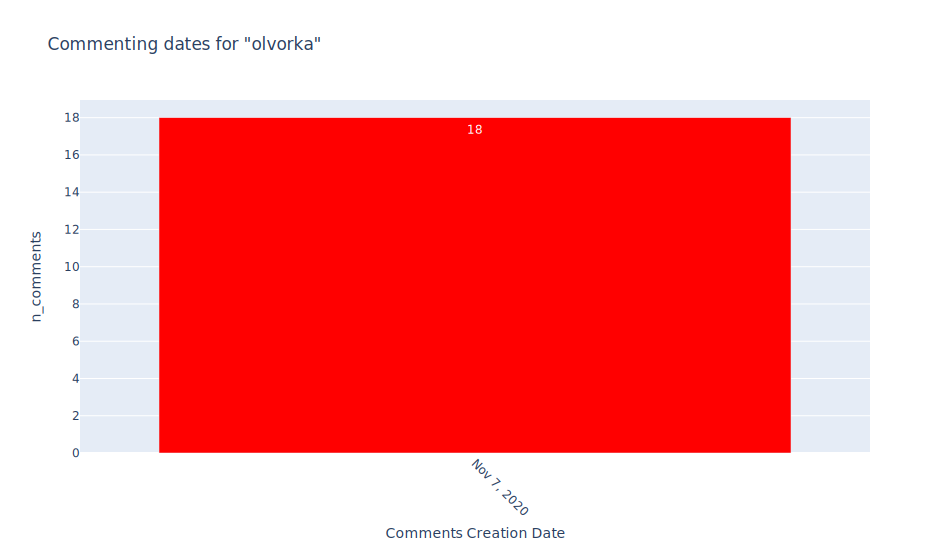

In [1088]:
bar_peaks(get_top(df_comments[df_comments.username == "olvorka"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "olvorka"')

#### sassything90
<font color='red'>negative comments</font>  

- Private Account
- 632 posts
- 357 followers
- 924 following

In [1089]:
neg_users = neg_users|{'sassything90'}
neg_text = neg_text|{'gold digger', 'abusing', 'abuser', 'abuse', 'clown', 
                     'justice for johnny', 'how can you still have fans'}

In [1090]:
df_comments.query("username == 'sassything90'")['message'].value_counts().head(15)

🤢🤮                                                                                                                                                            3
#justiceforjohnnydepp                                                                                                                                         1
you look like you were up all night abusing, johnny depp!                                                                                                     1
🤢🤮🤢🤮                                                                                                                                                          1
i hope you lose your career                                                                                                                                   1
gold digger!                                                                                                                                                  1
no titts! 🤢🤮🤡                           

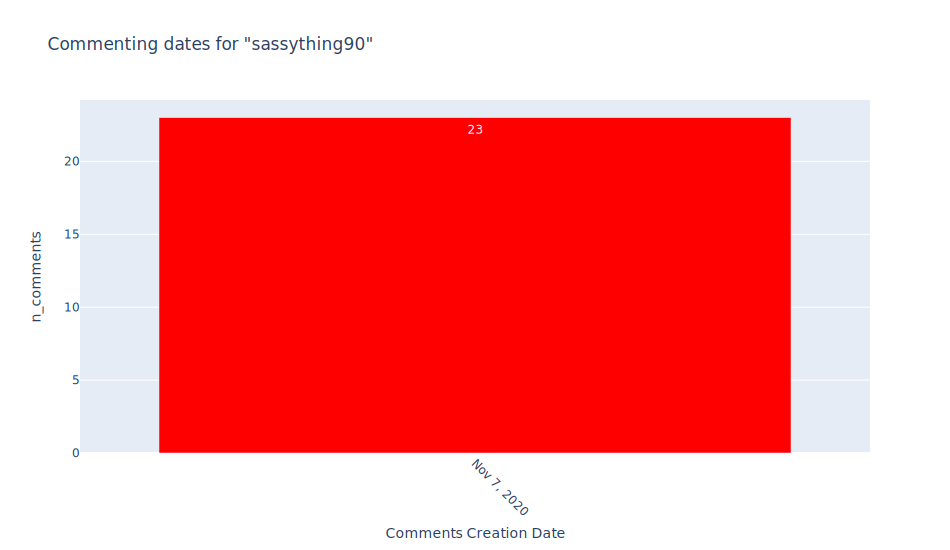

In [1091]:
bar_peaks(get_top(df_comments[df_comments.username == "sassything90"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "sassything90"')

#### azulj.nolasco
<font color='red'>negative comments</font>  

- azuljulieta.nolasco
- 0 posts
- 2 followers
- 1 following

In [1092]:
neg_users = neg_users|{'azulj.nolasco'}

In [1093]:
df_comments.query("username == 'azulj.nolasco'")['message'].value_counts().head(15)

#justiceforjohnnydepp              21
🖕                                   5
🤡🤮💩                                 3
🤮🤮🤮🤮                                2
💩                                   2
🤡🤡🤡                                 2
💩💩💩                                 1
🤡🤡                                  1
🤮🤮🤮                                 1
🤮🤮                                  1
🤡🤡🤡🤡🤮🤮🤮🤮🤮🤮🤡🤡🤡🤮🤮🤮🤮🤮🤮🤡🤡🤡🤮🤮🤮🤡🤡🤡🤮🤮🤮     1
🤡💩🤮                                 1
🤡                                   1
🖕🖕🖕🖕🖕💩💩💩🤮                           1
🤮                                   1
Name: message, dtype: int64

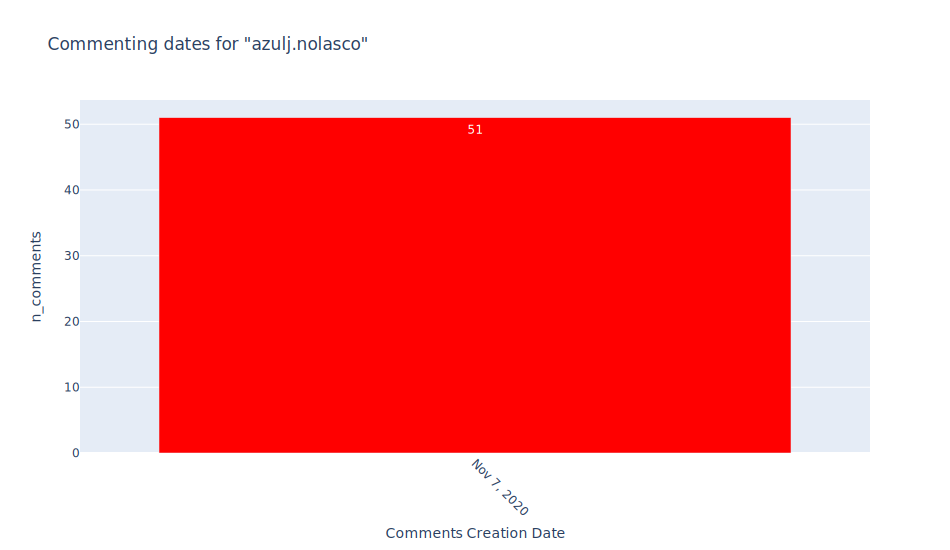

In [1094]:
bar_peaks(get_top(df_comments[df_comments.username == "azulj.nolasco"], 'date', 8, 'date', 'n_comments'),
         'Commenting dates for "azulj.nolasco"')

In [1095]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-07"][
    "message"
].value_counts().head(20)

#justiceforjohnnydepp                                                                                                                                                     307
ضد                                                                                                                                                                         89
❤️                                                                                                                                                                         26
😍                                                                                                                                                                          23
😢                                                                                                                                                                          21
:(                                                                                                                                

### 2020-11-14

In [1096]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-14"][
    "username"
].value_counts().head(10)

hero_doe              27
maikstrange           19
engenhariadocinema    18
mouhoubiabdelghani    15
nathanjackson389      15
theweeknd_avakin      14
dushyant_386          13
dc_geeks              13
kinoholiczka          12
marcelitovalle        12
Name: username, dtype: int64

#### theweeknd_avakin
<font color='red'>negative comments</font> | <font color='red'>newly created</font>
- Account created on DECEMBER 4, 2020
- 97 posts
- 3,166 followers
- 7,105 following

"she's not a good actress either lmao 😂 she's never been nominated for shit"

In [1097]:
neg_users = neg_users|{'theweeknd_avakin'}
neg_text = neg_text|{'nominated for shit', 'shit', 'whorish', 'scammer', 'fake victim'}

In [1098]:
df_comments.query("username == 'theweeknd_avakin'")['message'].value_counts().head(15)

@naveen_3275_ so you saying that  johnny depp getting fired from pirates of the caribbean 6 and fantastic beasts and where to find them 2 are alright but this isn't                                                                                                                                                                                                                                                                           1
@naveen_3275_ if you don't care about amber heard then stop her from being casted for the movie cuz what she deserves is being thrown in jail for playing the victim card and damaging johnny depp's career....and emelia is perfect for the role cuz she and jason was in game of thrones together as khal drogo and khaleesi denarys...and they're chemistry is more perfect than anything the abuser amber turd can put onto the screen.    1
@bridge5306 strong woman......😂 more like a whorish scammer who played the fake victim and tried to destroy the one and only mf johnny

In [1099]:
df_comments[df_comments.datetime.dt.date.astype(str) == "2020-11-14"][
    "message"
].value_counts().head(20)

#justiceforjohnnydepp                                                                                                                                                                                                                                                            67
❤️                                                                                                                                                                                                                                                                               22
❤️❤️❤️                                                                                                                                                                                                                                                                           21
😍                                                                                                                                                                           

<a id='top_hours'></a>
>## Comments on Peak Hours
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours"><b>Comments on Peak Hours</b></a></li> 
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#deep">Deeper Investigations</a></li>
 </ul>

### Users with The Most Contributions on Each Date in The Same Hour

In [1100]:
df = df_comments.groupby(['date', 'hour', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,hour,username,n_comments,n_likes,n_replies
778019,2020-08-24,7,sinasbutterfly,217,0.0,0.0
777975,2020-08-24,6,sinasbutterfly,192,0.0,0.0
777925,2020-08-24,5,sinasbutterfly,191,16.0,2.0
1108581,2021-02-11,8,angel_amber__heard,183,200.0,0.0
778775,2020-08-24,18,sinasbutterfly,144,0.0,0.0
217823,2019-01-10,2,imcoreyrae,114,139.0,0.0
1305000,2021-06-05,11,anaww._.opi,113,9.0,0.0
1036632,2020-12-28,6,angel_amber__heard,112,111.0,0.0
697588,2020-07-12,19,thatsfabofficial,110,566.0,0.0
1306918,2021-06-06,9,maral_kp99,108,4.0,3.0


### Peak Hours

In [1101]:
df = df_comments.groupby(['date', 'hour']).agg({'message':'count', 'n_replies': 'sum', 'n_likes': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)


,date,hour,n_comments,n_replies,n_likes
23289,2020-11-02,13,993,281.0,4877.0
23391,2020-11-06,19,816,367.0,6553.0
17420,2020-03-02,23,797,375.0,13888.0
23294,2020-11-02,18,795,125.0,2394.0
23292,2020-11-02,16,780,285.0,4171.0
23297,2020-11-02,21,773,190.0,4303.0
23296,2020-11-02,20,746,735.0,13807.0
24575,2020-12-26,3,702,111.0,1209.0
24924,2021-01-09,16,700,116.0,1095.0
23291,2020-11-02,15,651,592.0,12186.0


<a id='top_times'></a>
>## Comments on Peak Times
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li> 
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times"><b>Comments on Peak Times</b></a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#deep">Deeper Investigations</a></li>
 </ul>

In [1102]:
df_comments.datetime.value_counts().head(20)

2018-10-25 20:52:06    16
2021-07-10 19:03:46    16
2021-08-15 06:13:29    11
2021-08-15 07:20:19    10
2018-10-25 20:52:07    10
2018-10-25 20:52:04     9
2018-10-25 20:52:01     9
2021-07-11 17:24:29     8
2020-07-31 03:23:07     8
2018-10-25 20:52:08     8
2021-07-20 13:44:22     8
2018-12-04 00:06:17     8
2021-07-16 15:51:42     8
2018-10-25 20:52:02     8
2018-10-25 20:52:05     8
2019-03-11 15:03:51     7
2018-12-04 00:06:13     7
2018-12-21 19:17:05     7
2018-10-25 20:52:03     7
2020-11-11 15:57:20     7
Name: datetime, dtype: int64

#### 2018-10-25 20:52:06 

In [1103]:
df_comments[df_comments.datetime.astype(str) == "2018-10-25 20:52:06"][
    "message"
].value_counts()

bring it on                        3
gotta check it out                 3
billy bob                          2
great movie                        1
oh yeah baby                       1
omg i can't wait to see it         1
when does this hit all theaters    1
this looks amazing                 1
kickass movie                      1
going to see this                  1
holy shit this looks good          1
Name: message, dtype: int64

In [1104]:
df_comments[df_comments.datetime.astype(str) == "2018-10-25 20:52:06"][
    "username"
].value_counts()

poppysmooches      1
sosunovv_          1
el.oze             1
madscrew_band      1
rowdy.ma           1
hams_53            1
fantasista.kr      1
doctor.ca          1
saharazeritv       1
kum_gibi__hayat    1
zachariaspneus     1
foxlife84          1
miguelaclopes      1
dougcourtright     1
onurzlr            1
angelamart__       1
Name: username, dtype: int64

<br>

#### 2021-07-10 19:03:46

In [1105]:
df_comments[df_comments.datetime.astype(str) == "2021-07-10 19:03:46"]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
431967,não é sei,2021-07-10 19:03:46,17918836441761036,3.0,1.0,2614864539877656576,n,7093571712,divaneisancaosilva,False,https://www.instagram.com/divaneisancaosilva,2021,Jul,10,2021-07-10,19
548465,😋😋😉😉,2021-07-10 19:03:46,18182264398140180,0.0,0.0,2614866084007869440,n,48337075999,fhbgkkoo,False,https://www.instagram.com/fhbgkkoo,2021,Jul,10,2021-07-10,19
548467,🙆🙆🙆🙆,2021-07-10 19:03:46,17931181747608260,0.0,0.0,2614866084007869440,n,48491295509,khanjk842,False,https://www.instagram.com/khanjk842,2021,Jul,10,2021-07-10,19
548468,🌍,2021-07-10 19:03:46,17909531332936026,0.0,0.0,2614866084007869440,n,48385055969,nfkd.ksjs,False,https://www.instagram.com/nfkd.ksjs,2021,Jul,10,2021-07-10,19
548469,😑,2021-07-10 19:03:46,17868186359497584,0.0,0.0,2614866084007869440,n,48408997689,whadiz_promoter,False,https://www.instagram.com/whadiz_promoter,2021,Jul,10,2021-07-10,19
548470,💋,2021-07-10 19:03:46,17888277836332616,0.0,0.0,2614866084007869440,n,48620048799,onjvjvjv,False,https://www.instagram.com/onjvjvjv,2021,Jul,10,2021-07-10,19
548471,😔😔😔,2021-07-10 19:03:46,17907146515955280,0.0,0.0,2614866084007869440,n,48793920449,und_rcut,False,https://www.instagram.com/und_rcut,2021,Jul,10,2021-07-10,19
548472,🙈😍,2021-07-10 19:03:46,17904789304915906,0.0,0.0,2614866084007869440,n,44099636139,vishwakarm.karan,False,https://www.instagram.com/vishwakarm.karan,2021,Jul,10,2021-07-10,19
548473,🙈💘💑❤,2021-07-10 19:03:46,17919029926758528,0.0,0.0,2614866084007869440,n,48732887189,shahidkotwal786,False,https://www.instagram.com/shahidkotwal786,2021,Jul,10,2021-07-10,19
548474,🙆🙆🙆🙆,2021-07-10 19:03:46,17887052906240680,0.0,0.0,2614866084007869440,n,48742525469,roushanj9788,False,https://www.instagram.com/roushanj9788,2021,Jul,10,2021-07-10,19


In [1106]:
df_comments[df_comments.datetime.astype(str) == "2021-07-10 19:03:46"][
    "message"
].value_counts()

🙆🙆🙆🙆         2
😑            2
não é sei    1
😋😋😉😉         1
🌍            1
💋            1
😔😔😔          1
🙈😍           1
🙈💘💑❤         1
😂😝😝          1
😍😊😘🙈🙈        1
😂❤           1
😊            1
😇            1
Name: message, dtype: int64

In [1107]:
df_comments[df_comments.datetime.astype(str) == "2021-07-10 19:03:46"][
    "username"
].value_counts()

divaneisancaosilva    1
fhbgkkoo              1
khanjk842             1
nfkd.ksjs             1
whadiz_promoter       1
onjvjvjv              1
und_rcut              1
vishwakarm.karan      1
shahidkotwal786       1
roushanj9788          1
shabna_143            1
paras__khanna_        1
sabat8645             1
h67218223             1
uday.thakur648        1
saini__sahab__        1
Name: username, dtype: int64

<br>

#### 2021-08-15 06:13:29

In [1108]:
df_comments[df_comments.datetime.astype(str) == "2021-08-15 06:13:29"][
    "message"
].value_counts()

😑        2
😍😊😘🙈🙈    2
😊        1
😢        1
👍👍👍      1
💘💑❤      1
👼        1
😇        1
🙈💘💑❤     1
Name: message, dtype: int64

In [1109]:
df_comments[df_comments.datetime.astype(str) == "2021-08-15 06:13:29"][
    "username"
].value_counts()

official_love_thakur_    1
gour.avsingh7676         1
theleo.messi202          1
mv7346714                1
fun_with_tmkoc_1560      1
sidhanathmane2746        1
halka6016                1
devil_boy_king_khan      1
agsoah89                 1
sam4444176               1
_your_bruh_              1
Name: username, dtype: int64

<br>

#### 2021-08-15 07:20:19

In [1110]:
df_comments[df_comments.datetime.astype(str) == "2021-08-15 07:20:19"][
    "message"
].value_counts()

😍       1
😍😍😍     1
🌍       1
😊       1
❤❤      1
😘😢😢😢    1
🙌🙌🙌     1
😂😂😂😂    1
😘😘😘😘    1
💋💋      1
Name: message, dtype: int64

In [1111]:
df_comments[df_comments.datetime.astype(str) == "2021-08-15 07:20:19"][
    "username"
].value_counts()

srarmy129             1
kadi_r2259            1
sarikh_raja           1
mang12739             1
___rohittt___09999    1
divy.ansh4403         1
qhgf_y                1
smalyly3084           1
vabby455              1
ig___201              1
Name: username, dtype: int64

<br>

#### 2018-10-25 20:52:07

In [1112]:
df_comments[df_comments.datetime.astype(str) == "2018-10-25 20:52:07"]

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
538285,great movie,2018-10-25 20:52:07,17993045164038428,0.0,1.0,1898119171314928896,n,3088156712,coolerbaneiran,False,https://www.instagram.com/coolerbaneiran,2018,Oct,25,2018-10-25,20
538286,oh yeah baby,2018-10-25 20:52:07,17996222773021752,0.0,1.0,1898119171314928896,n,5670174335,spa_les_bains_douches,False,https://www.instagram.com/spa_les_bains_douches,2018,Oct,25,2018-10-25,20
538377,damn she's smoking hot,2018-10-25 20:52:07,17885828899278722,0.0,1.0,1898119171314928896,n,3067805787,hafyfon,False,https://www.instagram.com/hafyfon,2018,Oct,25,2018-10-25,20
538378,kickass movie,2018-10-25 20:52:07,17929660612210100,0.0,1.0,1898119171314928896,n,6670998243,managerfixedgames,False,https://www.instagram.com/managerfixedgames,2018,Oct,25,2018-10-25,20
538379,great movie,2018-10-25 20:52:07,17956702552173344,0.0,1.0,1898119171314928896,n,6671543291,dnieper_inst,False,https://www.instagram.com/dnieper_inst,2018,Oct,25,2018-10-25,20
538380,this looks awesome,2018-10-25 20:52:07,17956911073174644,0.0,1.0,1898119171314928896,n,3586948371,rasched.timunga,False,https://www.instagram.com/rasched.timunga,2018,Oct,25,2018-10-25,20
538381,great movie,2018-10-25 20:52:07,17968728649190868,0.0,1.0,1898119171314928896,n,6113732853,lgs_revisao,False,https://www.instagram.com/lgs_revisao,2018,Oct,25,2018-10-25,20
538382,going to see this,2018-10-25 20:52:07,17977956193129384,0.0,1.0,1898119171314928896,n,2276846911,_lasanha__,False,https://www.instagram.com/_lasanha__,2018,Oct,25,2018-10-25,20
538383,this looks amazing,2018-10-25 20:52:07,17984109925072804,0.0,1.0,1898119171314928896,n,3649970085,zhonggenliangxing4019,False,https://www.instagram.com/zhonggenliangxing4019,2018,Oct,25,2018-10-25,20
538384,oh yeah baby,2018-10-25 20:52:07,17992208497050608,0.0,1.0,1898119171314928896,n,4376244940,slicklubeco,False,https://www.instagram.com/slicklubeco,2018,Oct,25,2018-10-25,20


In [1113]:
df_comments[df_comments.datetime.astype(str) == "2018-10-25 20:52:07"][
    "message"
].value_counts()

great movie               3
oh yeah baby              2
damn she's smoking hot    1
kickass movie             1
this looks awesome        1
going to see this         1
this looks amazing        1
Name: message, dtype: int64

In [1114]:
df_comments[df_comments.datetime.astype(str) == "2018-10-25 20:52:07"][
    "username"
].value_counts()

coolerbaneiran           1
spa_les_bains_douches    1
hafyfon                  1
managerfixedgames        1
dnieper_inst             1
rasched.timunga          1
lgs_revisao              1
_lasanha__               1
zhonggenliangxing4019    1
slicklubeco              1
Name: username, dtype: int64

<a id='top_commented'></a>
>## Top Commented Users
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>  
 <li><a href="#top_commented"><b>Top Commented Users</b></a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#deep">Deeper Investigations</a></li>
 </ul>

In [1115]:
df_top_users = (
    df_comments["username"]
    .value_counts()
    .to_frame()
    .reset_index()
    .rename(columns={"index": "user_name", "username": "n_comments"})
)


Investigated --> These Users are Posting Normal Comments



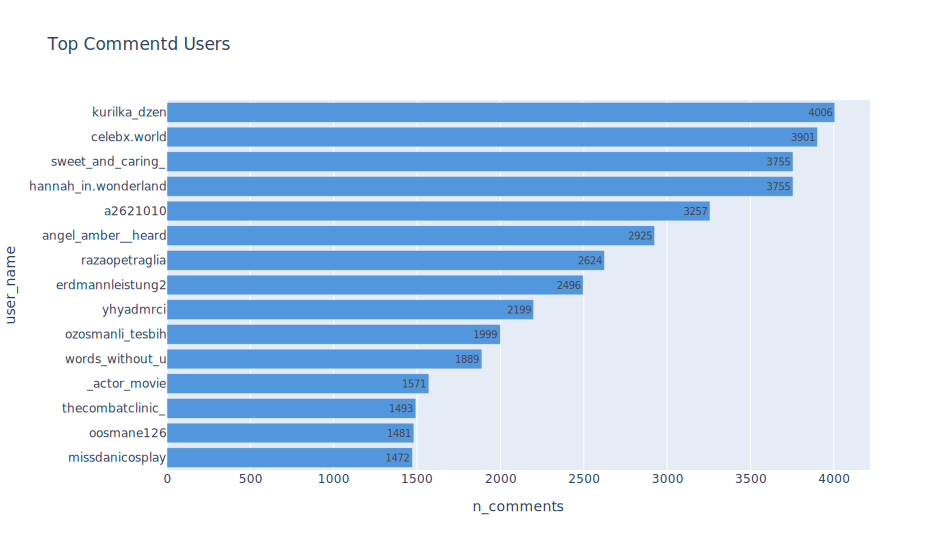

In [1116]:
print("\nInvestigated --> These Users are Posting Normal Comments\n")
barh(df_top_users.head(15), "Top Commentd Users")

<a id='most_likes'></a>
>## Users with the Most Likes
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>  
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes"><b>Users with the Most Likes</b></a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#deep">Deeper Investigations</a></li>
 </ul>

In [1117]:
df_nlikes = df_comments.groupby(['username']).agg({'message':'count', 'n_replies': 'sum', 'n_likes': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_likes', ascending=False)

df_nlikes.head(15)

,username,n_comments,n_replies,n_likes
37879,acciopark,3,4.0,9501.0
373349,littleflowerofmercy,78,18.0,9179.0
553685,sakazuki92,29,32.0,7828.0
9998,_.yarleth_albornoz._,20,2.0,6357.0
144121,chris_darden1999,17,10.0,5791.0
479656,nuria_0_,16,1.0,5753.0
671506,yourfavemuzzie,5,0.0,5592.0
363813,lectores_e_introvertidos,106,17.0,5483.0
355346,kurilka_dzen,4006,421.0,5477.0
170810,dceu_family,463,35.0,5391.0


In [1118]:
neg_users = neg_users | {"sakazuki92", "_.yarleth_albornoz._", "chris_darden1999", "yourfavemuzzie"}

In [1119]:
colors = []
for user in df_nlikes.head(10)['username']:
    if user in neg_users:
        colors.append('red')
    else: 
        colors.append('#5296dd')


Note: Negatively commenting users are highlighted in "red"


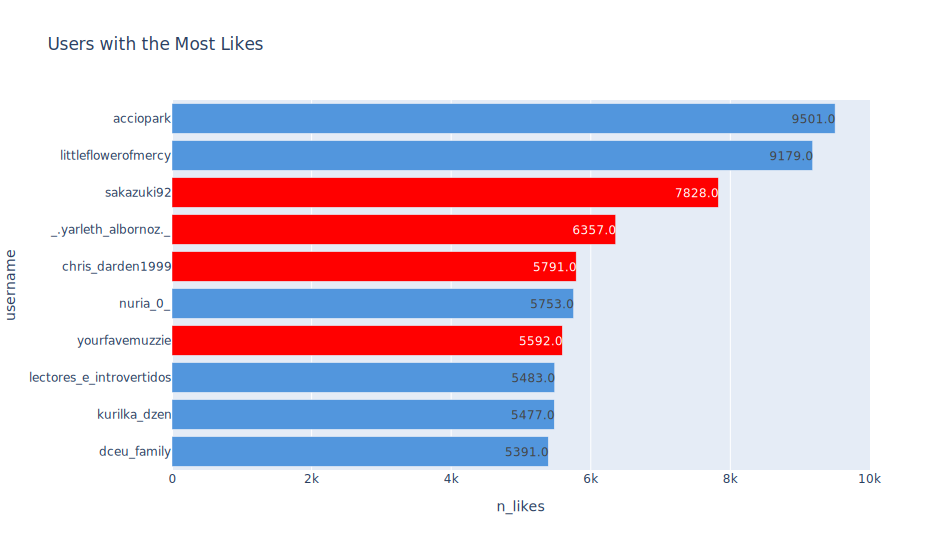

In [1120]:
print('\nNote: Negatively commenting users are highlighted in "red"')
barh(df_nlikes[['username', 'n_likes']].head(10), 'Users with the Most Likes', c=colors)

In [1121]:
neg_text = neg_text|{'disgusting', 'domestic violence', 'threw a vodka bottle', 'fucked the right off',
                     "no one will believe you're a victim because you're a man", 
                     '50 million', '7 million', 'lawsuit', 'violent', 'bitch', 'exposing her ass',
                     'punched', "shut", 'garbage'}

The sun --> refers to a newspaper
Johnny Depp has lost his libel case against the Sun newspaper over an article that called him a "wife beater".

@sakazuki92 information about the actual case:\n1. the $50 million lawsuit - amber's tried to dismiss it 3x and failed. she's on her 4th attempt. \n2. amber wanted a protective order which is where info doesn't get released to the public. johnny wanted the opposite and the judge granted his wishes (why hide the truth eh?)\n3. the judge told her to redraft all her evidence because it has nothing to do with the case in january 2020. she's basically "fishing" for things and delaying because it's a losing case. \n4. johnny also has a lawsuit vs the sun when the sun called him a "wife beater". the trial is next march. if johnny wins which is 99%, then this will have a major impact on the actual amber heard case. that means the courts can't dismiss the case or whatever and it'll look really bad on amber.

In [1122]:
df_comments.query("username= ='sakazuki92'")["message"].value_counts()

garbage.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     1
@sakazuki92 list of things she did to johnny on top of the lies and verbal abuse:\n1. threw a vodka bottle at him which severed his finger and he contracted mrsa 3 times. followed by pu

In [1123]:
# df_comments.query("username= ='_.yarleth_albornoz._'")['message'].value_counts()

In [1124]:
neg_text = neg_text|{'because she’s a woman', 'because she is a woman', 'change.org', 'petition', 'removed',
                     'prison', 'felony'}

In [1125]:
df_comments.query("username= ='chris_darden1999'")["message"].value_counts()

👎                                                                                                                                                                                                                         2
just wow                                                                                                                                                                                                                  1
use me as a “i’m not going to see it” button.                                                                                                                                                                             1
@jj.so_smooth kevin spacey hasn’t made any movies since his incident. i’m not saying to not watch movies she’s been in before, just not to watch any new ones she may be in. duh.                                         1
@janner_w_7 i’m not even going to watch it if it’s free lol                                                             

In [1126]:
neg_text = neg_text|{'clown'}

In [1127]:
df_comments.query("username= ='yourfavemuzzie'")["message"].value_counts()

@_.paaiggee god that woman is disgusting 🤡                                                                                                                                                                                                                                                                                                                     1
@ievux24 i hope he does but she really tried to take $50 million away from this man to  make it seem to the public like she was the victim...luckily she didn’t get the money but she’s so disgusting 🤡                                                                                                                                                        1
@chris_mendt but her ex’s all say she is an abuser...bless that poor man and fuck the people that didn’t believe him from the beginning... i’m hoping he didn’t feel suicidal whilst being with that clown called amber or now😭                                                                       

In [1128]:
# Note: We use @ with query, just like .isin() in masking 
# df_comments.query(' username == neg_users[0]').count()['message']

In [1129]:
# A list of the negatively commented users with the most n_likes
neg_users_list = ["sakazuki92", "_.yarleth_albornoz._", "chris_darden1999", "yourfavemuzzie"]

In [1130]:
# filter the dataframe on the users with the most number of likes
# and commenting in a negative way
df_neg = df_comments.query(' username == @neg_users_list')

In [1131]:
df = df_neg.groupby('username').agg({'message':'count', 'n_replies': 'sum', 'n_likes': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'})

df.sort_values('n_comments', ascending=False)

,username,n_comments,n_replies,n_likes
2,sakazuki92,29,32.0,7828.0
0,_.yarleth_albornoz._,20,2.0,6357.0
1,chris_darden1999,17,10.0,5791.0
3,yourfavemuzzie,5,0.0,5592.0


In [1132]:
# get the daily like counts for the users with the most number of likes
# and commenting in a negative way
df = df_neg.groupby(['username', 'date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'})

df.sort_values('n_comments', ascending=False).head(15)

,username,date,n_comments,n_likes,n_replies
5,_.yarleth_albornoz._,2021-06-16,12,6348.0,0.0
18,sakazuki92,2020-02-15,9,3479.0,31.0
19,sakazuki92,2020-02-16,7,81.0,0.0
8,chris_darden1999,2020-05-13,6,3.0,0.0
21,sakazuki92,2020-02-20,6,2538.0,0.0
24,yourfavemuzzie,2020-02-18,5,5592.0,0.0
14,chris_darden1999,2021-06-28,4,4326.0,0.0
2,_.yarleth_albornoz._,2020-03-21,2,1.0,0.0
3,_.yarleth_albornoz._,2020-07-30,2,2.0,2.0
4,_.yarleth_albornoz._,2020-11-07,2,4.0,0.0


sakazuki92: <font color='red'>negative comments</font>
- Private Account
- 0 posts
- 0 followers
- 10 following
- sakazuki92 ^ created around January 2017
- 29 comments with 32 replies and 7828 likes

_.yarleth_albornoz._: posting #JusticeForJohnnyDepp
- First Posted on Jun 3,2019
- 8 posts
- 1,306 followers
- 1,598 following
- _.yarleth_albornoz._ ^ created around February 2017.
- 20 comments with 2 replies and 6357 likes


chris_darden1999: <font color='red'>negative comments</font>
- Private Account
- 2,109 posts
- 723 followers
- 3211 following
- chris_darden1999 ^ created around January 2014.
- 17 comments with 10 replies and 5791 likes


yourfavemuzzie: <font color='red'>negative comments</font>
- Private Account
- 11 posts
- 130 followers
- 491 following
- yourfavemuzzie ^ created around February 2015
- 5 comments with 0 replies and 5592 likes


<a id='most_replies'></a>
>## Users with the Most Replies
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>  
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies"><b>Users with the Most Replies</b></a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li> 
 <li><a href="#deep">Deeper Investigations</a></li>
 </ul>

In [1133]:
df_nreplies = df_comments.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_replies', ascending=False)

df_nreplies.head(15)

,username,n_comments,n_likes,n_replies
661035,words_without_u,1889,2735.0,712.0
269070,hero_doe,80,286.0,517.0
418008,mcu_crawler_dc,527,570.0,466.0
158545,cute.scarlett,787,375.0,432.0
504689,pineros.fabito,1155,401.0,425.0
355346,kurilka_dzen,4006,5477.0,421.0
24053,_marveltime,690,390.0,357.0
358160,ladygoth1533,379,610.0,349.0
598819,stirgussa,595,815.0,288.0
453182,mukul.c00l,830,1073.0,287.0



Investigated --> These Users are Posting Normal Comments



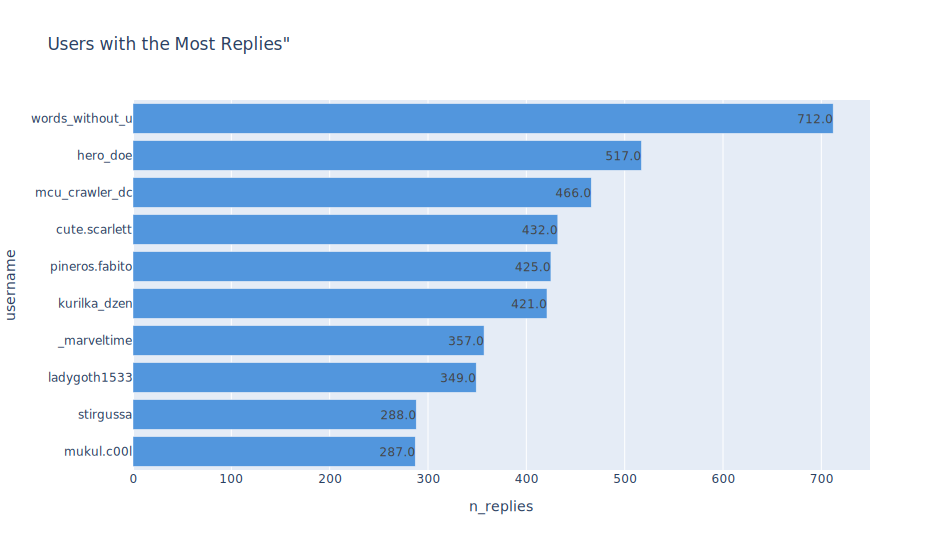

In [1134]:
print("\nInvestigated --> These Users are Posting Normal Comments\n")
barh(df_nreplies[['username', 'n_replies']].head(10), 'Users with the Most Replies"')

In [1135]:
df_comments.query("username= ='hero_doe'")["message"].value_counts()

she's hot so who cares                                                                                                                                   1
@hero_doe @b4.cl  careful there buddy                                                                                                                    1
@sweet_like.h0ney lmaooo                                                                                                                                 1
@sweet_like.h0ney oh darn i was really really trying to be like by all these random indian dudes oh gosh what a tragedy :/                               1
@hero_doe @thelegionofgeeks i love how your gay fan base is just makin you proud, i'm going to go after all of your other media accounts. see ya soon    1
                                                                                                                                                        ..
@dragonfure_noway yall really defend someone who will never notice you

<a id='top_comments'></a>
>## Most Repeated Comments
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments"><b>Most Repeated Comments</b></a></li>
 <li><a href="#same">Same Text Same Date</a></li>
 <li><a href="#deep">Deeper Investigations</a></li>
 </ul>

In [1136]:
df_comments.message.value_counts().head(25)

❤️                       16024
😍                        11011
❤️❤️❤️                   10774
😍😍😍                       8664
❤️❤️                      5566
❤️❤️❤️❤️                  5500
🔥🔥🔥                       5298
beautiful                 5187
😍😍😍😍                      5084
😍😍                        5042
❤️❤️❤️❤️❤️                4942
#justiceforjohnnydepp     4862
🔥                         4761
😍😍😍😍😍                     3625
🔥🔥                        2861
🔥🔥🔥🔥                      2798
❤️❤️❤️❤️❤️❤️              2723
🔥🔥🔥🔥🔥                     2111
nice                      2106
2                         2099
😍😍😍😍😍😍                    2075
1                         2043
👍                         1949
😂😂😂                       1874
❤️❤️❤️❤️❤️❤️❤️            1826
Name: message, dtype: int64

**NOTE:** #justiceforjohnnydepp is the most repeated comment --> 4862 times

<br>

<a id='same'></a>
>>## Same Text Same Date
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>  
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same"><b>Same Text Same Date</b></a></li>
 <li><a href="#deep">Deeper Investigations</a></li>   
 </ul>

In [1137]:
print('\nThe Amplifications in the counts and number of likes on #justiceforjohnnydepp is quite obvious!!')
df = df_comments.groupby(["message", "date"]).agg({'id':'count', 'n_replies':'sum', 'n_likes':'sum'}).reset_index()
df.rename(columns={'id': 'count'}, inplace=True) 
df.sort_values("count", ascending=False).head(60)


The Amplifications in the counts and number of likes on #justiceforjohnnydepp is quite obvious!!


,message,date,count,n_replies,n_likes
365387,@sinadeinert @sinadeinertcf #sinas22 ❤️,2020-08-24,418,0.0,12.0
12337,#justiceforjohnnydepp,2020-11-07,307,4.0,2570.0
12343,#justiceforjohnnydepp,2020-11-13,221,41.0,4456.0
365375,@sinadeinert #sinas22 💕,2020-08-24,201,0.0,0.0
907757,red,2018-04-09,178,4.0,57.0
12378,#justiceforjohnnydepp,2020-12-18,162,6.0,473.0
12338,#justiceforjohnnydepp,2020-11-08,159,9.0,1059.0
907756,red,2018-04-08,155,0.0,3.0
910375,right,2018-07-07,153,0.0,24.0
907758,red,2018-04-10,153,0.0,29.0


In [1138]:
top_repeted = (
    df_comments.groupby(["message", "date"])
    .count()
    .sort_values("datetime", ascending=False)
    .index
)

<a id='deep'></a>
>## Deeper Investigations
> <ul>
 <li><a href="#over_time">Comments Created OVER TIME</a></li>
 <li><a href="#peaks">Investigate Peaks</a></li>
 <li><a href="#top_peaks">Comments on Peak Days</a></li>
 <li><a href="#top_hours">Comments on Peak Hours</a></li>
 <li><a href="#top_times">Comments on Peak Times</a></li> 
    <li>------------------------------</li>
 <li><a href="#top_commented">Top Commented Users</a></li>
 <li><a href="#most_likes">Users with the Most Likes</a></li>
 <li><a href="#most_replies">Users with the Most Replies</a></li>
 <li><a href="#top_comments">Most Repeated Comments</a></li>
 <li><a href="#same">Same Text Same Date</a></li> 
 <li><a href="#deep"><b>Deeper Investigations</b></a></li>   
 </ul>

<a id='justice'></a>
>>## #justiceforjohnnydepp
> <ul>
 <li><a href="#justice"><b>#justiceforjohnnydepp</b></a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
 <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

###  Hashtags Count

| Hashtag | Count |
| :--|:--|
|**#justiceforjohnnydepp**| 10244|
|**#amberheardisanabuser**| 2032|
|**#wearewithyoujohnnydepp**| 805|
|**#amberheardisaliar**| 776| 
|**#amberturd**| 449|
|**#fireamberheard**| 349|
|**#fuckthesun**| 335|
|**#boycottamberheard**| 324|
|**#ambertheabuser**| 165|
|**#amberheardisanabuserandliar**| 144|
|**#jailforamberheard**| 89|
|**#removeamberheardsfromaquaman2**| 57|

In [1139]:
# neg_users = neg_users|{'di22mendez'}
# neg_text = neg_text|{'remove amber', 'remove-amber', 'removed'}

In [1140]:
# Add all the negative hashtags to the negative text
neg_text = neg_text|{'ambertheabuser', 'fireamberheard', 'amberturd', 'jailforamberheard',
                     'amberheardisanabuserandliar', 'boycottamberheard', 'removeamberheardsfromaquaman2', 
                     'amberheardisanabuser', 'fuckthesun', 'amberheardisaliar', 'wearewithyoujohnnydepp'}

In [1141]:
len(df_comments[df_comments["message"].str.contains("#ambertheabuser")])

165

In [1142]:
len(df_comments[df_comments["message"].str.contains("#fireamberheard")])

349

In [1143]:
len(df_comments[df_comments["message"].str.contains("#amberturd")])

449

In [1144]:
len(df_comments[df_comments["message"].str.contains("#jailforamberheard")])

89

In [1145]:
len(df_comments[df_comments["message"].str.contains("#amberheardisanabuserandliar")])

144

In [1146]:
len(df_comments[df_comments["message"].str.contains("#boycottamberheard")])

324

In [1147]:
len(df_comments[df_comments["message"].str.contains("#removeamberheardsfromaquaman2")])

57

In [1148]:
len(df_comments[df_comments["message"].str.contains("#amberheardisanabuser")])

2032

In [1149]:
len(df_comments[df_comments["message"].str.contains("#fuckthesun")])

335

In [1150]:
len(df_comments[df_comments["message"].str.contains("#amberheardisaliar")])

776

In [1151]:
len(df_comments[df_comments["message"].str.contains("#wearewithyoujohnnydepp")])

805

In [1152]:
top_repeted[1][0]

'#justiceforjohnnydepp'

In [1153]:
justice = ['justiceforjohnnydepp', 'justice for johnny'] 

### A Heat Map for the Count of Comments Containing "justiceforjohnnydepp" 


Note: The Peaks Also on Nov 2020



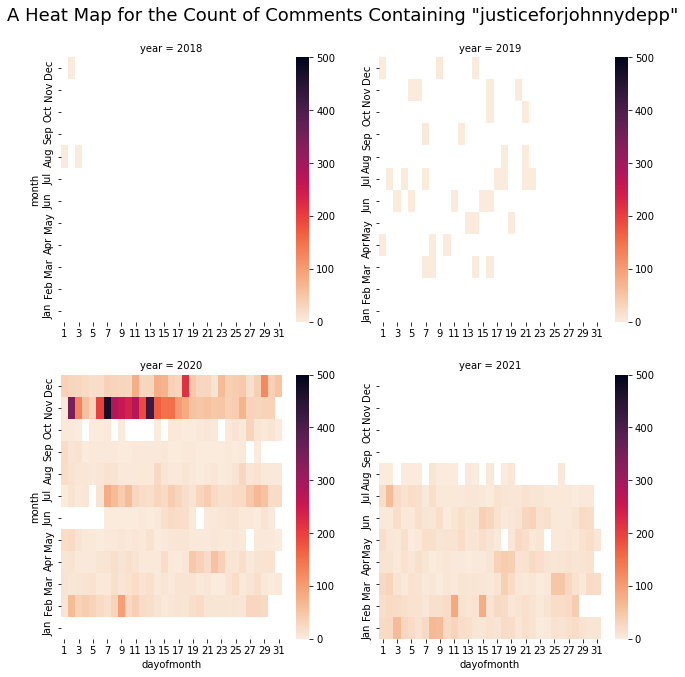

In [1154]:
df_justice = df_comments[df_comments["message"].str.contains('|'.join(justice))]
daily_counts = df_justice.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print('\nNote: The Peaks Also on Nov 2020\n')
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=2, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=500);

plt.suptitle('A Heat Map for the Count of Comments Containing "justiceforjohnnydepp"', y=1.04, fontsize=18)
g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1155]:
len(df_justice)

11320

### Most Repeated Comments Containing "justiceforjohnnydepp"

In [1156]:
df = df_justice.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
297,#justiceforjohnnydepp,4862,41032.0,490.0
2822,justice for johnny depp,168,1924.0,83.0
2804,justice for johnny,141,1267.0,29.0
1464,@johnnydepp #wearewithyoujohnnydepp #amberhear...,124,23.0,0.0
73,#ambertheabuser #justiceforjohnnydepp,93,201.0,2.0
401,#justiceforjohnnydepp #amberheardisanabuser,84,337.0,9.0
842,#justiceforjohnnydepp ❤️,75,337.0,1.0
49,#amberheardisanabuser #justiceforjohnnydepp,75,232.0,15.0
2245,fuck amber heard #justiceforjohnnydepp,62,121.0,5.0
2254,fuck amber heard! #justiceforjohnnydepp,40,74.0,16.0


In [1157]:
df_justice.message.value_counts().head(10)

#justiceforjohnnydepp                                                                                                                       4862
justice for johnny depp                                                                                                                      168
justice for johnny                                                                                                                           141
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun     124
#ambertheabuser #justiceforjohnnydepp                                                                                                         93
#justiceforjohnnydepp #amberheardisanabuser                                                                                                   84
#amberheardisanabuser #justiceforjohnnydepp                                                                                       

### Top Users Commented with "justiceforjohnnydepp"

In [1158]:
# The total number of different users posted justiceforjohnnydepp
df_justice.username.nunique()

5847

In [1159]:
df_njustice = df_justice.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_njustice.head(25)


,username,n_comments,n_likes,n_replies
946,becauseitsjohnnydepp,180,284.0,8.0
3932,moonbeam429,128,153.0,5.0
4369,pauu.eg,115,257.0,2.0
3147,kingskippy1987,99,148.0,17.0
714,annalena_1963,82,129.0,4.0
3530,machelyyyyy,75,122.0,29.0
4314,ownage130,72,1.0,0.0
4491,queenmusicvidoe,70,14.0,0.0
4082,naye6504,56,484.0,10.0
1158,c_shortt,55,173.0,6.0


In [1160]:
# neg_users = neg_users|set(df_njustice.username.unique())

In [1161]:
newly_created = {'moonbeam429', 'mathxy._01', 'netos.k', 'justicie.for.johnny.depp', 'machelyyyyy',
                 'queenmusicvideo', 'divulgaaa.bahia', 'wewantjusticeforjohnnydepp'}

colors = []
for user in df_njustice['username'].head(20):
    if user in newly_created:
        colors.append('red')
    else: 
        colors.append('#5296dd')


newly created (after 2018) accounts are colored in "red"


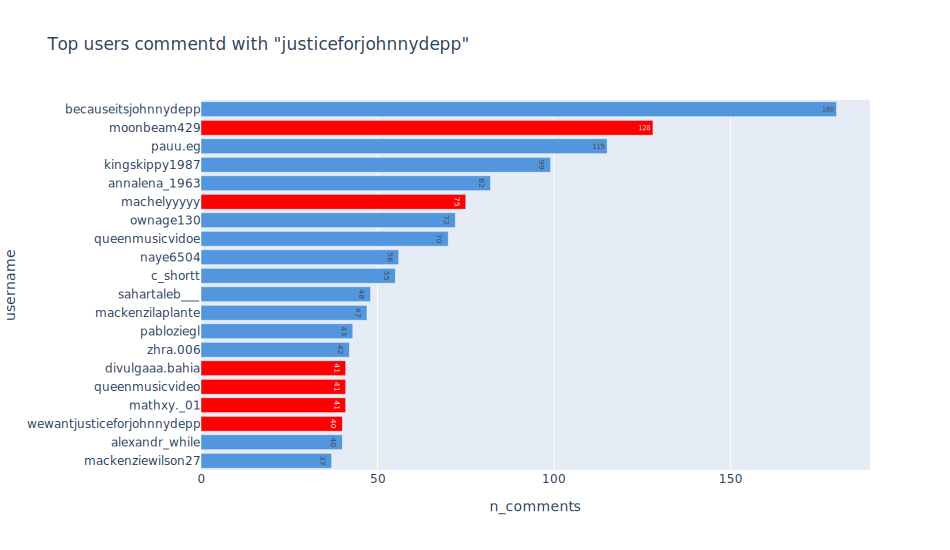

In [1162]:
print('\nnewly created (after 2018) accounts are colored in "red"')
barh(
    df_njustice[['username', 'n_comments']].head(20), 'Top users commentd with  "justiceforjohnnydepp"', c=colors
)

### "justiceforjohnnydepp" Users Contributions on Each Date

In [1163]:
df = df_justice.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
6637,2021-02-15,ownage130,72,1.0,0.0
2356,2020-11-02,queenmusicvidoe,70,14.0,0.0
5268,2020-12-11,kingskippy1987,55,14.0,0.0
2355,2020-11-02,queenmusicvideo,41,0.0,0.0
6072,2021-01-03,mathxy._01,40,29.0,1.0
3569,2020-11-11,c_shortt,35,118.0,4.0
4045,2020-11-13,netos.k,34,7.0,2.0
2291,2020-11-02,babikate6,33,11.0,0.0
6609,2021-02-11,zhra.006,32,3.0,0.0
6933,2021-03-18,justicie.for.johnny.depp,31,96.0,2.0


In [1164]:
neg_users = neg_users|set(df_njustice.head(10).username)

### "justiceforjohnnydepp" Peak Dates

In [1165]:
justice_dates = df_justice.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

justice_dates.head(15)


,date,n_comments,n_likes,n_replies
298,2020-11-07,471,3522.0,31.0
304,2020-11-13,422,6272.0,75.0
293,2020-11-02,347,923.0,20.0
302,2020-11-11,278,1101.0,22.0
299,2020-11-08,276,2401.0,29.0
300,2020-11-09,254,1444.0,61.0
301,2020-11-10,236,1442.0,26.0
339,2020-12-18,215,767.0,8.0
297,2020-11-06,200,2777.0,16.0
303,2020-11-12,189,878.0,19.0


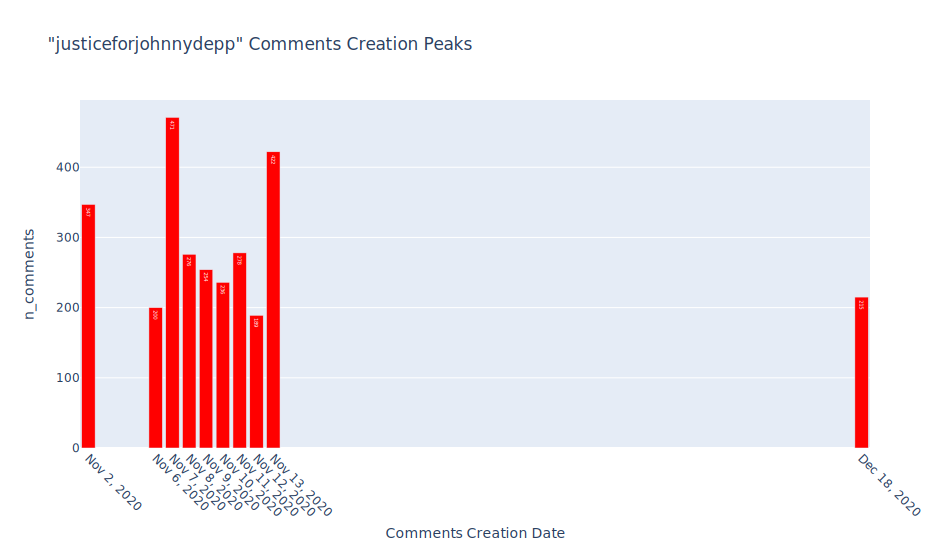

In [1166]:
bar_peaks(justice_dates[['date', 'n_comments']].head(10), '"justiceforjohnnydepp" Comments Creation Peaks')

#### pauu.eg
- private account
- 39 posts
- 301 followers
- 153 following

#### kingskippy1987
- private account
- 136 posts
- 88 followers
- 98 following

#### annalena_1963
- private account
- 1,297 posts
- 566 followers
- 917 following

#### queenmusicvidoe
- private account
- 0 posts
- 4 followers
- 403 following

#### c_shortt
- private account
- 681 posts
- 3,007 followers
- 2,267 following

#### mackenzilaplante
- private account
- 25 posts
- 72 followers
- 62 following

#### sahartaleb___
- private account
- 0 posts
- 42 followers
- 37 following


#### pabloziegl
- first posted on JANUARY 15, 2014
- 88 posts
- 159 followers
- 693 following

#### zhra.006
- didn't found

#### queenmusicvideo <font color='red'>newly created</font>
- first posted on SEPTEMBER 22, 2020
- 78 posts
- 1,860 followers
- 246 following


#### divulgaaa.bahia <font color='red'>newly created</font>
- first posted on JULY 17, 2020
- 21 posts
- 113 followers
- 5,982 following

#### alexandr_while 
- private account
- 29 posts
- 157 followers
- 123 following

#### wewantjusticeforjohnnydepp  <font color='red'>newly created</font>
- first posted on NOVEMBER 2, 2020
- 160 posts
- 1,052 followers
- 170 following

#### mackenziewilson27
- 0 posts
- 145 followers
- 170 following


#### becauseitsjohnnydepp
- first posted on Aug 23, 2016  
https://www.instagram.com/p/BJbXDWCjWrz/
- has a total of 10,810 posts 
- 35.7k followers
- 1,968 following
- becauseitsjohnnydepp ^ created around September 2016

https://www.instagram.com/p/B8xNqbkn-O3/

  
#### ownage130
- is a private account 
- ownage130 ^ created around March-April 2017.

#### moonbeam429  <font color='red'>newly created</font>
- first posted on May 20, 2018 
- has a total of 808 posts (all are pictures of johnny depp)
- 117 followers
- 160 following
- moonbeam429 ^ created around June 2018.

#### mathxy._01
- is a private account 
- mathxy._01 ^ created around February 2015.

#### netos.k  <font color='red'>newly created</font>
- first posted on Jul 6, 2020 
- has a total of 2 posts 
- 596 followers
- 616 following
- netos.k ^ created around January 2015.

#### justicie.for.johnny.depp  <font color='red'>newly created</font>
- first posted on Feb 1, 2021
- has a total of 80 posts 
- 649 followers
- 250 following
- justicie.for.johnny.depp ^ created after 15 December 2020

#### machelyyyyy  <font color='red'>newly created</font>
- is a private account 
- machelyyyyy ^ created around April 2018

### More Investigations on Top Users Commented with "justiceforjohnnydepp"

In [1167]:
df_justice.username.value_counts().head(10)

becauseitsjohnnydepp    180
moonbeam429             128
pauu.eg                 115
kingskippy1987           99
annalena_1963            82
machelyyyyy              75
ownage130                72
queenmusicvidoe          70
naye6504                 56
c_shortt                 55
Name: username, dtype: int64

#### ownage130 

In [1168]:
df_justice.query("username=='ownage130'").date.value_counts()

2021-02-15    72
Name: date, dtype: int64

In [1169]:
df_justice.query("username=='ownage130'").datetime.dt.hour.value_counts()

2    41
1    30
4     1
Name: datetime, dtype: int64

In [1170]:
df_justice.query("username=='ownage130'").n_likes.value_counts()

0.0    71
1.0     1
Name: n_likes, dtype: int64

In [1171]:
df_justice.query("username=='ownage130'").n_replies.value_counts()

0.0    72
Name: n_replies, dtype: int64

#### moonbeam429`

In [1172]:
df_justice.query("username=='moonbeam429'").date.value_counts()

2020-04-08    6
2020-03-18    5
2020-06-16    4
2020-07-08    4
2020-07-09    4
             ..
2020-03-25    1
2020-04-11    1
2020-06-24    1
2020-06-29    1
2020-03-05    1
Name: date, Length: 65, dtype: int64

In [1173]:
df_justice.query("username=='moonbeam429'").datetime.dt.hour.value_counts()

2     19
0     18
19    12
23    11
15    10
21     9
3      8
18     8
16     6
14     5
13     4
5      4
20     3
4      3
12     2
17     2
22     2
8      1
1      1
Name: datetime, dtype: int64

In [1174]:
df_justice.query("username=='moonbeam429'").n_likes.value_counts()

0.0     63
1.0     30
2.0     17
3.0      8
4.0      4
6.0      2
7.0      1
5.0      1
11.0     1
14.0     1
Name: n_likes, dtype: int64

In [1175]:
df_justice.query("username=='moonbeam429'").n_replies.value_counts()

0.0    124
1.0      3
2.0      1
Name: n_replies, dtype: int64

**moonbeam429**
- made 56 comments with sme text (supportjohnnydepp) in different times.
- moonbeam429 ^ created around June 2018

#### becauseitsjohnnydepp

In [1176]:
df_justice.query("username=='becauseitsjohnnydepp'").date.value_counts()

2020-11-13    27
2020-11-03    26
2020-11-07    12
2020-11-08    12
2020-11-17     9
2020-11-11     9
2020-11-12     8
2020-12-10     6
2020-11-16     6
2020-11-27     6
2020-11-09     5
2020-12-18     5
2021-01-09     3
2020-12-03     3
2020-11-14     3
2020-11-04     3
2020-11-28     2
2020-12-28     2
2020-11-20     2
2020-03-24     2
2021-04-17     2
2020-11-05     2
2020-11-18     2
2020-11-29     2
2020-12-12     1
2020-12-24     1
2020-02-01     1
2020-07-15     1
2020-11-21     1
2020-10-16     1
2020-06-26     1
2020-12-19     1
2020-07-09     1
2020-10-28     1
2020-08-02     1
2020-09-01     1
2020-03-25     1
2020-11-10     1
2020-12-26     1
2020-11-23     1
2020-12-11     1
2020-12-21     1
2020-10-17     1
2020-03-28     1
2020-12-04     1
Name: date, dtype: int64

In [1177]:
df_justice.query("username=='becauseitsjohnnydepp'").datetime.dt.hour.value_counts()

23    31
20    23
15    19
0     18
13    14
2     12
1     12
17    10
19     9
22     8
16     6
21     6
10     3
11     3
5      2
18     2
3      1
12     1
Name: datetime, dtype: int64

In [1178]:
df_justice.query("username=='becauseitsjohnnydepp'").n_likes.value_counts()

0.0     107
1.0      34
2.0      13
4.0       7
3.0       7
5.0       3
6.0       2
12.0      2
11.0      1
35.0      1
10.0      1
50.0      1
18.0      1
Name: n_likes, dtype: int64

In [1179]:
df_justice.query("username=='becauseitsjohnnydepp'").n_replies.value_counts()

0.0    172
1.0      8
Name: n_replies, dtype: int64

**becauseitsjohnnydepp**
- made 55 comments with same text (supportjohnnydepp) in different times:
    - 2020-11-03    26
    - 2020-11-07    12
    - 2020-11-04     3
- becauseitsjohnnydepp ^ created around September 2016

<a id='amber'></a>
>### Contains Amber
> <ul>
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber"><b>Contains "Amber"</b></a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
 <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

>><ul>
 <li><a href="#neg">Negative Comments</a></li>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">F*ck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

**Steps:**
- Get dataframe that with comments contain amber **amber**.
- Get top 50 comments **amber_top**.
- Extract text reltedd to abmer form the comments.
- Get unique text related to amber to be analysed.

### A Heat Map for the Count of Comments Containing "Amber" 


Note: The peaks on Nov 2020, and on Dec 27 2019
 


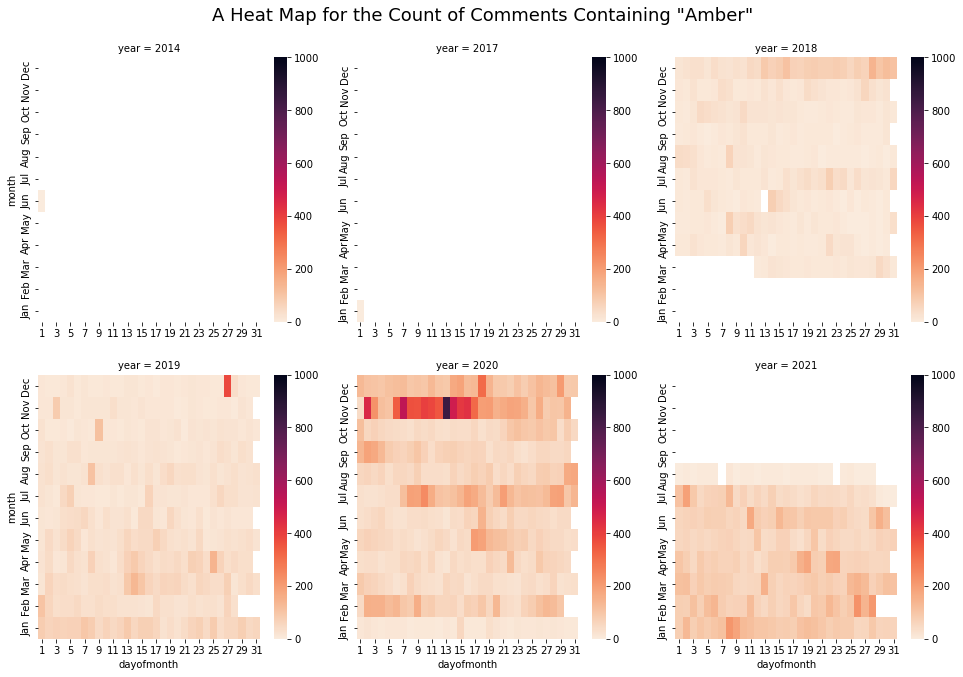

In [1180]:
amber = df_comments[df_comments["message"].str.contains("amber")]
daily_counts = amber.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print('\nNote: The peaks on Nov 2020, and on Dec 27 2019\n ')
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=3, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=1000);

plt.suptitle('A Heat Map for the Count of Comments Containing "Amber"', y=1.04, fontsize=18)
g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1181]:
len(amber)

64913

### Most Repeated Comments Containing "Amber"

In [1182]:
df = amber.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
6073,#suicidesquad #thewolfofwallstreet #scarlettjo...,1371,263.0,53.0
18907,amber,1206,808.0,32.0
2096,#ashleytisdale #suicidesquad #thewolfofwallstr...,560,2.0,0.0
8319,@amberheard,555,327.0,23.0
868,#amberheardisanabuser,432,1741.0,34.0
2090,#ashleytisdale #suicidesquad #thewolfofwallstr...,415,1.0,0.0
5705,#rockhound #stoneforsale #cabsforsale #jewelry...,404,0.0,0.0
3458,#galgadot #gal #kyliejenner #kyliecosmetics #g...,347,232.0,16.0
29470,fuck amber heard,291,762.0,68.0
18254,[#sabrinapetraglia #agathamoreira #deborasecco...,279,4.0,0.0


In [1183]:
amber.message.value_counts().head(10)

#suicidesquad #thewolfofwallstreet #scarlettjohansson #blackwidow #avengers #captainamericacivilwar #avengersinfinitywar #wanda #scarlettwitch #annehathaway #emilyvancamp #katewinslet#angelinajolie #emmawatson #emmastone #selenagomez #imogenpoots #amberheard #natalieportman #leightonmeester #charlizetheron #heathergraham #jessicaalba #keiranightley #rachelmcadams #scarlettjohansson #blackwidow #captainamericacivilwar #avengersinfinitywar #wanda #scarlettwitch #annehathaway #emilyvancamp #katewinslet #angelinajolie #emmawatson #emmastone #selenagomez #rachaeltaylor #amberheard #natalieportman #charlizetheron #heathergraham #jessicaalba #sashabarrese #keiranightley #rachelmcadams#ninadobrev                1371
amber                                                                                                                                                                                                                                                                                     

### Top Users with Comments Containing "Amber"

In [1184]:
# The total number of different users with Comments Containing "Amber"
amber.username.nunique()

29475

In [1185]:
amber_count = amber.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

amber_count.head(25)


,username,n_comments,n_likes,n_replies
600,_actor_movie,1570,295.0,53.0
3657,ashleytisdale6_,1390,3.0,0.0
8700,edwincuvillier,554,679.0,54.0
26006,sweet_and_caring_,491,369.0,29.0
24888,siachidesign,436,40.0,31.0
21766,petersimp15,359,385.0,78.0
26259,tayabnacer,351,85.0,3.0
4307,beauty.gifted,348,45.0,4.0
5873,cemerondiaz,347,232.0,16.0
22679,razaopetraglia,337,5.0,0.0


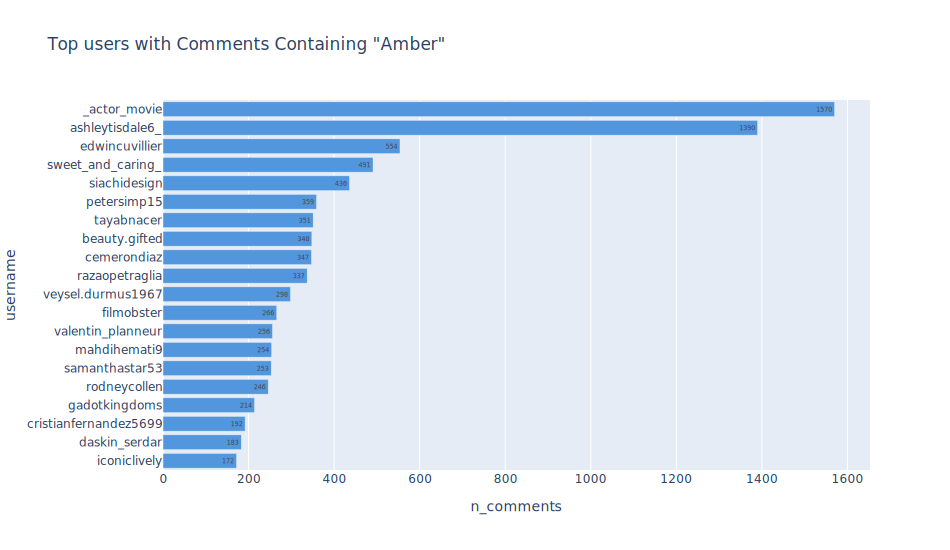

In [1186]:
barh(
    amber_count[['username', 'n_comments']].head(20), 'Top users with Comments Containing  "Amber"'
)

### "Amber" Users Contributions on Each Date

In [1187]:
df = amber.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
11149,2019-08-08,ashleytisdale6_,98,0.0,0.0
42022,2021-03-13,reach_dream.id,96,0.0,0.0
12054,2019-10-09,ashleytisdale6_,80,0.0,0.0
28375,2020-11-02,queenmusicvidoe,70,14.0,0.0
12414,2019-11-03,ashleytisdale6_,64,1.0,0.0
35282,2020-12-11,kingskippy1987,55,14.0,0.0
23710,2020-07-31,amberheardabottleofwineopen,51,3.0,0.0
44603,2021-04-23,charmviktoria,50,50.0,1.0
26785,2020-10-01,ashleytisdale6_,49,0.0,0.0
13612,2020-01-15,ashleytisdale6_,47,0.0,0.0


### "Amber" Date Peaks

In [1188]:
df = amber.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
978,2020-11-13,843,15137.0,591.0
972,2020-11-07,531,7875.0,289.0
979,2020-11-14,490,5716.0,95.0
967,2020-11-02,455,1493.0,81.0
981,2020-11-16,431,4383.0,162.0
980,2020-11-15,415,8135.0,157.0
975,2020-11-10,399,1808.0,59.0
976,2020-11-11,384,4257.0,76.0
656,2019-12-27,382,534.0,9.0
973,2020-11-08,364,1901.0,117.0


In [1189]:
amber_top = get_top(amber, 'message', 50, 'comment', 'n_repeated')

In [1190]:
def get_amber_text(row):
    """
    A function to get texts related to amber.
    Args:
        - row -->  row of column in df.
    Returns:
        - neat --> list of texts related to amber
    """
    row = row.lower()
    result = list(set(re.findall(r"#?[a-z\s]*amber[a-z\s]*", row)))
    neat = []
    for i in result:
        neat.append(i.strip())
    return neat

In [1191]:
amber_top.comment.apply(lambda x: get_amber_text(x))

0                         [#amberheard]
1                               [amber]
2                         [#amberheard]
3                          [amberheard]
4               [#amberheardisanabuser]
5                         [#amberheard]
6                         [#amberheard]
7                         [#amberheard]
8                    [fuck amber heard]
9                         [#amberheard]
10                [support amber heard]
11                        [#amberheard]
12                        [amber heard]
13                    [#fuckamberheard]
14                        [#amberheard]
15                 [suport amber heard]
16                        [#amberheard]
17                         [#amberturd]
18    [#amberheardisaliar, #amberheard]
19                        [#amberheard]
20                        [#amberheard]
21                         [amber turd]
22                        [#amberheard]
23                        [#amberheard]
24                        [#amberheard]


In [1192]:
top_texts = [list(x)[0] for x in set(tuple(x) for x in amber_top.comment.apply(lambda x: get_amber_text(x)).values)]
top_texts

['fuck amber',
 'amber',
 '#amberheardisaliar',
 'amber heard',
 '#amberheardisaliar',
 '#fireamberheard',
 '#ambertheabuser',
 'fuck amber heard',
 '#amberheard',
 '#amberheardisanabuser',
 'support amber heard',
 'suport amber heard',
 '#amberturd',
 '#boycottamberheard',
 'amber turd',
 '#fuckamberheard',
 'amberheard']

<a id='neg'></a>
>>### Negative Comments
>>(Turd - F*ck, Liar, Fire)
><ul>
 <li><a href="#neg"><b>Negative Comments</b></a></li>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [1193]:
negative = [' turd', 'liar', 'abuse', 'abusing', 'fireamberheardfromaquaman', 'fireamberheard', 
            'fire her', 'fired', 'fire amber', 'remove amber', 'removeamber', 'remove-amber', 'removed', 
            'fuck amber heard', 'fuck amber', '#fuckamberheard', 'fuck u @amberheard', 'fuck you @amberheard', 
            '@amberheard fuck you', 'fuckamber', 'fuck @amberheard', 'fuck  amber', 'fuck you amber', 'fuck her',
            'fuck that bitch', 'fuck this bitch', 'fucking bitch', 'fucking abuser', 'fuck herself', 'fuck off',
            'fuckamberheard', 'fucking bullshit'] 

### A Heat Map for the Count of Negative Comments
(Turd - F*ck, Liar, Fire)


Note: The Peaks Also on Nov 2020



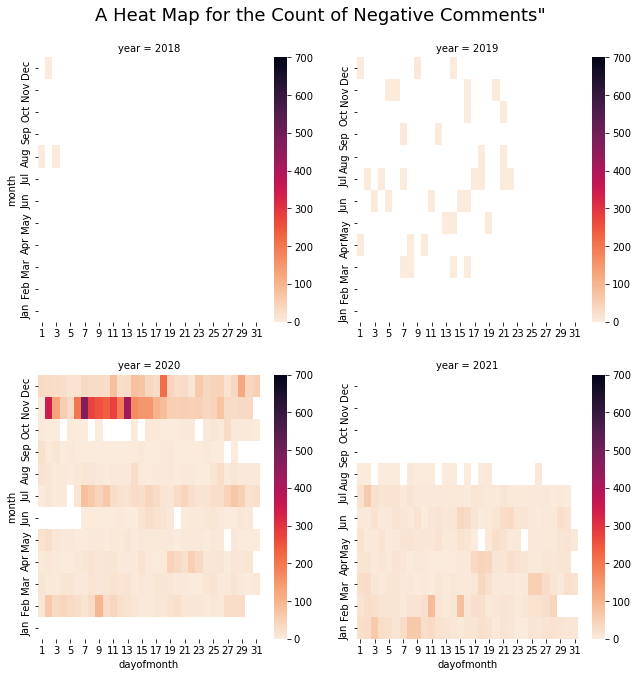

In [1194]:
df_negative = df_comments[df_comments["message"].str.contains('|'.join(negative))]
daily_counts = df_justice.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print('\nNote: The Peaks Also on Nov 2020\n')
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=2, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=700);

plt.suptitle('A Heat Map for the Count of Negative Comments"', y=1.04, fontsize=18)
g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1195]:
len(df_negative)

23776

### Most Repeated Negative Comments 

In [1196]:
df = df_negative.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
157,#amberheardisanabuser,432,1741.0,34.0
8730,abuser,346,794.0,21.0
10963,fuck amber heard,291,762.0,68.0
11230,fuck her,185,122.0,14.0
458,#fuckamberheard,165,272.0,7.0
4748,@johnnydepp #wearewithyoujohnnydepp #amberhear...,124,23.0,0.0
8616,[#maleficent #super8 #gingerandrosa #weboughta...,117,13.0,0.0
9455,amber turd,116,402.0,21.0
10939,fuck amber,105,158.0,3.0
419,#fireamberheard,94,191.0,1.0


In [1197]:
df_negative.message.value_counts().head(10)

#amberheardisanabuser                                                                                                                                                                                                                                                                                                                                                                               432
abuser                                                                                                                                                                                                                                                                                                                                                                                              346
fuck amber heard                                                                                                                                                                                                        

### Top Users with Negative Comments

In [1198]:
# The total number of different users posted justiceforjohnnydepp
df_negative.username.nunique()

14393

In [1199]:
df_nnegative = df_negative.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nnegative.head(25)


,username,n_comments,n_likes,n_replies
11473,samanthastar53,133,234.0,18.0
10419,pauu.eg,115,257.0,2.0
7544,kingskippy1987,99,148.0,17.0
404,_dope_black_unicorn_,80,159.0,5.0
8483,mackenzilaplante,76,115.0,19.0
4788,feelselle,71,13.0,0.0
10757,queenmusicvidoe,70,14.0,0.0
8473,machelyyyyy,66,694.0,13.0
2131,becauseitsjohnnydepp,65,559.0,9.0
7149,justiceforheard,57,24.0,2.0


In [1200]:
neg_users = neg_users|set(df_nnegative.username.unique())

In [1201]:
# newly_created = {'moonbeam429', 'mathxy._01', 'netos.k', 'justicie.for.johnny.depp', 'machelyyyyy',
#                  'queenmusicvideo', 'divulgaaa.bahia', 'wewantjusticeforjohnnydepp'}

# colors = []
# for user in df_njustice['username'].head(20):
#     if user in newly_created:
#         colors.append('red')
#     else: 
#         colors.append('#5296dd')

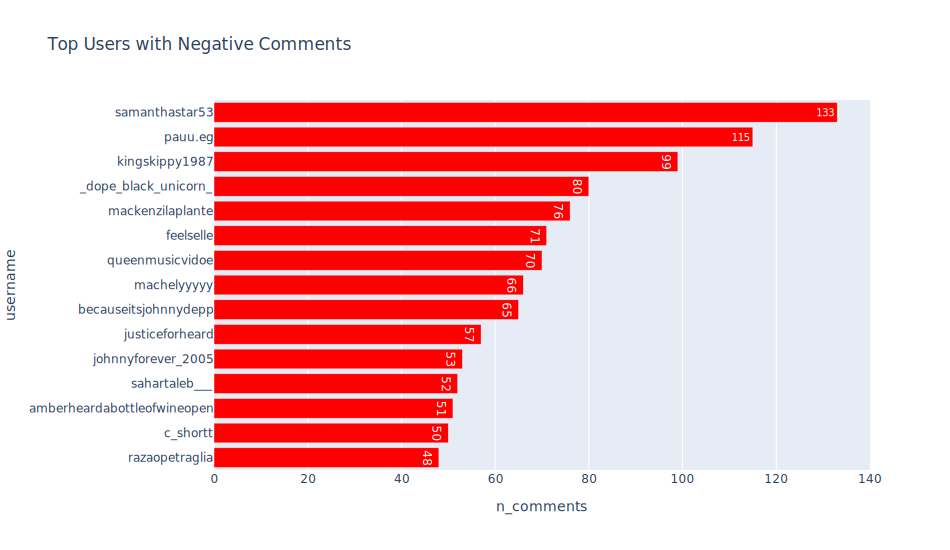

In [1202]:
# print('\nnewly created (after 2018) accounts are colored in "red"')
barh(
    df_nnegative[['username', 'n_comments']].head(15), 'Top Users with Negative Comments', 40
)

###  Users Negative Contributions on Each Date

In [1203]:
df = df_negative.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
8582,2020-11-02,queenmusicvidoe,70,14.0,0.0
13155,2020-12-11,kingskippy1987,55,14.0,0.0
6933,2020-07-31,amberheardabottleofwineopen,51,3.0,0.0
8581,2020-11-02,queenmusicvideo,41,0.0,0.0
8511,2020-11-02,babikate6,33,11.0,0.0
9919,2020-11-11,c_shortt,32,106.0,3.0
15331,2021-02-11,zhra.006,32,3.0,0.0
15327,2021-02-11,sahartaleb___,31,19.0,1.0
4376,2020-04-22,pauu.eg,28,19.0,0.0
4311,2020-04-19,pauu.eg,27,72.0,0.0


In [1204]:
neg_users = neg_users|set(df_nnegative.head(10).username)

### Negative Comments Peak Dates

In [1205]:
negative_dates = df_negative.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

negative_dates.head(15)


,date,n_comments,n_likes,n_replies
770,2020-11-13,790,19830.0,196.0
771,2020-11-14,396,3388.0,80.0
759,2020-11-02,351,1682.0,59.0
766,2020-11-09,333,1677.0,57.0
768,2020-11-11,319,4619.0,53.0
767,2020-11-10,299,1812.0,97.0
772,2020-11-15,294,4742.0,81.0
764,2020-11-07,294,8261.0,222.0
769,2020-11-12,280,3576.0,46.0
765,2020-11-08,259,3185.0,107.0


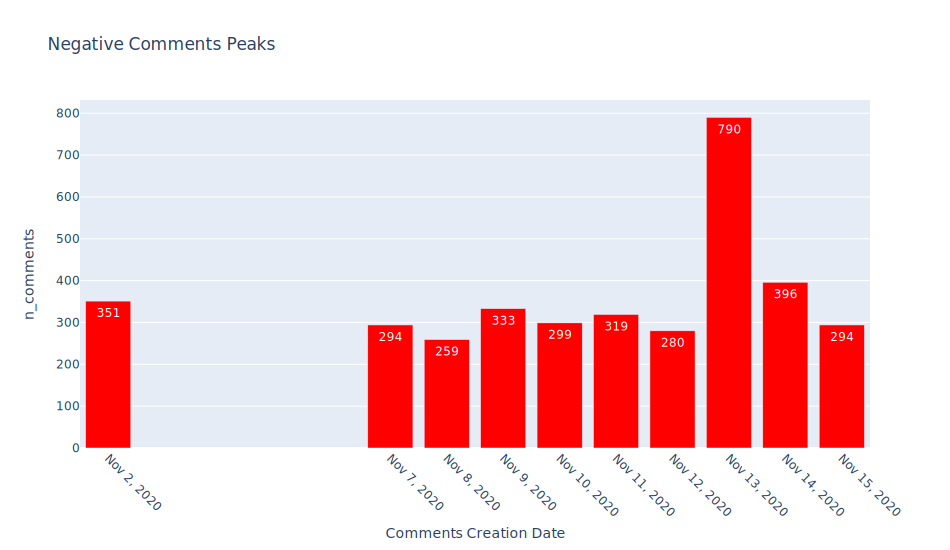

In [1206]:
bar_peaks(negative_dates[['date', 'n_comments']].head(10), 'Negative Comments Peaks')

<a id='turd'></a>
>>###  Amber Heard Turd
><ul>
 <li><a href="#neg">Negative Comments</a></li>
 <li><a href="#turd"><b>Amber Turd</b></a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [1207]:
turd = [i for i in top_texts if 'turd' in i]
turd.append(' turd')
turd

['#amberturd', 'amber turd', ' turd']

In [1208]:
# For chedking more than one keyword
# df_turd = amber[amber.message.str.contains("|".join(turd))]
"|".join(turd)

'#amberturd|amber turd| turd'

In [1209]:
# Check for the text containing "turd" and not containing "Amber"
print('\nNote: Almost only "saturday" is a misleading result\n')

df_turd = df_comments[df_comments.message.str.contains('turd')]
df_turd[~df_turd.message.str.contains('amber')]['message'].head(30)


Note: Almost only "saturday" is a misleading result



8337                happy saturday 🌹🌹 and sweet 😍 weekend 🙌
20366                                     ambitch turd face
22599                            turd, eat your faeces💩💩💩💩💩
24788                                turd belongs in prison
26874     that dress in number 1 would look a lot better...
27971     i had some pretending to n u yesturday asking ...
31902                    i thought her last name was turd🤔?
32217                                            angry turd
39144     @hichtwo actually, they were defending johnny ...
39694     @recesses_of_my_soul he was mass reported by s...
40552           🤣🤣🤣🤣🤣anyway turd is a crime scene happened😳
45263     wow beautiful back and face side have a great ...
48065                  next up #saturday #morning #cartoons
54874     @turdalievabaia ой ой ой, можно подумать прям ...
60334                        you captured a turd perfectly.
65431     @elai.ne21 he plotted with aturd to use a knif...
67604        @becool.honeybunny nutty as

In [1210]:
# Exclude "Saturday" From the DataFrame or use space before turd
df_turd = df_comments[df_comments.message.str.contains('turd')]
df_turd = df_turd[~df_turd.message.str.contains('saturday')]
df_turd.shape

(1788, 16)

### A Heat Map for the Count of Comments Containing "Amber Turd" 

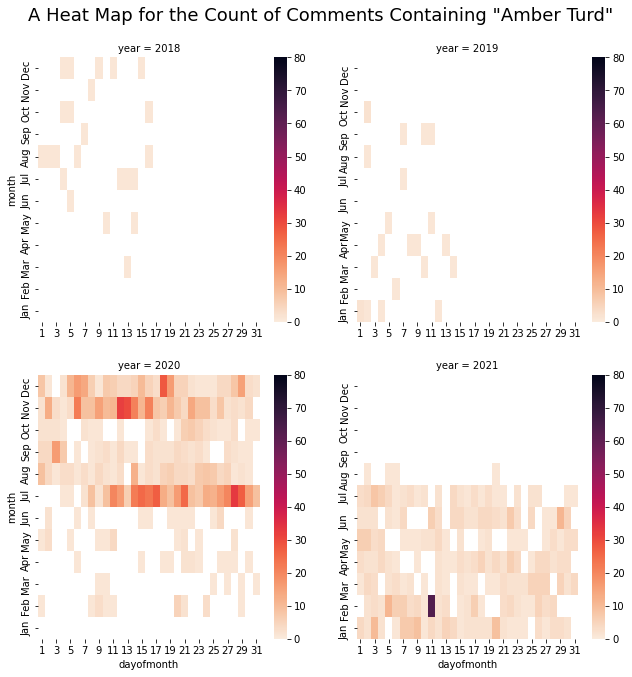

In [1211]:
daily_counts = df_turd.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=2, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=80);

plt.suptitle('A Heat Map for the Count of Comments Containing "Amber Turd"', y=1.04, fontsize=18)
g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1212]:
len(df_turd)

1788

### Most Repeated Comments Containing "Amber Turd"

In [1213]:
df = df_turd.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
27,#amberturd,125,534.0,5.0
493,amber turd,116,402.0,21.0
1273,،#justiceforjohnnydepp #amberheardisanabuser ...,32,3.0,0.0
556,amber turd 💩,27,86.0,3.0
105,#justiceforjohnnydepp #amberheardisanabuser ...,26,15.0,1.0
1145,turd,21,20.0,0.0
52,#amberturd 💩,11,10.0,0.0
1188,we support you @johnnydepp \n#fuckamberheard @...,10,29.0,0.0
98,#johnnydeppisanangel #johnnydeppisinnocent #ju...,10,81.0,2.0
744,fuck amber turd,9,8.0,0.0


### Top Users Commented "Amber Turd"

In [1214]:
# The total number of different users with Comments Containing "Amber"
df_turd.username.nunique()

1074

In [1215]:
print('\n"pabloziegl" Got a total of 1074 likes on only 6 comments\n')
df_nturd = df_turd.groupby(['username']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'n_comments'}).sort_values('n_comments', ascending=False)

df_nturd.head(25)


"pabloziegl" Got a total of 1074 likes on only 6 comments



,username,n_comments,n_likes,n_replies
855,sahartaleb___,39,33.0,2.0
1069,zhra.006,36,9.0,2.0
403,hani._cockatiel,35,79.0,3.0
858,samanthastar53,31,47.0,3.0
522,johnnydepp_gothic,26,109.0,2.0
196,c_shortt,18,48.0,2.0
729,natchayaleejin,15,29.0,0.0
323,dylanfrost1995,15,51.0,1.0
707,monsoonglasgow,15,59.0,4.0
339,engajamento800,11,89.0,0.0


In [1216]:
neg_users = neg_users|set(df_nturd.username)

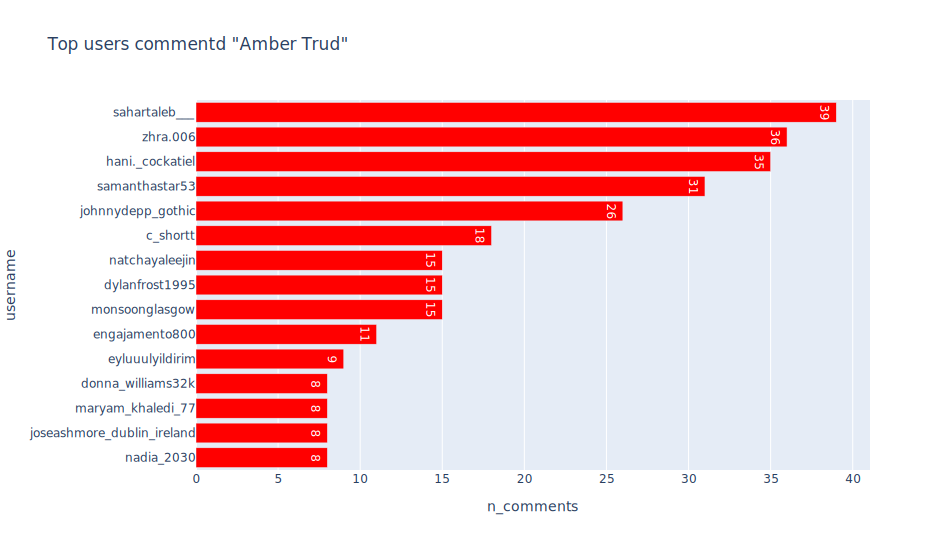

In [1217]:
barh(df_nturd[['username', 'n_comments']].head(15), 'Top users commentd "Amber Trud"', 5)

### "Amber Turd" Users Contributions on Each Date

In [1218]:
df = df_turd.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
1149,2021-02-11,zhra.006,32,3.0,0.0
1147,2021-02-11,sahartaleb___,30,18.0,1.0
712,2020-11-12,c_shortt,18,48.0,2.0
663,2020-11-06,nadia_2030,8,19.0,1.0
788,2020-11-16,hani._cockatiel,8,5.0,0.0
230,2020-07-17,dontshowmyfacecauseidotherace,7,7.0,0.0
831,2020-11-22,hani._cockatiel,6,10.0,0.0
168,2020-07-14,darknesspreys,6,20.0,0.0
421,2020-07-30,odetchiwa,5,71.0,0.0
687,2020-11-09,johnnydepp_gothic,5,0.0,0.0


### "Amber Turd" Peak Dates

In [1219]:
df = df_turd.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
291,2021-02-11,63,23.0,1.0
114,2020-07-28,33,2516.0,13.0
205,2020-11-12,32,148.0,2.0
206,2020-11-13,30,198.0,3.0
240,2020-12-18,28,152.0,0.0
115,2020-07-29,27,79.0,2.0
103,2020-07-17,27,1066.0,21.0
107,2020-07-21,25,146.0,5.0
101,2020-07-15,25,3255.0,3.0
102,2020-07-16,23,65.0,2.0


In [1220]:
df_turd['datetime'].max()

Timestamp('2021-08-20 05:08:41')

In [1221]:
df_turd['datetime'].min()

Timestamp('2018-03-25 09:26:58')

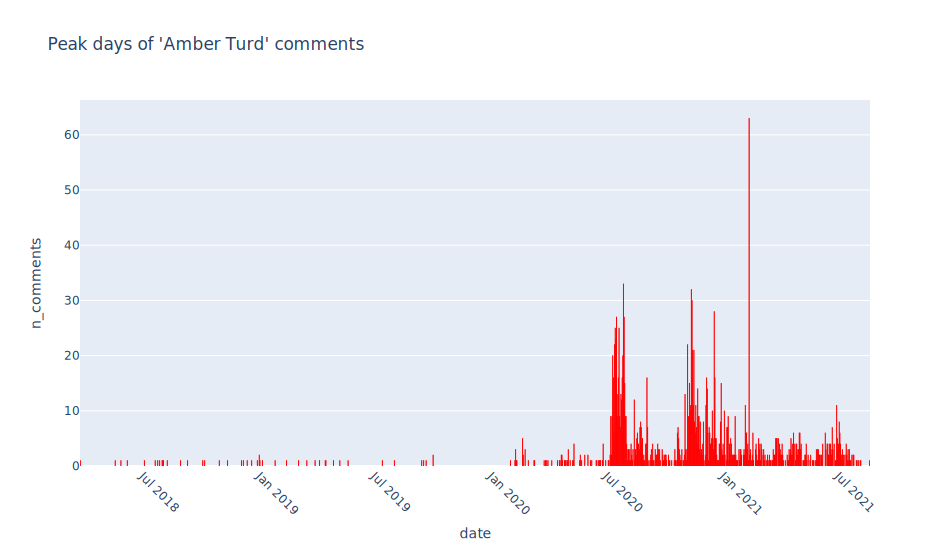

In [1222]:
fig = (
    px.bar(
        get_top(df_turd, "date", df_turd.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title = "Peak days of 'Amber Turd' comments"
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show('svg')

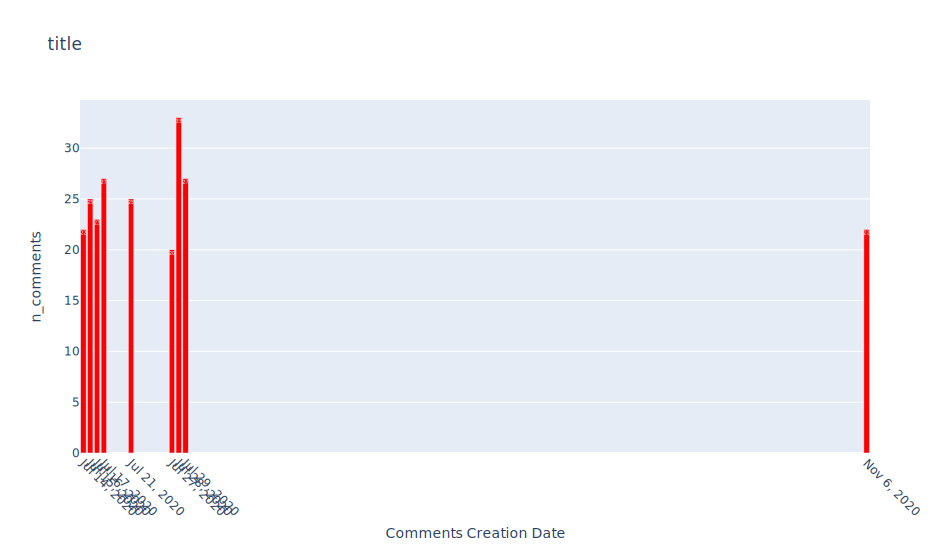

In [1223]:
bar_peaks(
    get_top(df_turd, "date", 15, "date", "n_comments").sort_values("date").head(9),
    "title",
)

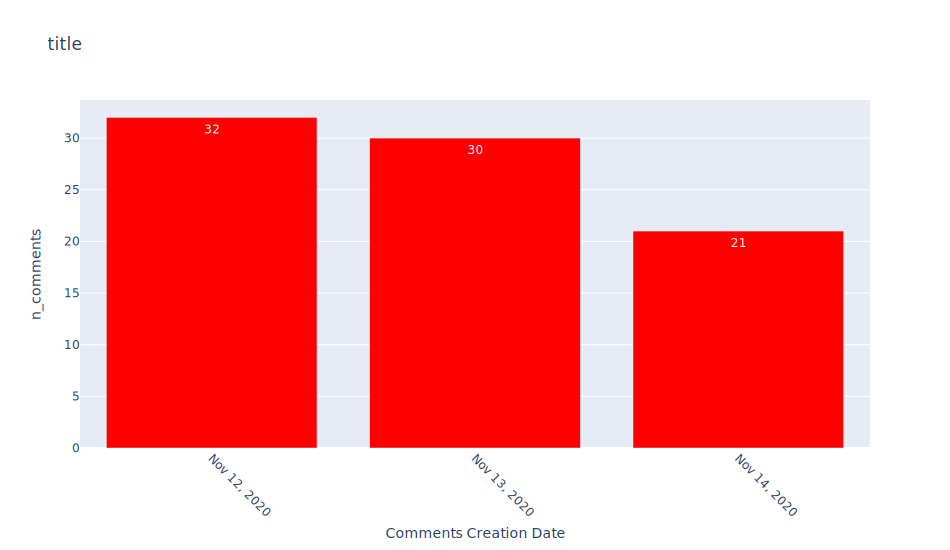

In [1224]:
bar_peaks(
    get_top(df_turd, "date", 15, "date", "n_comments").sort_values("date").iloc[9:12],
    "title",
)

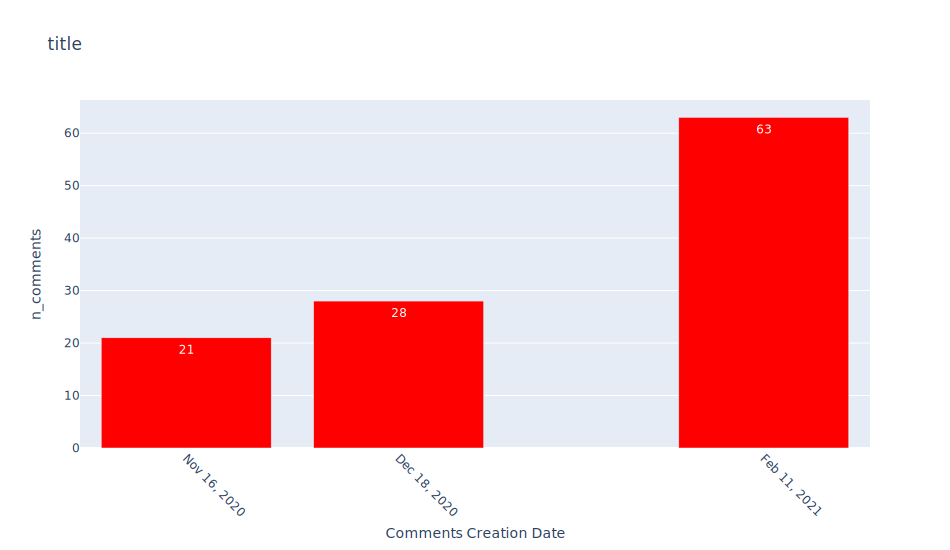

In [1225]:
bar_peaks(
    get_top(df_turd, "date", 15, "date", "n_comments").sort_values("date").tail(3),
    "title",
)

#### Time difference

In [1226]:
df_turd.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:07    18
0 days 00:00:05     9
0 days 00:00:08     9
0 days 00:00:12     8
0 days 00:00:11     7
0 days 00:00:06     7
0 days 00:00:10     7
0 days 00:00:04     6
0 days 00:00:35     5
0 days 00:00:15     5
0 days 00:00:19     5
0 days 00:00:22     5
0 days 00:00:13     4
0 days 00:00:36     4
0 days 00:00:51     3
Name: datetime, dtype: int64

### pabloziegl
<font color='red'>Got a total of 1074 likes on 6 comments</font>
- first posted on JANUARY 15, 2014
- 88 posts
- 159 followers
- 693 following

In [1227]:
df_turd.query("username == 'pabloziegl'").message.value_counts()

fμck amber turd 🤮 #justiceforjohnnydepp                                                                                                                                                               1
@cinder_luna amber turd* 🤮 #justiceforjohnnydepp                                                                                                                                                      1
@getthatknowledge i didn't watch the first one because of this cμnt. fμck amber turd                                                                                                                  1
@nerd_rumble i'm boycotting every and each movie from warner bros. fück them and fück amber turd 🤬 #justiceforjohnnydepp                                                                              1
@shawth over the büllsh¡t about amber turd, that fück¡ng liar 🤬 #justiceforjohnnydepp                                                                                                                 1


we can see most comments were done within seconds!

#### sahartaleb___

In [1228]:
df_turd.query(' username == "sahartaleb___"').date.value_counts()

2021-02-11    30
2020-12-15     2
2020-12-12     2
2021-07-06     1
2021-04-22     1
2020-12-14     1
2020-12-01     1
2021-02-21     1
Name: date, dtype: int64

In [1229]:
df_turd.query(' username == "sahartaleb___"').datetime.sort_values().diff().sort_values()

645212     0 days 00:00:08
448928     0 days 00:00:08
1016839    0 days 00:00:08
596729     0 days 00:00:09
714036     0 days 00:00:10
1488297    0 days 00:00:10
1429350    0 days 00:00:10
1681881    0 days 00:00:10
653724     0 days 00:00:10
890286     0 days 00:00:11
117282     0 days 00:00:11
223439     0 days 00:00:12
311500     0 days 00:00:12
35003      0 days 00:00:13
1595554    0 days 00:00:13
1546049    0 days 00:00:13
457917     0 days 00:00:14
1639957    0 days 00:00:14
1695600    0 days 00:00:15
135429     0 days 00:00:15
1623453    0 days 00:00:18
762530     0 days 00:00:18
1245449    0 days 00:00:26
908149     0 days 00:00:31
1109418    0 days 00:00:33
1595555    0 days 00:00:38
693823     0 days 00:00:47
1283505    0 days 00:00:53
535471     0 days 00:01:09
1216071    0 days 03:40:50
1223435    0 days 10:04:54
1669428    0 days 23:48:18
1424637    1 days 14:23:41
1639959    9 days 21:03:36
1492271   10 days 03:00:46
1089278   58 days 14:51:46
1275917   59 days 23:43:46
7

In [1230]:
df_turd.query(' username == "sahartaleb___"').n_likes.value_counts(), df_turd.query(
    ' username == "sahartaleb___"'
).n_replies.value_counts()

(1.0    18
 0.0    17
 2.0     2
 6.0     1
 5.0     1
 Name: n_likes, dtype: int64,
 0.0    34
 1.0     2
 Name: n_replies, dtype: int64)

#### zhra.006

In [1231]:
df_turd.query(' username == "zhra.006"').date.value_counts()

2021-02-11    32
2021-03-12     2
2021-03-03     1
2021-02-21     1
Name: date, dtype: int64

In [1232]:
df_turd.query(' username == "zhra.006"').datetime.sort_values().diff().sort_values()

679720    0 days 00:00:04
1429351   0 days 00:00:04
908150    0 days 00:00:04
658408    0 days 00:00:04
1458450   0 days 00:00:05
1189341   0 days 00:00:05
1639958   0 days 00:00:05
135430    0 days 00:00:05
1346161   0 days 00:00:05
364346    0 days 00:00:06
1623454   0 days 00:00:06
1103151   0 days 00:00:06
319768    0 days 00:00:06
448931    0 days 00:00:07
645213    0 days 00:00:07
1283506   0 days 00:00:07
1275153   0 days 00:00:07
745636    0 days 00:00:07
951800    0 days 00:00:07
1058530   0 days 00:00:07
596730    0 days 00:00:07
311501    0 days 00:00:07
1198632   0 days 00:00:07
381534    0 days 00:00:07
746113    0 days 00:00:07
1595556   0 days 00:00:07
693824    0 days 00:00:07
117283    0 days 00:00:08
1089280   0 days 00:00:10
1546050   0 days 00:00:11
1488298   0 days 00:00:24
1655907   0 days 02:13:23
1215602   9 days 00:46:32
531082    9 days 16:56:30
1553725   9 days 23:54:40
1695601               NaT
Name: datetime, dtype: timedelta64[ns]

In [1233]:
df_turd.query(' username == "zhra.006"').n_likes.value_counts(), df_turd.query(
    ' username == "zhra.006"'
).n_replies.value_counts()

(0.0    31
 1.0     4
 5.0     1
 Name: n_likes, dtype: int64,
 0.0    35
 2.0     1
 Name: n_replies, dtype: int64)

#### hani._cockatiel 35

In [1234]:
df_turd.query(' username == "hani._cockatiel"').date.value_counts()

2020-11-16    8
2020-11-22    6
2020-11-26    4
2020-11-19    4
2020-11-14    2
2020-11-17    2
2020-12-06    2
2021-01-06    1
2020-12-18    1
2021-04-17    1
2020-11-23    1
2021-01-03    1
2020-11-15    1
2020-11-18    1
Name: date, dtype: int64

In [1235]:
df_turd.query(' username == "hani._cockatiel"').datetime.sort_values().diff().sort_values()

236307      0 days 00:00:19
481565      0 days 00:00:21
1061159     0 days 00:00:24
1663150     0 days 00:00:35
1124204     0 days 00:00:35
1386279     0 days 00:00:36
221353      0 days 00:00:44
1038072     0 days 00:01:12
30459       0 days 00:01:20
636187      0 days 00:01:24
1274237     0 days 00:01:36
908016      0 days 00:01:55
541120      0 days 00:03:01
133354      0 days 00:03:28
1044356     0 days 00:06:37
1415258     0 days 00:09:11
985597      0 days 00:09:30
987205      0 days 00:14:31
869376      0 days 01:20:54
1347254     0 days 08:36:56
816247      0 days 08:40:58
1470168     0 days 10:58:35
1493986     0 days 18:29:03
1053487     0 days 21:32:13
1404994     0 days 23:32:46
1515736     0 days 23:59:54
1024880     1 days 01:51:23
222804      2 days 09:17:43
908061      3 days 00:02:55
482860      3 days 06:14:12
1628349    10 days 03:58:37
502968     11 days 13:06:24
982528     16 days 12:24:48
590010    101 days 04:53:59
371699                  NaT
Name: datetime, dtyp

In [1236]:
df_turd.query(' username == "hani._cockatiel"').n_likes.value_counts(), df_turd.query(
    ' username == "hani._cockatiel"'
).n_replies.value_counts()

(0.0     14
 1.0     11
 3.0      4
 2.0      3
 4.0      1
 37.0     1
 9.0      1
 Name: n_likes, dtype: int64,
 0.0    31
 1.0     3
 Name: n_replies, dtype: int64)

#### johnnydepp_gothic

In [1237]:
df_turd.query(' username == "johnnydepp_gothic"').date.value_counts()

2020-11-09    5
2021-02-17    4
2020-12-29    3
2020-12-18    2
2021-01-12    2
2020-07-23    1
2020-12-28    1
2020-11-10    1
2020-08-14    1
2020-12-01    1
2020-11-08    1
2021-02-06    1
2020-11-02    1
2021-01-20    1
2020-10-28    1
Name: date, dtype: int64

In [1238]:
df_turd.query(' username == "johnnydepp_gothic"').datetime.sort_values().diff().sort_values()

801015     0 days 00:00:04
353131     0 days 00:00:05
1608741    0 days 00:00:07
385220     0 days 00:00:10
1243824    0 days 00:00:11
1740391    0 days 00:00:16
302480     0 days 00:00:21
1610472    0 days 00:00:51
1544631    0 days 00:01:52
1544458    0 days 01:20:17
502672     0 days 01:49:04
1544500    0 days 18:43:11
503583     0 days 22:43:39
656813     1 days 00:25:43
1615787    5 days 12:25:41
1360933    5 days 22:37:46
1663227    8 days 00:59:24
623234    10 days 03:45:28
1253774   10 days 21:09:47
926458    13 days 22:14:18
502833    17 days 01:10:53
1361828   17 days 01:44:59
1314855   20 days 16:33:06
778824    22 days 07:47:30
1722759   74 days 21:43:31
261673                 NaT
Name: datetime, dtype: timedelta64[ns]

In [1239]:
df_turd.query(' username == "johnnydepp_gothic"').n_likes.value_counts(), df_turd.query(
    ' username == "johnnydepp_gothic"'
).n_replies.value_counts()

(0.0     8
 2.0     4
 1.0     4
 8.0     2
 5.0     2
 13.0    1
 10.0    1
 4.0     1
 24.0    1
 17.0    1
 3.0     1
 Name: n_likes, dtype: int64,
 0.0    23
 1.0     2
 Name: n_replies, dtype: int64)

**Amber Heard Turd**
- Top Users:
    - sahartaleb___ 	37
        -  0 posts
        - 42 followers
        - 37 following
        - created around 15 December 2020.
        - 30 comments contain amber turd in 11 feb 2021
        - time difference of comments is only seconds!
        - most comments has no likes or replies.
    - zhra.006 	36
        - user not found
        - 32 comments contain amber turd in 11 feb 2021
        - time difference of comments is only seconds!
        - most comments has no likes or replies.
    - hani._cockatiel 	35
        -  0 posts
        - 60 followers
        - 98 following
        - created around 15 February 2020
        - most comments has no likes or replies.
    - johnnydepp_gothic 	26
        -    131 posts
        - 2,176 followers
        - 336 following
        - created around 15 January 2020
        - has variety of number of replies and likes on his comments.
    - ...
- Top Dates:
    - 2021-02-11 	63
    - 2020-11-12 	31
    - 2020-07-28 	26
    - 2020-12-18 	24
    - ...


<a id='fuck'></a>
>>###  F*ck Amber Heard
><ul>
 <li><a href="#neg">Negative Comments</a></li>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck"><b>Fuck Amber Heard</b></a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [1240]:
fuc = [i for i in top_texts if 'fuck' in i]
fuc

['fuck amber', 'fuck amber heard', '#fuckamberheard']

In [1241]:
fuc = ['fuck amber heard', 'fuck amber', '#fuckamberheard', 'fuck u @amberheard', 'fuck you @amberheard', 
       '@amberheard fuck you', 'fuckamber', 'fuck @amberheard', 'fuck  amber', 'fuck you amber', 'fuck her', 
       'fuck that bitch', 'fuck this bitch', 'fucking bitch', 'fucking abuser', 'fuck herself', 
       'fuck off', 'fuckamberheard', 'fucking bullshit']

In [1242]:
neg_text = neg_text|set(fuc)

In [1243]:
# Get the most repeated text containing "Amber" and "F*ck"
df_fuc1 = df_comments[df_comments.message.str.contains('fuck')]
df_fuc1 = df_fuc1[df_fuc1.message.str.contains('amber')]
df_fuc1.message.value_counts().head(20)

fuck amber heard                                                                                                                                                                                                                            291
#fuckamberheard                                                                                                                                                                                                                             165
@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                                                                                                    124
fuck amber                                                                                                                                                                                                                                  105
fuck amber heard #justiceforjohnnydepp  

In [1244]:
# Get the most repeated text containing "F*ck", but don't contain "Amber" 
df_fuc1 = df_comments[df_comments.message.str.contains('fuck')]
df_fuc1 = df_fuc1[~df_fuc1.message.str.contains('amber')]
df_fuc1.message.value_counts().head(60)

fuck her                                                                               185
🖕🖕🖕🖕 fuck you and your bullshit copy/paste tags                                         85
fuck                                                                                    80
fuck no                                                                                 75
fuck that bitch                                                                         74
fuck you                                                                                63
fuck this bitch                                                                         60
fuck off                                                                                47
what the fuck                                                                           39
fucking bitch                                                                           36
#fuckthesun                                                                             24

In [1245]:
# df_fuc1 = df_comments[df_comments.message.str.contains('fuck')]
# df_fuc1.shape

In [1246]:
# df_fuc1 = amber[amber.message.str.contains('fuck')]
# df_fuc1.shape

In [1247]:
df_fuc1 = df_comments[df_comments.message.str.contains("|".join(fuc))]
df_fuc1.shape

(3488, 16)

### Most Repeated Comments Containing "F*ck Amber"

In [1248]:
df = df_fuc1.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
706,fuck amber heard,291,762.0,68.0
970,fuck her,185,122.0,14.0
22,#fuckamberheard,165,272.0,7.0
682,fuck amber,105,158.0,3.0
1190,fuck that bitch,74,69.0,19.0
712,fuck amber heard #justiceforjohnnydepp,62,121.0,5.0
1243,fuck this bitch,60,45.0,2.0
1121,fuck off,47,14.0,6.0
800,fuck amber heard! #justiceforjohnnydepp,40,74.0,16.0
1374,fucking bitch,36,0.0,1.0


In [1249]:
df_fuc1.message.value_counts().head(10)

fuck amber heard                           291
fuck her                                   185
#fuckamberheard                            165
fuck amber                                 105
fuck that bitch                             74
fuck amber heard #justiceforjohnnydepp      62
fuck this bitch                             60
fuck off                                    47
fuck amber heard! #justiceforjohnnydepp     40
fucking bitch                               36
Name: message, dtype: int64

### A Heat Map for the Count of Comments Containing "F*ck Amber

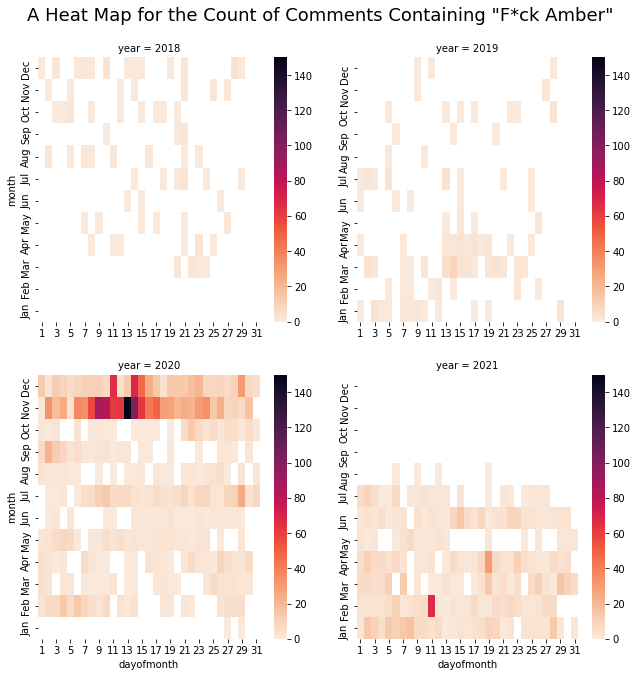

In [1250]:
daily_counts = df_fuc1.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=2, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=150);

plt.suptitle('A Heat Map for the Count of Comments Containing "F*ck Amber"', y=1.04, fontsize=18)
g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1251]:
len(df_fuc1)

3488

### Top Users Posted "F*ck Amber Heard"

In [1252]:
# The total number of different users with Comments Containing "Amber"
df_fuc1.username.nunique()

2750

In [1253]:
df_nfuck1 = df_fuc1.groupby(['username']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'n_comments'}).sort_values('n_comments', ascending=False)

df_nfuck1.head(25)

,username,n_comments,n_likes,n_replies
1475,kingskippy1987,99,148.0,17.0
1128,hosein.sarsam,43,78.0,5.0
2202,sahartaleb___,37,35.0,1.0
2738,zhra.006,35,4.0,0.0
1872,ngnrzi,22,22.0,0.0
533,c_shortt,20,50.0,2.0
1359,johnnydepp_gothic,19,88.0,2.0
2364,staffordcarlis1,15,0.0,0.0
707,dana__milash,14,10.0,0.0
402,ballikaya_defne_7,11,20.0,0.0


In [1254]:
neg_users = neg_users|set(df_nfuck1.username)

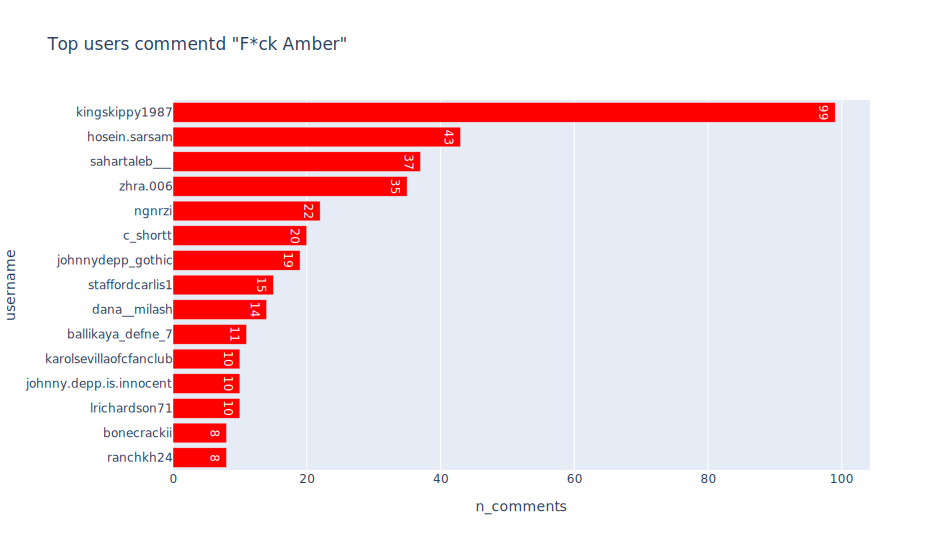

In [1255]:
barh(get_top(df_fuc1, 'username', 15, 'username', 'n_comments'), 'Top users commentd "F*ck Amber"', 5)

### "F*ck Amber" Users Contributions on Each Date

In [1256]:
df = df_fuc1.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
2044,2020-12-11,kingskippy1987,55,14.0,0.0
2550,2021-02-11,zhra.006,32,3.0,0.0
2548,2021-02-11,sahartaleb___,30,18.0,1.0
1132,2020-11-09,ngnrzi,22,22.0,0.0
1289,2020-11-12,c_shortt,18,48.0,2.0
961,2020-11-04,dana__milash,14,10.0,0.0
2488,2021-01-28,ballikaya_defne_7,10,20.0,0.0
2937,2021-06-15,karolsevillaofcfanclub,10,12.0,2.0
2697,2021-03-29,hosein.sarsam,10,76.0,4.0
2637,2021-03-07,hosein.sarsam,9,0.0,0.0


### "F*ck Amber" Peak Dates

In [1257]:
df = df_fuc1.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
369,2020-11-13,157,1516.0,7.0
370,2020-11-14,101,464.0,0.0
365,2020-11-09,88,49.0,0.0
366,2020-11-10,82,71.0,17.0
400,2020-12-14,69,989.0,3.0
457,2021-02-11,67,26.0,1.0
397,2020-12-11,66,15.0,0.0
368,2020-11-12,63,71.0,3.0
371,2020-11-15,63,62.0,4.0
367,2020-11-11,62,88.0,2.0


In [1258]:
df_fuc1['datetime'].max()

Timestamp('2021-08-19 12:05:33')

In [1259]:
df_fuc1['datetime'].min()

Timestamp('2018-03-22 01:19:23')

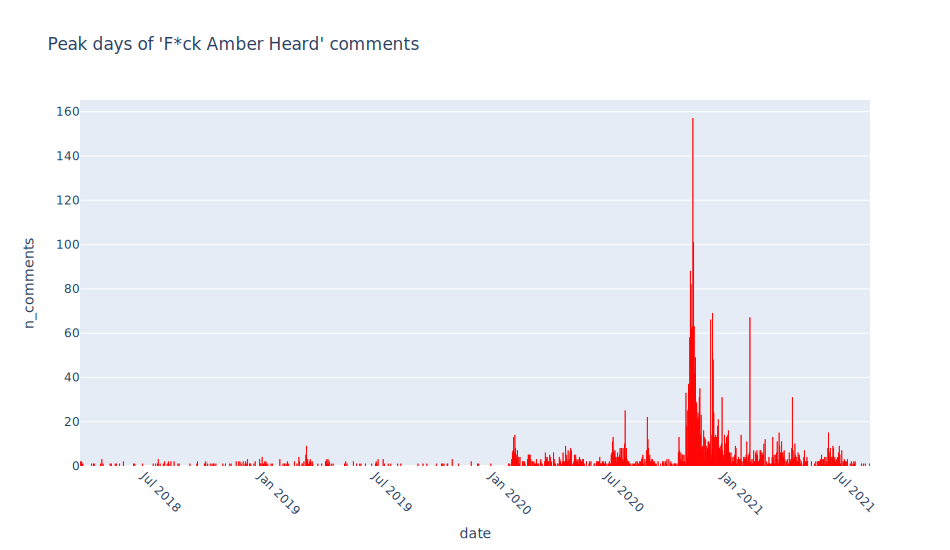

In [1260]:
fig = (
    px.bar(
        get_top(df_fuc1, "date", df_fuc1.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title="Peak days of 'F*ck Amber Heard' comments",
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show("svg")

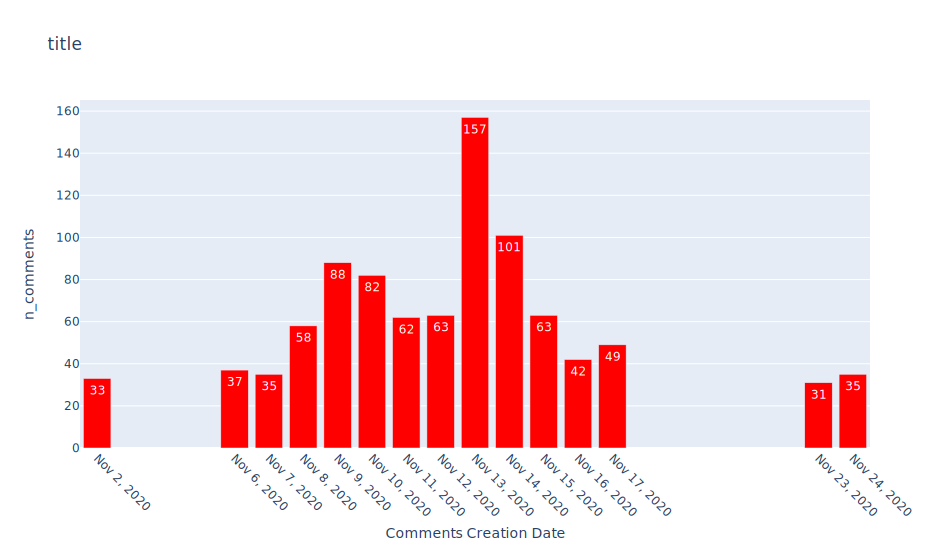

In [1261]:
bar_peaks(
    get_top(df_fuc1, "date", 20, "date", "n_comments").sort_values("date").head(15),
    "title",
)

#### Time difference

In [1262]:
df_fuc1.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:07    28
0 days 00:00:08    25
0 days 00:00:01    19
0 days 00:00:10    19
0 days 00:00:09    18
0 days 00:00:05    17
0 days 00:00:02    17
0 days 00:00:04    15
0 days 00:00:06    12
0 days 00:00:11    11
0 days 00:00:12    11
0 days 00:00:13    11
0 days 00:00:03     9
0 days 00:00:15     9
0 days 00:00:26     8
Name: datetime, dtype: int64

In [1263]:
get_top(df_fuc1, 'username', 15, 'username', 'n_comments').iloc[:8].username.values

array(['kingskippy1987', 'hosein.sarsam', 'sahartaleb___', 'zhra.006',
       'ngnrzi', 'c_shortt', 'johnnydepp_gothic', 'staffordcarlis1'],
      dtype=object)

#### kingskippy1987

In [1264]:
df_fuc1.query('username == "kingskippy1987"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)


datetime       
0 days 00:00:08    11
0 days 00:00:09    10
0 days 00:00:10     7
0 days 00:00:07     6
0 days 00:00:26     3
0 days 00:00:16     2
0 days 00:00:24     2
0 days 00:00:12     2
0 days 00:00:11     2
0 days 01:52:54     1
0 days 01:00:23     1
1 days 00:26:39     1
0 days 04:10:34     1
0 days 04:42:52     1
0 days 04:42:54     1
0 days 06:07:34     1
0 days 06:38:11     1
0 days 12:50:36     1
0 days 17:22:33     1
0 days 18:27:10     1
dtype: int64

In [1265]:
df_fuc1.query('username == "kingskippy1987"').n_likes.value_counts(), df_fuc1.query(
    ' username == "kingskippy1987"'
).n_replies.value_counts()

(0.0     67
 1.0     10
 2.0      7
 3.0      7
 4.0      3
 13.0     2
 10.0     1
 43.0     1
 12.0     1
 Name: n_likes, dtype: int64,
 0.0    89
 1.0     2
 4.0     1
 3.0     1
 2.0     1
 6.0     1
 Name: n_replies, dtype: int64)

In [1266]:
df_fuc1.query('username == "kingskippy1987"').date.value_counts()

2020-12-11    55
2020-12-13     6
2021-01-08     5
2020-12-16     4
2020-12-21     3
2020-12-14     3
2020-12-15     3
2020-12-20     3
2020-12-12     2
2020-12-28     2
2020-12-17     2
2020-11-10     2
2020-12-07     2
2020-12-03     2
2020-11-09     1
2020-12-26     1
2020-12-01     1
2020-12-24     1
2021-01-06     1
Name: date, dtype: int64

#### sahartaleb___

In [1267]:
df_fuc1.query('username == "sahartaleb___"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)


datetime        
0 days 00:00:10     5
0 days 00:00:08     3
0 days 00:00:13     3
0 days 00:00:11     2
0 days 00:00:12     2
0 days 00:00:14     2
0 days 00:00:15     2
0 days 00:00:18     2
0 days 00:01:09     1
58 days 14:51:46    1
13 days 03:19:38    1
5 days 21:01:58     1
5 days 16:21:33     1
4 days 04:42:03     1
0 days 03:40:50     1
0 days 00:00:33     1
0 days 00:00:53     1
0 days 00:00:47     1
0 days 00:00:38     1
0 days 00:00:09     1
dtype: int64

In [1268]:
df_fuc1.query('username == "sahartaleb___"').n_likes.value_counts(), df_fuc1.query(
    ' username == "sahartaleb___"'
).n_replies.value_counts()

(1.0     17
 0.0     16
 2.0      2
 11.0     1
 3.0      1
 Name: n_likes, dtype: int64,
 0.0    33
 1.0     1
 Name: n_replies, dtype: int64)

In [1269]:
df_fuc1.query('username == "sahartaleb___"').date.value_counts()

2021-02-11    30
2020-12-15     2
2021-02-27     1
2021-07-06     1
2021-02-17     1
2020-12-01     1
2021-02-21     1
Name: date, dtype: int64

#### zhra.006

In [1270]:
df_fuc1.query('username == "zhra.006"').datetime.sort_values().diff().sort_values()

679720    0 days 00:00:04
1429351   0 days 00:00:04
908150    0 days 00:00:04
658408    0 days 00:00:04
1458450   0 days 00:00:05
1189341   0 days 00:00:05
1639958   0 days 00:00:05
135430    0 days 00:00:05
1346161   0 days 00:00:05
364346    0 days 00:00:06
1623454   0 days 00:00:06
1103151   0 days 00:00:06
319768    0 days 00:00:06
448931    0 days 00:00:07
645213    0 days 00:00:07
1283506   0 days 00:00:07
1275153   0 days 00:00:07
745636    0 days 00:00:07
951800    0 days 00:00:07
1058530   0 days 00:00:07
596730    0 days 00:00:07
311501    0 days 00:00:07
1198632   0 days 00:00:07
381534    0 days 00:00:07
746113    0 days 00:00:07
693824    0 days 00:00:07
1595556   0 days 00:00:07
117283    0 days 00:00:08
1089280   0 days 00:00:10
1546050   0 days 00:00:11
1488298   0 days 00:00:24
1655907   9 days 02:59:55
531082    9 days 16:56:30
1553725   9 days 23:54:40
1695601               NaT
Name: datetime, dtype: timedelta64[ns]

In [1271]:
df_fuc1.query('username == "zhra.006"').n_likes.value_counts(), df_fuc1.query(
    ' username == "zhra.006"'
).n_replies.value_counts()

(0.0    31
 1.0     4
 Name: n_likes, dtype: int64,
 0.0    35
 Name: n_replies, dtype: int64)

In [1272]:
df_fuc1.query('username == "zhra.006"').date.value_counts()

2021-02-11    32
2021-03-03     1
2021-02-21     1
2021-03-12     1
Name: date, dtype: int64

#### ngnrzi

In [1273]:
df_fuc1.query('username == "ngnrzi"').datetime.sort_values().diff().sort_values()

314318   0 days 00:00:01
314320   0 days 00:00:01
314314   0 days 00:00:02
314316   0 days 00:00:02
314317   0 days 00:00:02
314319   0 days 00:00:02
314321   0 days 00:00:02
314331   0 days 00:00:02
314333   0 days 00:00:02
314325   0 days 00:00:03
314327   0 days 00:00:04
314330   0 days 00:00:04
314332   0 days 00:00:04
314323   0 days 00:00:04
314329   0 days 00:00:05
314328   0 days 00:00:05
314322   0 days 00:00:05
314334   0 days 00:00:07
314326   0 days 00:00:17
314315   0 days 00:00:18
314324   0 days 00:00:29
314313               NaT
Name: datetime, dtype: timedelta64[ns]

In [1274]:
df_fuc1.query('username == "ngnrzi"').n_likes.value_counts(), df_fuc1.query(
    ' username == "zhra.006"'
).n_replies.value_counts()

(1.0    22
 Name: n_likes, dtype: int64,
 0.0    35
 Name: n_replies, dtype: int64)

In [1275]:
df_fuc1.query('username == "ngnrzi"').date.value_counts()

2020-11-09    22
Name: date, dtype: int64

#### c_shortt

In [1276]:
df_fuc1.query('username == "c_shortt"').datetime.sort_values().diff().sort_values()

837863    0 days 00:00:04
424219    0 days 00:00:05
204289    0 days 00:00:05
1223660   0 days 00:00:06
837861    0 days 00:00:08
366749    0 days 00:00:08
1037198   0 days 00:00:08
1084150   0 days 00:00:08
366746    0 days 00:00:11
155509    0 days 00:00:13
554433    0 days 00:00:15
1225504   0 days 00:00:19
837864    0 days 00:00:19
203507    0 days 00:00:36
663617    0 days 00:00:54
871784    0 days 00:02:05
837859    0 days 00:26:41
1310789   0 days 01:12:57
663615    0 days 13:25:22
102981                NaT
Name: datetime, dtype: timedelta64[ns]

In [1277]:
df_fuc1.query('username == "c_shortt"').n_likes.value_counts(), df_fuc1.query(
    ' username == "c_shortt"'
).n_replies.value_counts()

(1.0     7
 0.0     4
 3.0     3
 5.0     2
 4.0     2
 2.0     1
 14.0    1
 Name: n_likes, dtype: int64,
 0.0    14
 1.0     2
 Name: n_replies, dtype: int64)

In [1278]:
df_fuc1.query('username == "c_shortt"').date.value_counts()

2020-11-12    18
2020-11-11     2
Name: date, dtype: int64

#### johnnydepp_gothic

In [1279]:
df_fuc1.query('username == "johnnydepp_gothic"').datetime.sort_values().diff().sort_values()

801015     0 days 00:00:04
353131     0 days 00:00:05
1608741    0 days 00:00:07
385220     0 days 00:00:10
1243824    0 days 00:00:11
1740391    0 days 00:00:16
302480     0 days 00:00:21
1544631    0 days 00:00:55
1544458    0 days 01:20:17
1544507    0 days 18:44:08
503583     0 days 22:43:39
656813     1 days 00:25:43
1663227    8 days 01:00:15
1253774   10 days 21:09:47
926458    13 days 22:14:18
1361828   17 days 01:44:59
1314855   20 days 16:33:06
623234    27 days 06:45:25
1360933                NaT
Name: datetime, dtype: timedelta64[ns]

In [1280]:
df_fuc1.query('username == "johnnydepp_gothic"').n_likes.value_counts(), df_fuc1.query(
    ' username == "johnnydepp_gothic"'
).n_replies.value_counts()

(0.0     8
 1.0     2
 2.0     2
 5.0     2
 13.0    1
 10.0    1
 24.0    1
 8.0     1
 17.0    1
 Name: n_likes, dtype: int64,
 0.0    16
 1.0     2
 Name: n_replies, dtype: int64)

In [1281]:
df_fuc1.query('username == "johnnydepp_gothic"').date.value_counts()

2020-11-09    5
2021-02-17    4
2020-12-29    3
2020-12-28    1
2020-11-10    1
2021-01-12    1
2020-12-01    1
2020-11-08    1
2021-02-06    1
2021-01-20    1
Name: date, dtype: int64

#### johnny.depp.is.innocent

In [1282]:
df_fuc1.query('username == "johnny.depp.is.innocent"').datetime.sort_values().diff().sort_values()

926413      0 days 00:00:01
1643074     0 days 00:00:54
1410212     0 days 00:01:06
535473      0 days 00:01:42
922724      0 days 00:02:08
961273      0 days 00:04:20
234298      1 days 00:53:43
926412     68 days 00:56:39
1120475   108 days 23:49:45
1200539                 NaT
Name: datetime, dtype: timedelta64[ns]

In [1283]:
df_fuc1.query('username == "johnny.depp.is.innocent"').n_likes.value_counts(), df_fuc1.query(
    ' username == "johnny.depp.is.innocent"'
).n_replies.value_counts()

(1.0    5
 0.0    3
 3.0    1
 2.0    1
 Name: n_likes, dtype: int64,
 0.0    9
 Name: n_replies, dtype: int64)

In [1284]:
df_fuc1.query('username == "johnny.depp.is.innocent"').date.value_counts()

2021-05-08    5
2021-01-19    3
2020-11-11    1
2020-11-10    1
Name: date, dtype: int64

**F*ck Amber Heard**
- Top Users:
    - kingskippy1987 	99
        - created around April 2019
        -     136 posts
        - 88 followers
        - 98 following
        - 55 comments in 2020-12-11.
        - most comments have 0 likes and 0 replies.
        - comments were made within seconds.
    - sahartaleb___ 	37
        - created around 15 December 2020
        -  0 posts
        - 42 followers
        - 37 following
        - most comments has one like, no replies.
        - 30 comments in 2021-02-11
    - zhra.006 	35
        - user not found
        - 32 comments contain amber turd in 11 feb 2021
        - time difference of comments is only seconds!
        - most comments has no likes or replies.
  
    - ngnrzi 	22
        - user not found.
        - all comments were made in the saame day 2020-11-09.
        - all comments has 1 like, 0 reply.
        - all comments within seconds.
        
    - c_shortt 	20
         - created around February 2017.
         -     681 posts
        - 3,006 followers
        - 2,265 following
        - private account.
        - comments were made in 2 days:
            - 2020-11-12    18
            - 2020-11-11     2
        - low number of likes 1 or 0.
        - most comments wihtin seconds.
    - johnnydepp_gothic 	19
        -    131 posts
        - 2,176 followers
        - 336 following
        - created around 15 January 2020
        - has variety of number of replies and likes on his comments but most of them are 0.
        - made comments in those dates:
            - 2020-11-09    5
            - 2021-02-17    4
            - 2020-12-29    3
    - johnny.depp.is.innocent 	10
        -     3 posts
        - 195 followers
        - 116 following
        - made  posts in those dates:
            - 2021-05-08    5
            - 2021-01-19    3
            - 2020-11-10    1
            - 2020-11-11    1
        - 0 likes on comments.
        - has some replies in his comments.
        - created around 15 December 2020.
    - ...
- Top Dates:
    - 2021-02-11 	66
    - 2020-11-09 	64
    - 2020-11-13 	64
    - 2020-12-11 	56
    - 2020-11-10 	50
    - 2020-11-12 	44
    - 2020-11-11 	43

<a id='liar'></a>
>>###  Amber Heard is a liar
><ul>
 <li><a href="#neg">Negative Comments</a></li>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar"><b>Amber Heard is a liar</b></a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [1285]:
liar = [i for i in top_texts if 'liar' in i]
liar

['#amberheardisaliar', '#amberheardisaliar']

In [1286]:
# Comments that contains liar but don't contain "Amber"
df_liar = df_comments[df_comments.message.str.contains('liar')]
df_liar[~df_liar.message.str.contains('amber')].message.value_counts().head(20)

liar                                                                                                                                                                                                                                                                                                                                                                                                      61
classic liar💩🤦🏻‍♀️👏🏽😂 justice for #johnnydepp                                                                                                                                                                                                                                                                                                                                                              6
she is a liar                                                                                                                                                                                                 

In [1287]:
df_liar.message.value_counts().head(10)

@johnnydepp #wearewithyoujohnnydepp #amberheardisaliar #justiceforjohnnydepp #wearewithyoujohnnydepp #johnnydepp #amberheard #fuckthesun                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 124
[#maleficent #super8 #gingerandrosa #weboughtazoo #maryshelley #theneondemon #galveston #thebeguiled #aboutray #ithinkwearealonenow #20thcenturywomen #howtotalktogirlsatparties #teenspirit #sidneyhall #allthebrightplaces #dakotafanning #angelinajolie #chloemoretz #nicolekidman #annehathaway #amberheard #lilycollins #lucyhale #lil

### A Heat Map for the Count of Comments Containing "Liar"

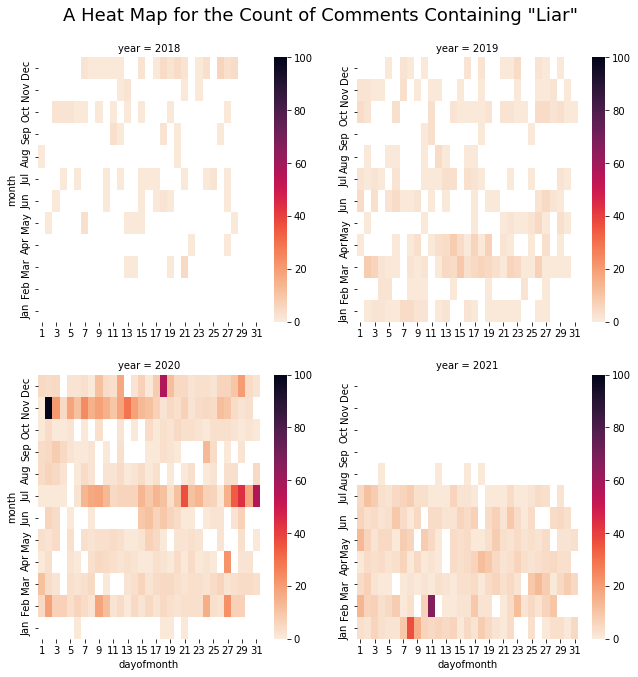

In [1288]:
daily_counts = df_liar.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=2, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=100);

plt.suptitle('A Heat Map for the Count of Comments Containing "Liar"', y=1.04, fontsize=18)
g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1289]:
len(df_liar)

3134

### Most Repeated Comments Containing "Liar"

In [1290]:
df = df_liar.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
616,@johnnydepp #wearewithyoujohnnydepp #amberhear...,124,23.0,0.0
943,[#maleficent #super8 #gingerandrosa #weboughta...,117,13.0,0.0
50,#amberheardisaliar,76,331.0,1.0
1509,liar,61,18.0,0.0
25,#amberheard #amberheardisanabuser #amberhearda...,51,3.0,0.0
1229,everyone who is a fan of amber heard please l...,44,76.0,63.0
91,#amberheardisanabuserandliar,42,112.0,3.0
2236,،#justiceforjohnnydepp #amberheardisanabuser ...,32,3.0,0.0
113,#amberisaliar,27,124.0,0.0
209,#justiceforjohnnydepp #amberheardisanabuser ...,26,15.0,1.0


### Top Users Commented with "Liar"

In [1291]:
# The total number of different users posted justiceforjohnnydepp
df_liar.username.nunique()

1786

In [1292]:
df_nliar = df_liar.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nliar.head(25)


,username,n_comments,n_likes,n_replies
603,feelselle,71,13.0,0.0
1392,queenmusicvidoe,70,14.0,0.0
165,amberheardabottleofwineopen,51,3.0,0.0
1413,razaopetraglia,48,0.0,0.0
1483,samanthastar53,46,78.0,7.0
884,johnnyforever_2005,43,79.0,63.0
1391,queenmusicvideo,41,0.0,0.0
1782,zhra.006,41,57.0,2.0
1725,wewantjusticeforjohnnydepp,37,7.0,0.0
1476,sahartaleb___,34,20.0,1.0


In [1293]:
neg_users = neg_users|set(df_nliar.username)

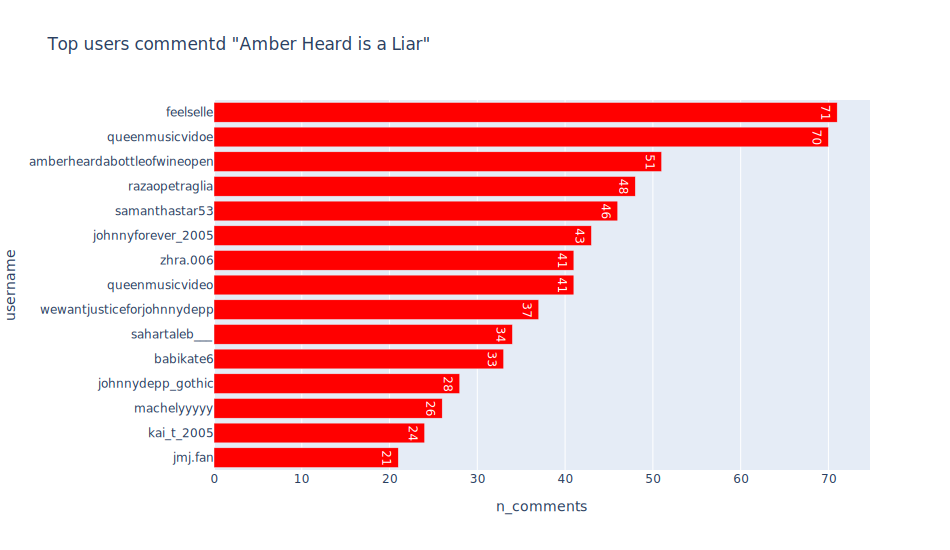

In [1294]:
barh(get_top(df_liar, 'username', 15, 'username', 'n_comments'), 'Top users commentd "Amber Heard is a Liar"', 20)

### "Amber Heard is a Liar" Users Contributions on Each Date

In [1295]:
df = df_liar.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
1287,2020-11-02,queenmusicvidoe,70,14.0,0.0
1107,2020-07-31,amberheardabottleofwineopen,51,3.0,0.0
1286,2020-11-02,queenmusicvideo,41,0.0,0.0
1274,2020-11-02,babikate6,33,11.0,0.0
1849,2021-02-11,zhra.006,32,3.0,0.0
1847,2021-02-11,sahartaleb___,30,18.0,1.0
674,2020-04-27,blancx_agender,19,18.0,1.0
1555,2020-12-12,johnnyforever_2005,16,30.0,58.0
537,2020-02-27,razaopetraglia,15,0.0,0.0
527,2020-02-24,razaopetraglia,15,0.0,0.0


### "Amber Heard is a Liar" Peak Dates

In [1296]:
df = df_liar.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
470,2020-11-02,229,61.0,12.0
565,2021-02-11,67,24.0,1.0
514,2020-12-18,57,197.0,0.0
401,2020-07-31,57,29.0,7.0
399,2020-07-29,44,60.0,1.0
391,2020-07-21,37,49.0,3.0
535,2021-01-08,37,126.0,6.0
398,2020-07-28,34,77.0,0.0
481,2020-11-13,29,34.0,4.0
475,2020-11-07,24,13.0,1.0


In [1297]:
df_liar['datetime'].max()

Timestamp('2021-08-18 23:13:18')

In [1298]:
df_liar['datetime'].min()

Timestamp('2018-03-14 02:55:42')

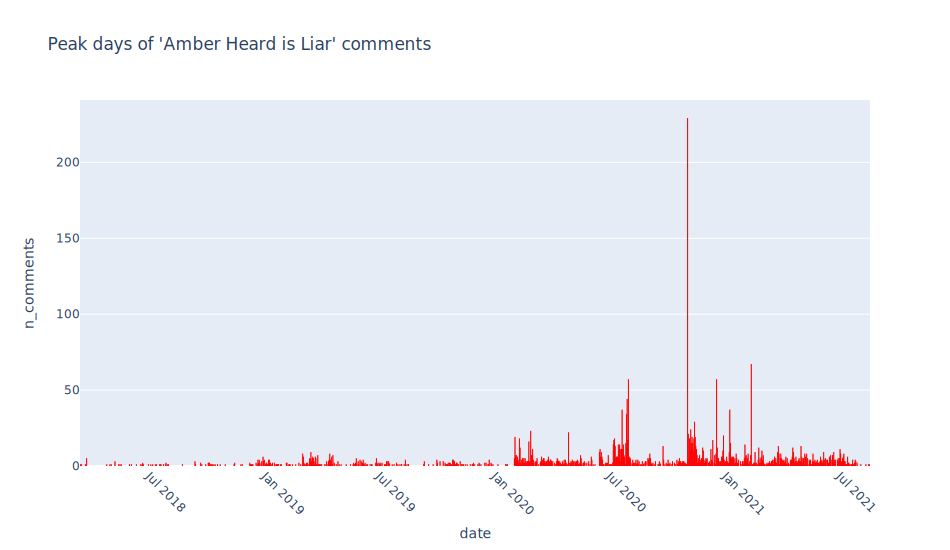

In [1299]:
fig = (
    px.bar(
        get_top(df_liar, "date", df_liar.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title="Peak days of 'Amber Heard is Liar' comments",
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show("svg")

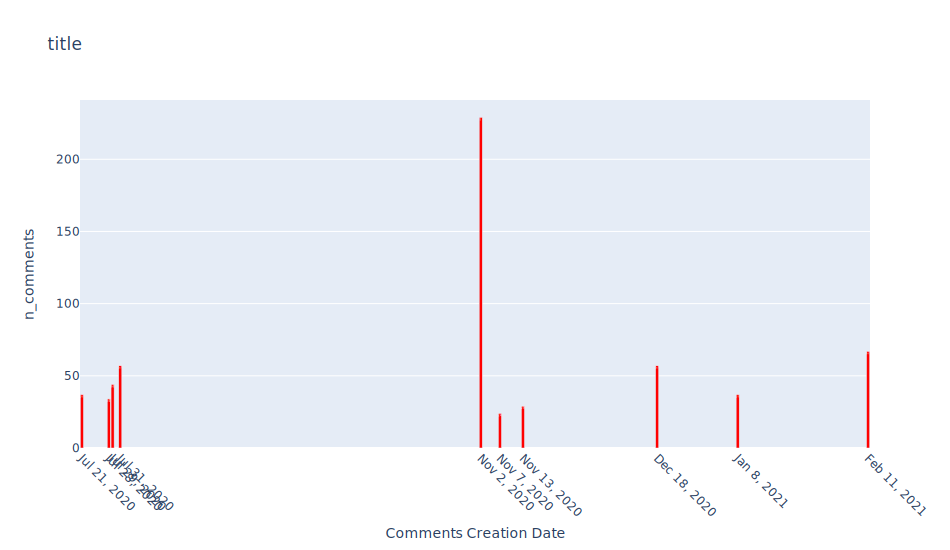

In [1300]:
bar_peaks(
    get_top(df_liar, "date", 10, "date", "n_comments").sort_values("date"),
    "title",
)

#### Time difference

In [1301]:
df_liar.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:04    52
0 days 00:00:03    47
0 days 00:00:05    44
0 days 00:00:02    42
0 days 00:00:08    31
0 days 00:00:07    30
0 days 00:00:06    29
0 days 00:00:10    20
0 days 00:00:13    16
0 days 00:00:01    16
0 days 00:00:12    11
0 days 00:00:11    10
0 days 00:00:09    10
0 days 00:00:14    10
0 days 00:00:17    10
Name: datetime, dtype: int64

In [1302]:
df_liar.username.value_counts().head(15)

feelselle                      71
queenmusicvidoe                70
amberheardabottleofwineopen    51
razaopetraglia                 48
samanthastar53                 46
johnnyforever_2005             43
zhra.006                       41
queenmusicvideo                41
wewantjusticeforjohnnydepp     37
sahartaleb___                  34
babikate6                      33
johnnydepp_gothic              28
machelyyyyy                    26
kai_t_2005                     24
jmj.fan                        21
Name: username, dtype: int64

#### queenmusicvidoe

In [1303]:
df_liar.query('username == "queenmusicvidoe"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:05    11
0 days 00:00:04    10
0 days 00:00:02     8
0 days 00:00:06     7
0 days 00:00:08     6
0 days 00:00:03     5
0 days 00:00:07     4
0 days 00:00:09     4
0 days 00:00:13     2
0 days 00:00:01     1
0 days 00:00:26     1
0 days 00:07:08     1
0 days 00:04:31     1
0 days 00:01:08     1
0 days 00:00:40     1
0 days 00:00:12     1
0 days 00:00:25     1
0 days 00:00:15     1
0 days 00:00:14     1
0 days 00:00:10     1
dtype: int64

In [1304]:
df_liar.query('username == "queenmusicvidoe"').n_likes.value_counts(), df_liar.query(
    ' username == "queenmusicvidoe"'
).n_replies.value_counts()

(0.0     65
 1.0      4
 10.0     1
 Name: n_likes, dtype: int64,
 0.0    70
 Name: n_replies, dtype: int64)

In [1305]:
df_liar.query('username == "queenmusicvidoe"').date.value_counts()

2020-11-02    70
Name: date, dtype: int64

#### johnnyforever_2005

In [1306]:
df_liar.query('username == "johnnyforever_2005"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime        
0 days 00:00:42     2
0 days 00:00:10     2
0 days 00:00:08     2
0 days 00:00:15     2
0 days 00:00:30     2
0 days 23:16:54     1
0 days 00:01:43     1
0 days 00:03:05     1
0 days 00:03:08     1
0 days 00:03:59     1
0 days 08:46:06     1
1 days 07:26:00     1
0 days 00:01:10     1
1 days 14:42:50     1
1 days 16:44:28     1
3 days 02:06:39     1
9 days 22:54:10     1
13 days 08:25:56    1
18 days 01:17:14    1
0 days 00:01:11     1
dtype: int64

In [1307]:
df_liar.query('username == "johnnyforever_2005"').n_likes.value_counts(), df_liar.query(
    ' username == "johnnyforever_2005"'
).n_replies.value_counts()

(0.0     24
 1.0      7
 2.0      5
 4.0      3
 3.0      2
 28.0     1
 16.0     1
 Name: n_likes, dtype: int64,
 0.0     35
 1.0      4
 2.0      1
 47.0     1
 10.0     1
 Name: n_replies, dtype: int64)

In [1308]:
df_liar.query('username == "johnnyforever_2005"').date.value_counts()

2020-12-12    16
2020-12-17     6
2021-01-18     5
2021-01-08     5
2020-12-20     4
2021-01-31     3
2021-04-16     1
2020-12-18     1
2020-12-15     1
2020-12-21     1
Name: date, dtype: int64

#### queenmusicvideo

In [1309]:
df_liar.query('username == "queenmusicvideo"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:03    9
0 days 00:00:02    8
0 days 00:00:05    5
0 days 00:00:04    3
0 days 00:00:06    2
0 days 00:00:31    1
0 days 00:38:00    1
0 days 00:29:27    1
0 days 00:11:31    1
0 days 00:00:50    1
0 days 00:00:37    1
0 days 00:00:18    1
0 days 00:00:20    1
0 days 00:00:17    1
0 days 00:00:13    1
0 days 00:00:12    1
0 days 00:00:10    1
0 days 00:48:49    1
dtype: int64

In [1310]:
df_liar.query('username == "queenmusicvideo"').n_likes.value_counts(), df_liar.query(
    ' username == "queenmusicvideo"'
).n_replies.value_counts()

(0.0    41
 Name: n_likes, dtype: int64,
 0.0    41
 Name: n_replies, dtype: int64)

In [1311]:
df_liar.query('username == "queenmusicvideo"').date.value_counts()

2020-11-02    41
Name: date, dtype: int64

**Amber Heard is Liar**
- Top Users:
    - queenmusicvidoe 	70
        -     0 posts
        - 4 followers
        - 403 following
        -  created around 15 April 2020.
        - all comments (70) were made at 2020-11-02.
        - most of the 0 likes, 0 replies.
    - johnnyforever_2005 	43
        -     233 posts
        - 976 followers
        - 439 following
        - comments were made in those dates:
            - 2020-12-12    16
            - 2020-12-17     6
            - 2021-01-08     5
            - 2021-01-18     5
            - ..
        - most comments were made in seconds.
        - most of the 0 likes, 0 replies.
    - queenmusicvideo 	41
        -     78 posts
        - 1,813 followers
        - 235 following
        - created around 15 August 2020
        - most comments were made in seconds.
        - all comments (41) were made in one day 2020-11-02.
        - all comments 0 replies,0 likes.
    - zhra.006 	39
        - suspeicious account, made all neagative comments related to amber.
    - sahartaleb___ 	33
        -  suspeicious account, made all neagative comments related to amber.
    - babikate6 	33
        -     0 posts
        - 5 followers
        - 21 following
        - created around 15 September 2020
    - johnnydepp_gothic 	28
        -  suspeicious account, made all neagative comments related to amber.
    - wewantjusticeforjohnnydepp 	26
        -     160 posts
        - 1,049 followers
        - 169 following
        - created around 15 December 2020
    - ...
- Top Dates:
    - 2020-11-02 	224
    - 2021-02-11 	62
    - 2020-12-18 	25
    - 2021-01-08 	17
    - 2020-12-12 	16
    - 2020-12-29 	11
    - ..

<a id='abuser'></a>
>>###  Amber Heard is a abuser
><ul>
 <li><a href="#neg">Negative Comments</a></li>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser"><b>Amber Heard is a abuser</b></a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [1312]:
abuser = [i for i in top_texts if 'abuse' in i]
abuser

['#ambertheabuser', '#amberheardisanabuser']

In [1313]:
abuser += ['abuse', 'abusing']

### A Heat Map for the Count of Comments Containing "abuser"

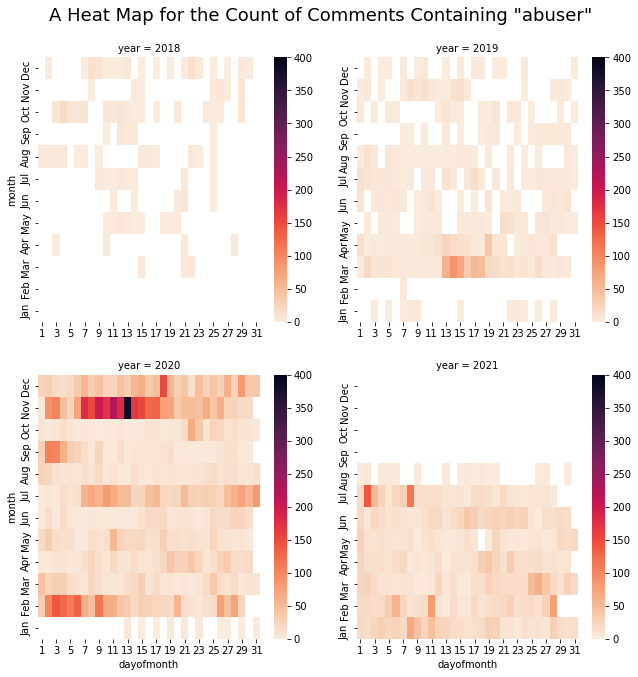

In [1314]:
df_abuser = df_comments[df_comments.message.str.contains('|'.join(abuser))]
daily_counts = df_abuser.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=2, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=400);

plt.suptitle('A Heat Map for the Count of Comments Containing "abuser"', y=1.04, fontsize=18)
g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1315]:
len(df_abuser)

14793

### Most Repeated Comments Containing "Abuser"

In [1316]:
df = df_abuser.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
112,#amberheardisanabuser,432,1741.0,34.0
6515,abuser,346,794.0,21.0
271,#ambertheabuser #justiceforjohnnydepp,93,201.0,2.0
468,#justiceforjohnnydepp #amberheardisanabuser,84,337.0,9.0
176,#amberheardisanabuser #justiceforjohnnydepp,75,232.0,15.0
54,#amberheard #amberheardisanabuser #amberhearda...,51,3.0,0.0
243,#amberheardistherealabuser,48,85.0,19.0
7723,everyone who is a fan of amber heard please l...,44,76.0,63.0
71,#amberheard #justiceforamberheard #johnnydepp ...,42,16.0,2.0
223,#amberheardisanabuserandliar,42,112.0,3.0


In [1317]:
df_abuser.message.value_counts().head(10)

#amberheardisanabuser                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    432
abuser                                                                                                                                                                                                                                                                                                                                     

### Top Users Commented with "Abuser"

In [1318]:
# The total number of different users posted justiceforjohnnydepp
df_abuser.username.nunique()

8827

In [1319]:
df_nabuser = df_abuser.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nabuser.head(25)


,username,n_comments,n_likes,n_replies
6378,pauu.eg,115,257.0,2.0
7021,samanthastar53,67,143.0,14.0
230,_dope_black_unicorn_,66,138.0,4.0
5179,mackenzilaplante,60,109.0,19.0
4336,justiceforheard,57,24.0,2.0
4180,johnnyforever_2005,53,79.0,63.0
1279,becauseitsjohnnydepp,51,546.0,7.0
804,amberheardabottleofwineopen,51,3.0,0.0
1610,c_shortt,50,154.0,5.0
6996,sahartaleb___,47,67.0,4.0


In [1320]:
neg_users = neg_users|set(df_nabuser.username)

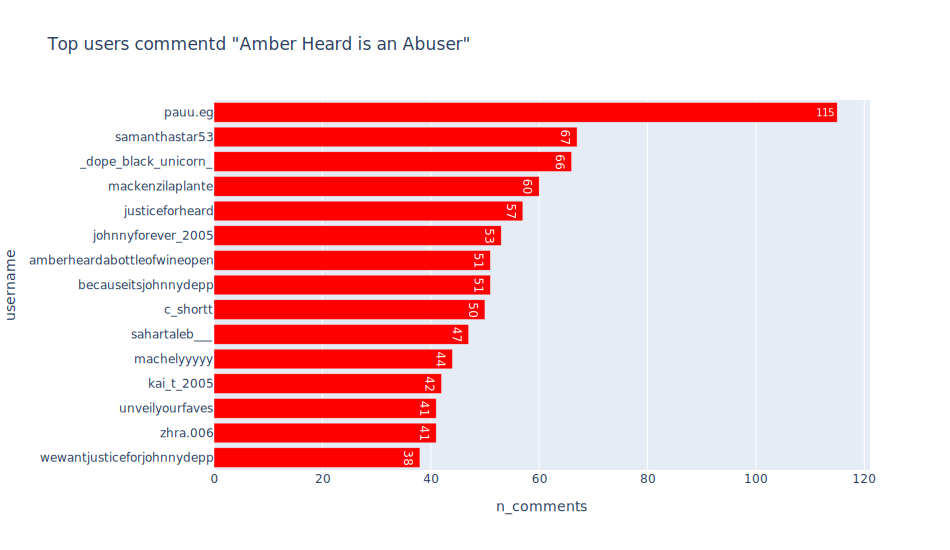

In [1321]:
barh(get_top(df_abuser, 'username', 15, 'username', 'n_comments'), 'Top users commentd "Amber Heard is an Abuser"', 30)


### "Amber Heard is an Abuser" Users Contributions on Each Date

In [1322]:
df = df_abuser.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
4633,2020-07-31,amberheardabottleofwineopen,51,3.0,0.0
6425,2020-11-11,c_shortt,32,106.0,3.0
9448,2021-02-11,zhra.006,32,3.0,0.0
9444,2021-02-11,sahartaleb___,31,19.0,1.0
3043,2020-04-22,pauu.eg,28,19.0,0.0
2995,2020-04-19,pauu.eg,27,72.0,0.0
3084,2020-04-27,blancx_agender,19,18.0,1.0
6564,2020-11-12,c_shortt,18,48.0,2.0
8137,2020-12-12,johnnyforever_2005,16,30.0,58.0
3048,2020-04-23,pauu.eg,15,56.0,1.0


### "Amber Heard is an Abuser"  Peak Dates

In [1323]:
df = df_abuser.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
605,2020-11-13,385,8118.0,112.0
603,2020-11-11,227,2588.0,51.0
601,2020-11-09,200,1494.0,35.0
604,2020-11-12,180,2999.0,38.0
599,2020-11-07,177,5054.0,156.0
602,2020-11-10,170,1553.0,59.0
606,2020-11-14,166,2704.0,74.0
607,2020-11-15,154,3384.0,69.0
640,2020-12-18,153,872.0,18.0
600,2020-11-08,152,2613.0,78.0


In [1324]:
df_abuser['datetime'].max()

Timestamp('2021-08-30 08:34:23')

In [1325]:
df_abuser['datetime'].min()

Timestamp('2018-03-16 02:48:25')

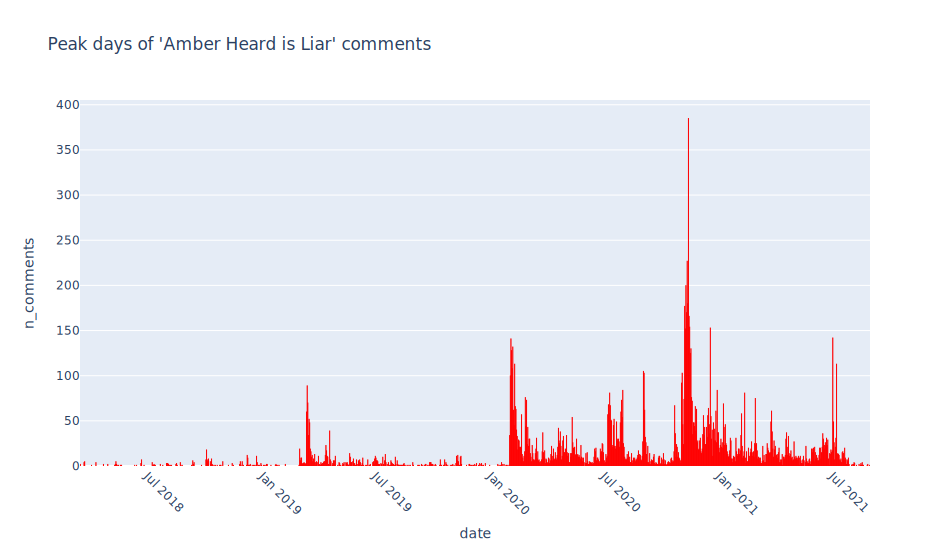

In [1326]:
fig = (
    px.bar(
        get_top(df_abuser, "date", df_abuser.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title="Peak days of 'Amber Heard is Liar' comments",
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show("svg")

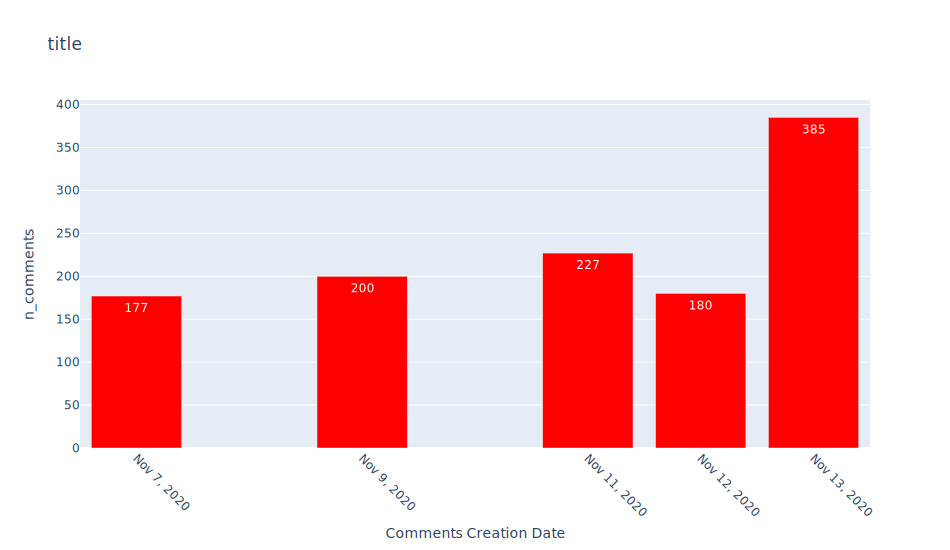

In [1327]:
bar_peaks(
    get_top(df_abuser, "date", 5, "date", "n_comments").sort_values("date"),
    "title",
)

#### Time difference

In [1328]:
df_abuser.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:05    68
0 days 00:00:07    60
0 days 00:00:08    57
0 days 00:00:04    52
0 days 00:00:06    47
0 days 00:00:10    43
0 days 00:00:15    38
0 days 00:00:11    37
0 days 00:00:13    36
0 days 00:00:18    35
0 days 00:00:09    35
0 days 00:00:02    34
0 days 00:00:03    34
0 days 00:00:31    34
0 days 00:00:22    33
Name: datetime, dtype: int64

In [1329]:
df_abuser.username.value_counts().head(15)

pauu.eg                        115
samanthastar53                  67
_dope_black_unicorn_            66
mackenzilaplante                60
justiceforheard                 57
johnnyforever_2005              53
amberheardabottleofwineopen     51
becauseitsjohnnydepp            51
c_shortt                        50
sahartaleb___                   47
machelyyyyy                     44
kai_t_2005                      42
unveilyourfaves                 41
zhra.006                        41
wewantjusticeforjohnnydepp      38
Name: username, dtype: int64

#### pauu.eg

In [1330]:
df_abuser.query('username == "pauu.eg"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:03    6
0 days 00:00:06    3
0 days 00:00:00    2
0 days 00:02:51    2
0 days 00:05:45    2
0 days 00:00:41    2
0 days 00:04:10    2
0 days 00:00:22    2
0 days 00:00:20    2
0 days 00:00:53    2
0 days 00:00:09    2
0 days 00:00:08    2
0 days 00:00:02    2
0 days 00:00:05    2
0 days 00:04:44    1
0 days 00:07:33    1
0 days 00:07:26    1
0 days 00:05:57    1
0 days 00:05:33    1
0 days 00:04:52    1
dtype: int64

In [1331]:
df_abuser.query('username == "pauu.eg"').n_likes.value_counts(), df_abuser.query(
    ' username == "pauu.eg"'
).n_replies.value_counts()

(1.0     48
 0.0     27
 2.0     20
 3.0      4
 4.0      3
 6.0      3
 7.0      3
 13.0     3
 8.0      1
 26.0     1
 24.0     1
 9.0      1
 Name: n_likes, dtype: int64,
 0.0    113
 1.0      2
 Name: n_replies, dtype: int64)

In [1332]:
df_abuser.query('username == "pauu.eg"').date.value_counts()

2020-04-22    28
2020-04-19    27
2020-04-23    15
2020-04-20    10
2020-04-26    10
2020-04-21     9
2020-04-25     6
2020-04-18     4
2020-03-17     3
2020-05-02     2
2020-05-08     1
Name: date, dtype: int64

#### amberheardabottleofwineopen.eg

In [1333]:
df_abuser.query('username == "amberheardabottleofwineopen"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:04    21
0 days 00:00:05    19
0 days 00:00:07     4
0 days 00:00:06     3
0 days 00:00:08     2
0 days 00:00:15     1
dtype: int64

In [1334]:
df_abuser.query('username == "amberheardabottleofwineopen"').n_likes.value_counts(), df_abuser.query(
    ' username == "amberheardabottleofwineopen"'
).n_replies.value_counts()

(0.0    48
 1.0     3
 Name: n_likes, dtype: int64,
 0.0    51
 Name: n_replies, dtype: int64)

In [1335]:
df_abuser.query('username == "amberheardabottleofwineopen"').date.value_counts()

2020-07-31    51
Name: date, dtype: int64

#### samanthastar53

In [1336]:
df_abuser.query('username == "samanthastar53"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:44    2
1 days 23:36:55    1
0 days 14:58:54    1
0 days 16:57:47    1
0 days 19:25:05    1
0 days 20:11:48    1
0 days 20:28:43    1
0 days 23:53:33    1
1 days 00:04:43    1
1 days 00:10:33    1
1 days 00:25:44    1
1 days 04:14:32    1
1 days 05:01:16    1
1 days 13:11:27    1
1 days 13:34:38    1
1 days 17:13:42    1
0 days 00:00:15    1
0 days 13:08:12    1
2 days 18:17:54    1
2 days 22:54:47    1
dtype: int64

In [1337]:
df_abuser.query('username == "samanthastar53"').n_likes.value_counts(), df_abuser.query(
    ' username == "samanthastar53"'
).n_replies.value_counts()

(0.0     22
 1.0     17
 2.0      8
 3.0      6
 4.0      5
 6.0      2
 5.0      2
 8.0      2
 7.0      1
 9.0      1
 18.0     1
 Name: n_likes, dtype: int64,
 0.0    56
 1.0     5
 5.0     1
 4.0     1
 Name: n_replies, dtype: int64)

In [1338]:
df_abuser.query('username == "samanthastar53"').date.value_counts()

2020-11-06    6
2020-12-09    4
2021-01-13    4
2020-12-10    4
2020-11-10    3
2020-11-07    3
2020-12-11    3
2021-01-09    3
2020-11-12    3
2020-11-08    2
2021-01-22    2
2020-12-26    2
2020-12-24    2
2020-11-04    2
2020-12-13    2
2020-11-05    2
2020-11-23    2
2021-02-06    2
2020-11-11    1
2020-11-18    1
2020-12-30    1
2020-12-28    1
2021-02-09    1
2021-03-09    1
2020-11-26    1
2020-12-29    1
2020-12-05    1
2020-11-14    1
2020-12-19    1
2021-03-20    1
2020-11-15    1
2021-01-30    1
2021-02-11    1
2021-01-14    1
Name: date, dtype: int64

**Amber Heard is abuser**
- Top Users:
    - pauu.eg 	115
        -     86 posts
        - 301 followers
        - 153 following
    - amberheardabottleofwineopen 	51
        -     55 posts
        - 51 followers
        - 20 following
    - c_shortt 	50
        - suspeicious account, made all neagative comments related to amber.
    - samanthastar53 	49
        -     5 posts
        - 34 followers
        - 102 following
    - johnnyforever_2005 	43
        - suspeicious account, made all neagative comments related to amber.
    - zhra.006 	40
        - suspeicious account, made all neagative comments related to amber.
    - sahartaleb___ 	38
        - suspeicious account, made all neagative comments related to amber.
    - wewantjusticeforjohnnydepp 	36
        - suspeicious account, made all neagative comments related to amber.
    - diann__lee 	30
        - 79 posts
        - 255 followers
        - 1,443 following
    - johnnydepp_gothic 	29
        - suspeicious account, made all neagative comments related to amber.
    - ...
- Top Dates:
    - 2020-11-11 	73
    - 2020-12-18 	72
    - 2021-02-11 	63
    - 2020-07-31 	56
    - 2020-11-07 	42
    - 2020-11-12 	42
    - ..

<a id='fire'></a>
>>###  Fire Amber Heard
><ul>
 <li><a href="#neg">Negative Comments</a></li>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire"><b>Fire Amber Heard</b></a></li>
 <li><a href="#support">Support Amber Heard</a></li>
 </ul>

In [1339]:
# fire = [i for i in top_texts if 'fire' in i]
fire = ['boycottamber', 'fireamberheardfromaquaman', 'fireamberheard', 'fire her', 'fired',
        'fire amber', 'remove amber', 'removeamber', 'remove-amber', 'removed']

In [1340]:
neg_text = neg_text|set(fire)

In [1341]:
df_fire = df_comments[df_comments.message.str.contains('|'.join(fire))]
df_fire.shape

(3687, 16)

In [1342]:
# df_fire.message.value_counts().head(60)

### A Heat Map for the Count of Comments Containing "Fire Amber"

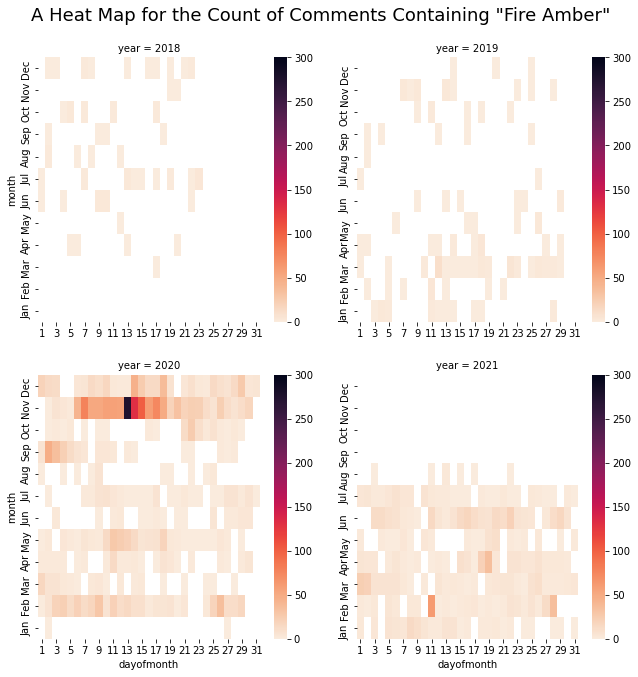

In [1343]:
daily_counts = df_fire.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=2, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=300);

plt.suptitle('A Heat Map for the Count of Comments Containing "Fire Amber"', y=1.04, fontsize=18)
g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1344]:
len(df_fire)

3687

### Most Repeated Comments Containing "Fire Amber"

In [1345]:
df = df_fire.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
64,#fireamberheard,94,191.0,1.0
20,#boycottamberheard,83,286.0,2.0
1817,https://www.change.org/p/dc-entertainment-remo...,67,91.0,11.0
200,#removeamberheardfromaquaman2,54,941.0,11.0
209,#removeamberheardsfromaquaman2,47,79.0,4.0
2992,،#justiceforjohnnydepp #amberheardisanabuser ...,32,3.0,0.0
123,#justiceforjohnnydepp #amberheardisanabuser ...,26,15.0,1.0
1618,fire her,23,86.0,2.0
1602,fire amber heard,13,72.0,3.0
1320,@wewantjusticeforjohnnydepp #johnnydepp #amber...,12,1.0,0.0


In [1346]:
df_fire.message.value_counts().head(10)

#fireamberheard                                                                                                                                                                                                                             94
#boycottamberheard                                                                                                                                                                                                                          83
https://www.change.org/p/dc-entertainment-remove-amber-heard-from-aquaman-2                                                                                                                                                                 67
#removeamberheardfromaquaman2                                                                                                                                                                                                               54
#removeamberheardsfromaquaman2              

### Top Users Commented with "Fire Amber"

In [1347]:
# The total number of different users posted justiceforjohnnydepp
df_fire.username.nunique()

2617

In [1348]:
df_nfire = df_fire.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nfire.head(25)


,username,n_comments,n_likes,n_replies
2077,samanthastar53,87,141.0,10.0
2608,zhra.006,35,9.0,2.0
2065,sahartaleb___,34,23.0,1.0
2520,wewantjusticeforjohnnydepp,26,2.0,0.0
413,becauseitsjohnnydepp,22,25.0,2.0
759,divulgaaa.bahia,21,56.0,0.0
1486,littleflowerofmercy,20,2458.0,10.0
2397,timv777,19,121.0,3.0
572,chiara_arcozzii_,15,80.0,2.0
744,di22mendez,15,53.0,1.0


In [1349]:
neg_users = neg_users|set(df_nfire.username)

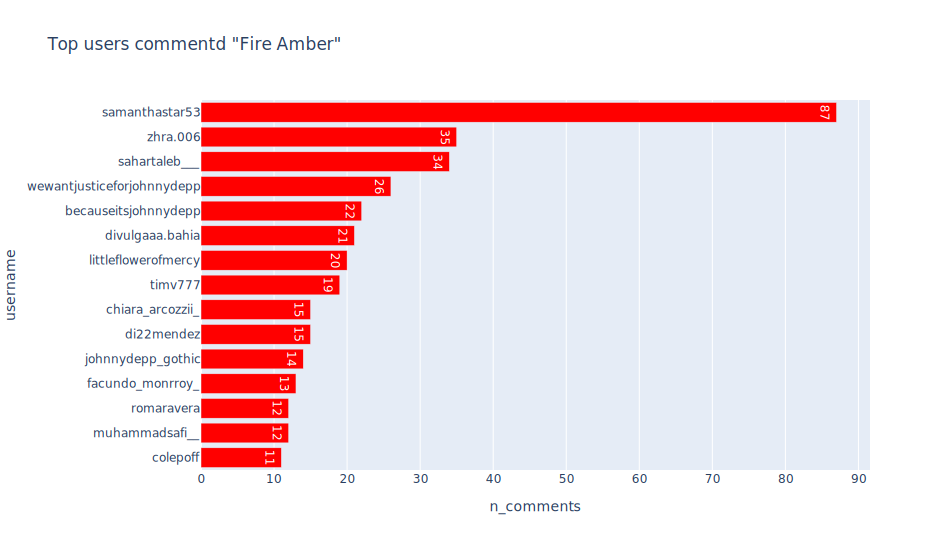

In [1350]:
barh(get_top(df_fire, 'username', 15, 'username', 'n_comments'), 'Top users commentd "Fire Amber"', 10)

### "Fire Amber" Users Contributions on Each Date

In [1351]:
df = df_fire.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
2443,2021-02-11,zhra.006,32,3.0,0.0
2442,2021-02-11,sahartaleb___,30,18.0,1.0
1426,2020-11-13,di22mendez,15,53.0,1.0
1652,2020-11-14,mackenzilaplante,11,3.0,0.0
1701,2020-11-15,becauseitsjohnnydepp,10,17.0,1.0
1710,2020-11-15,divulgaaa.bahia,9,31.0,0.0
2190,2020-12-14,muhammadsafi__,8,103.0,8.0
523,2020-04-11,romaravera,8,3.0,0.0
2720,2021-04-19,sh_qqp99,8,23.0,0.0
1291,2020-11-11,facundo_monrroy_,7,13.0,0.0


### "Fire Amber" Peak Dates

In [1352]:
df = df_fire.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,n_comments,n_likes,n_replies
313,2020-11-13,275,11011.0,99.0
314,2020-11-14,131,212.0,14.0
315,2020-11-15,101,1330.0,13.0
307,2020-11-07,78,3045.0,57.0
317,2020-11-17,74,1166.0,22.0
390,2021-02-11,62,21.0,1.0
316,2020-11-16,59,826.0,29.0
310,2020-11-10,57,284.0,22.0
311,2020-11-11,57,1327.0,2.0
312,2020-11-12,56,2516.0,7.0


In [1353]:
df_fire['datetime'].max()

Timestamp('2021-08-22 23:12:22')

In [1354]:
df_fire['datetime'].min()

Timestamp('2018-03-25 20:05:51')

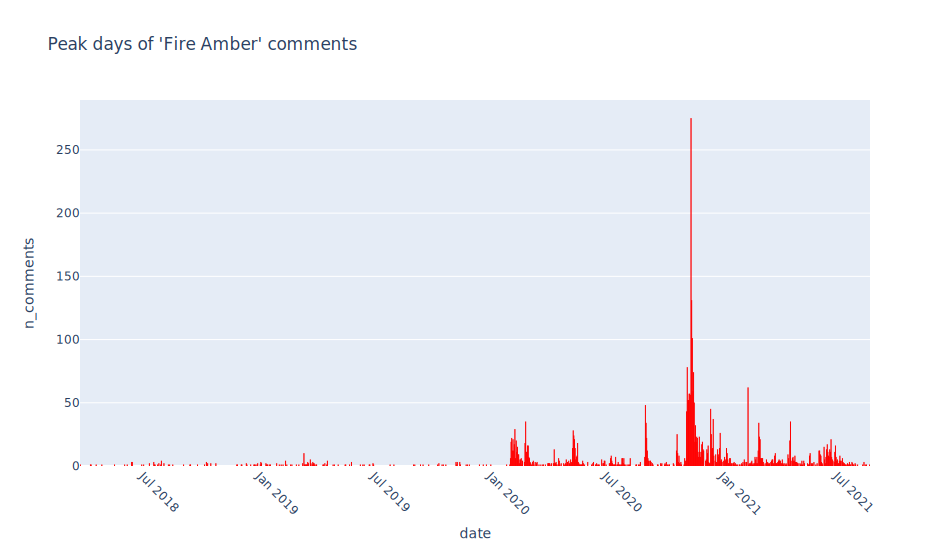

In [1355]:
fig = (
    px.bar(
        get_top(df_fire, "date", df_fire.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title="Peak days of 'Fire Amber' comments",
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show("svg")

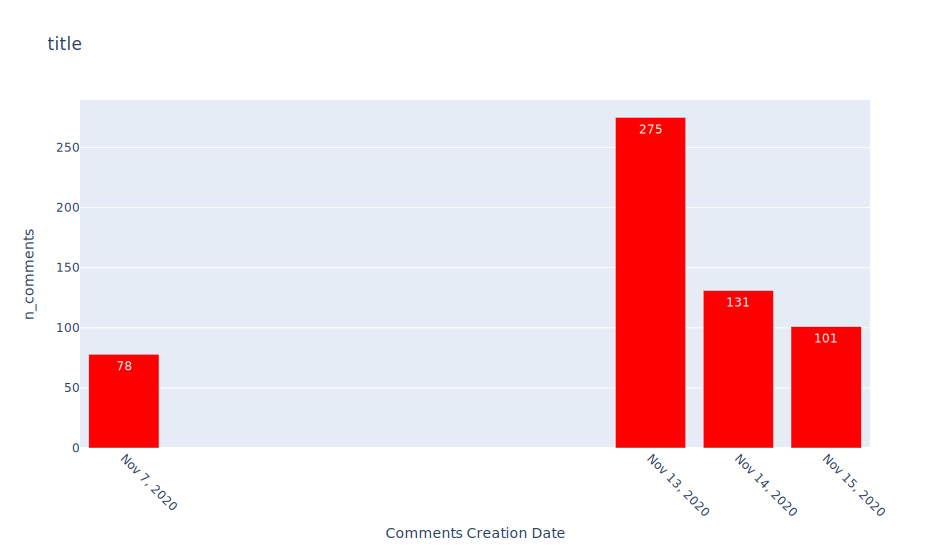

In [1356]:
bar_peaks(
    get_top(df_fire, "date", 4, "date", "n_comments").sort_values("date"),
    "title",
)

#### Time difference

In [1357]:
df_fire.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:10    19
0 days 00:00:07    17
0 days 00:00:04    15
0 days 00:00:05    15
0 days 00:00:03    14
0 days 00:00:12    13
0 days 00:00:11    12
0 days 00:00:09    10
0 days 00:00:57     9
0 days 00:00:59     9
0 days 00:00:40     9
0 days 00:00:06     9
0 days 00:00:42     8
0 days 00:00:13     8
0 days 00:00:56     8
Name: datetime, dtype: int64

In [1358]:
df_fire.username.value_counts().head(15)

samanthastar53                87
zhra.006                      35
sahartaleb___                 34
wewantjusticeforjohnnydepp    26
becauseitsjohnnydepp          22
divulgaaa.bahia               21
littleflowerofmercy           20
timv777                       19
chiara_arcozzii_              15
di22mendez                    15
johnnydepp_gothic             14
facundo_monrroy_              13
romaravera                    12
muhammadsafi__                12
colepoff                      11
Name: username, dtype: int64

#### divulgaaa.bahia 	

In [1359]:
df_fire.query(
    'username == "divulgaaa.bahia" '
).datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime         
0 days 00:00:10      1
0 days 00:00:57      1
15 days 14:56:18     1
15 days 07:21:56     1
4 days 18:47:21      1
1 days 16:10:39      1
0 days 11:18:00      1
0 days 10:54:25      1
0 days 08:33:35      1
0 days 07:35:44      1
0 days 07:11:08      1
0 days 05:32:59      1
0 days 02:28:39      1
0 days 02:08:19      1
0 days 02:04:19      1
0 days 01:59:11      1
0 days 00:31:38      1
0 days 00:26:36      1
0 days 00:01:21      1
154 days 03:56:37    1
dtype: int64

In [1360]:
df_fire.query('username == "divulgaaa.bahia"').n_likes.value_counts(), df_fire.query(
    ' username == "divulgaaa.bahia"'
).n_replies.value_counts()

(3.0    4
 1.0    4
 2.0    4
 0.0    4
 7.0    2
 5.0    2
 8.0    1
 Name: n_likes, dtype: int64,
 0.0    21
 Name: n_replies, dtype: int64)

In [1361]:
df_fire.query('username == "divulgaaa.bahia"').date.value_counts()

2020-11-15    9
2020-11-14    3
2020-11-16    2
2020-11-18    1
2021-05-26    1
2020-11-17    1
2020-12-08    1
2020-11-13    1
2020-12-23    1
2020-11-22    1
Name: date, dtype: int64

#### isabel.bolivia

In [1362]:
df_fire.query(
    'username == "isabel.bolivia" '
).datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime        
2 days 10:41:05     1
4 days 22:30:41     1
7 days 00:45:31     1
10 days 11:23:41    1
10 days 14:02:55    1
12 days 00:05:55    1
22 days 12:54:20    1
dtype: int64

In [1363]:
df_fire.query('username == "isabel.bolivia"').n_likes.value_counts(), df_fire.query(
    ' username == "isabel.bolivia"'
).n_replies.value_counts()

(1.0    4
 0.0    2
 2.0    2
 Name: n_likes, dtype: int64,
 0.0    7
 1.0    1
 Name: n_replies, dtype: int64)

In [1364]:
df_fire.query('username == "isabel.bolivia"').date.value_counts()

2021-04-27    1
2021-02-23    1
2021-03-25    1
2021-03-07    1
2021-03-12    1
2021-05-04    1
2021-03-15    1
2021-04-17    1
Name: date, dtype: int64

**Fire Amber Heard**
- Top Users:
    - divulgaaa.bahia 	21
        -     21 posts
        - 112 followers
        - 5,991 following
    
    - johnnydepp_gothic 	14
        - suspeicious account, made all neagative comments related to amber.
        - comments repeated within some hours.
    - isabel.bolivia 	8
        -     765 posts
        - 448 followers
        - 2,207 following
        - comments in different times and different dates.
        - vairety of number of likes nd replies but still very low number.
    - pabloziegl 	8
        -     88 posts
        - 165 followers
        - 693 following 
    - sh_qqp99 	8
        -     0 posts
        - 0 followers
        - 230 following
        - Date Joined: 23 June 2015


    - ...
- Top Dates:
    - 2020-11-13 	21
    - 2020-11-14 	21
    - 2020-11-15 	20
    - 2020-12-18 	14
    - 2021-04-19 	13
    - 2020-11-17 	10
    - ..

<a id='support'></a>
>>###  Support Amber Heard
><ul>
 <li><a href="#neg">Negative Comments</a></li>
 <li><a href="#turd">Amber Turd</a></li>
 <li><a href="#fuck">Fuck Amber Heard</a></li>
 <li><a href="#liar">Amber Heard is a liar</a></li>
 <li><a href="#abuser">Amber Heard is a abuser</a></li>
 <li><a href="#fire">Fire Amber Heard</a></li>
 <li><a href="#support"><b>Support Amber Heard</b></a></li>
 </ul>

In [1365]:
support = [i for i in top_texts if 'sup' in i]
support

['support amber heard', 'suport amber heard']

In [1366]:
support = support + ['wearewithamber', 'support amber', 'supportamber', 'justice for amber', 'istandwithamber',
                     'wearewithyouamber', 'justiceforamber']

In [1367]:
df_support = amber[amber.message.str.contains("|".join(support))]
print(df_support.shape)
df_support.head()

(1177, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
559,support amber heard❤️❤️❤️all the round the wor...,2020-05-22 16:00:29,17848783103108926,0.0,0.0,2314639163877400576,n,29669818597,siachidesign,False,https://www.instagram.com/siachidesign,2020,May,22,2020-05-22,16
1938,@greenloverlola1 real fans of j didn't support...,2020-08-02 12:13:15,18108663892158336,NaN,0.0,2366414216337029120,17870737063857668,36018230242,greenloverlola1,True,https://www.instagram.com/greenloverlola1,2020,Aug,2,2020-08-02,12
2524,#wearewithyouamberheard #amberheard #justicefo...,2020-07-23 20:09:17,17906664943469068,0.0,3.0,2354457800847320576,n,5401459905,zaislice,False,https://www.instagram.com/zaislice,2020,Jul,23,2020-07-23,20
5211,#amberheard #wearewithyouamberheard #istandwit...,2020-07-29 05:58:11,17854249718119956,0.0,0.0,2363466428698750976,n,8890463520,fateme_ajn,False,https://www.instagram.com/fateme_ajn,2020,Jul,29,2020-07-29,5
5672,support amber heard❤️❤️❤️all the round the wor...,2020-07-17 17:12:16,17901918277494104,0.0,0.0,2354674862277974016,n,29669818597,siachidesign,False,https://www.instagram.com/siachidesign,2020,Jul,17,2020-07-17,17


In [1368]:
df_support.username.nunique()

215

In [1369]:
len(neg_users)

14601

In [1370]:
neg_users = neg_users - set(df_support.username)

In [1371]:
len(neg_users)

14511

In [1372]:
df_support.message.value_counts()

support amber heard❤️❤️❤️all the round the world my friends                                                                                                                                                                                                                                                                                                   272
suport amber heard❤❤❤ all arount the world my friends                                                                                                                                                                                                                                                                                                         153
[tags: #mera #justiceleague #aquaman #3daystokill #londonfields #theinformers #crazydrive #theward #artist #activist #wearewithyouamberheard]                                                                                                                                                       

In [1373]:
get_top(df_support, 'username', 15, 'username', 'n_comments')

,username,n_comments
0,siachidesign,430
1,heardupdate,74
2,motivatornetwork,58
3,justiceforheard,56
4,heardsource,56
5,andmen.1998,40
6,goddesamber,36
7,fateme_ajn,32
8,aheardfan,29
9,amberphotoshoot,27


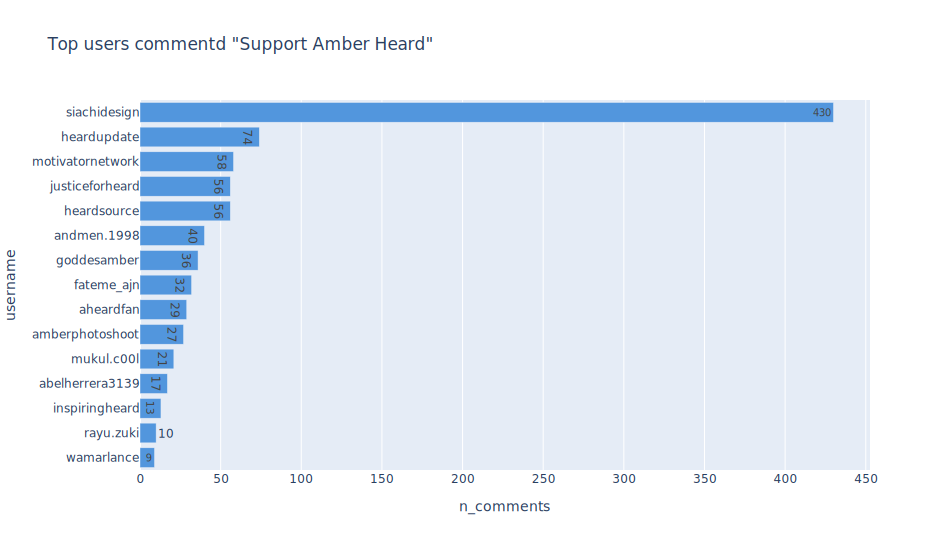

In [1374]:
barh(get_top(df_support, 'username', 15, 'username', 'n_comments'), 'Top users commentd "Support Amber Heard"')

In [1375]:
df_support['datetime'].max()

Timestamp('2021-08-27 16:58:24')

In [1376]:
df_support['datetime'].min()

Timestamp('2018-08-03 18:48:07')

In [1377]:
get_top(df_support, 'date', 15, 'date', 'n_comments')

,date,n_comments
0,2020-07-29,25
1,2020-08-04,22
2,2020-07-25,22
3,2020-07-20,22
4,2020-07-23,19
5,2020-07-26,19
6,2020-07-28,17
7,2020-05-21,17
8,2020-07-22,14
9,2020-07-15,14


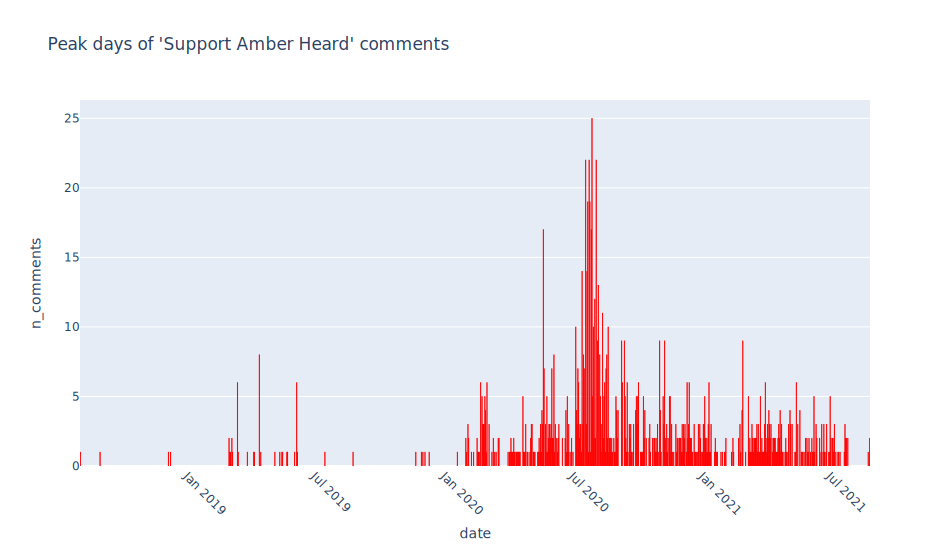

In [1378]:
fig = (
    px.bar(
        get_top(df_support, "date", df_support.shape[0], "date", "n_comments"),
        x="date",
        y="n_comments",
        title="Peak days of 'Support Amber Heard' comments",
    )
    .update_traces(
        marker_color="red",
        opacity=1,
        textposition="auto",
        marker_line_color="red",
        marker_line_width=0.5,
    )
    .update_xaxes(tickangle=45)
)
fig.show("svg")

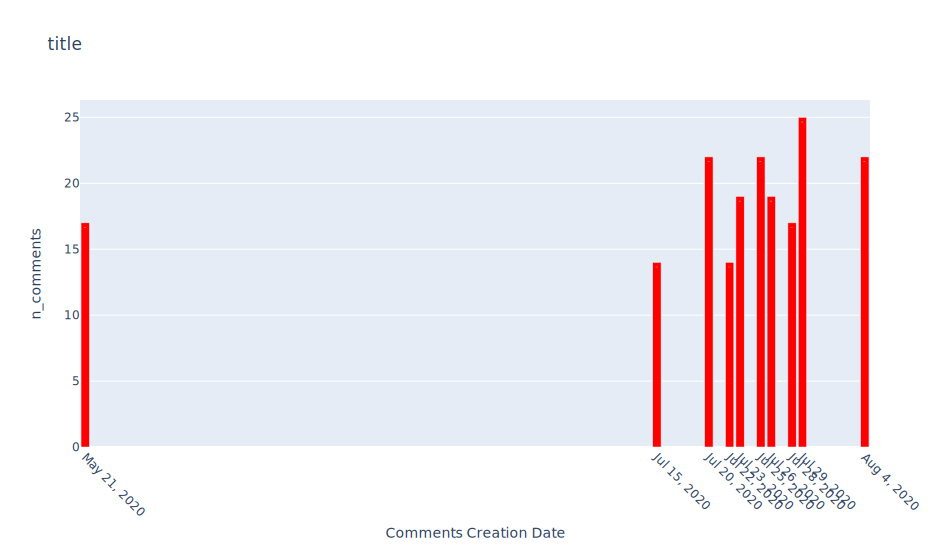

In [1379]:
bar_peaks(
    get_top(df_support, "date", 10, "date", "n_comments").sort_values("date"),
    "title",
)

#### Time difference

In [1380]:
df_support.datetime.sort_values().diff().sort_values().value_counts().head(15)

0 days 00:00:21    14
0 days 00:00:17    13
0 days 00:00:08    12
0 days 00:00:18    11
0 days 00:00:20    10
0 days 00:00:28    10
0 days 00:00:07     9
0 days 00:00:15     9
0 days 00:00:06     8
0 days 00:00:10     8
0 days 00:00:13     8
0 days 00:00:12     7
0 days 00:00:27     7
0 days 00:00:25     6
0 days 00:00:39     6
Name: datetime, dtype: int64

In [1381]:
get_top(df_support, 'username', 15, 'username', 'n_comments').iloc[:2].username.values

array(['siachidesign', 'heardupdate'], dtype=object)

#### siachidesign

In [1382]:
df_support.query('username == "siachidesign"').datetime.sort_values().diff().sort_values().to_frame().value_counts().head(20)

datetime       
0 days 00:00:08    11
0 days 00:00:21    11
0 days 00:00:20    10
0 days 00:00:18    10
0 days 00:00:17     9
0 days 00:00:07     8
0 days 00:00:28     7
0 days 00:00:15     7
0 days 00:00:06     7
0 days 00:00:13     7
0 days 00:00:16     6
0 days 00:00:27     6
0 days 00:00:25     6
0 days 00:00:12     6
0 days 00:00:11     6
0 days 00:00:10     6
0 days 00:00:09     6
0 days 00:00:39     5
0 days 00:00:30     5
0 days 00:00:37     5
dtype: int64

In [1383]:
df_support.query('username == "siachidesign"').n_likes.value_counts(), df_turd.query(
    ' username == "siachidesign"'
).n_replies.value_counts()

(0.0    399
 1.0     29
 2.0      2
 Name: n_likes, dtype: int64,
 Series([], Name: n_replies, dtype: int64))

In [1384]:
df_support.query('username == "siachidesign"').date.value_counts()

2020-08-04    21
2020-07-20    21
2020-07-25    21
2020-07-26    19
2020-05-21    15
              ..
2020-09-25     1
2020-10-29     1
2020-11-19     1
2020-08-27     1
2020-06-30     1
Name: date, Length: 96, dtype: int64

#### motivatornetwork

In [1385]:
df_support.query('username == "motivatornetwork"').datetime.sort_values().diff().sort_values()

1696880    0 days 00:00:17
554163     0 days 00:00:21
5731       0 days 00:00:22
1622590    0 days 00:00:27
718345     0 days 00:00:32
775967     0 days 00:00:36
248054     0 days 00:00:38
1071072    0 days 00:00:42
351620     0 days 00:00:42
1071065    0 days 00:00:46
248057     0 days 00:01:25
676191     0 days 00:01:26
676190     0 days 00:01:48
226318     0 days 00:01:49
248015     0 days 00:01:59
1696883    0 days 00:02:14
248051     0 days 00:02:19
280769     0 days 00:02:27
212952     0 days 00:03:28
723897     0 days 00:03:33
351622     0 days 00:03:39
1154296    0 days 00:03:57
312359     0 days 00:04:04
764810     0 days 00:05:08
312357     0 days 00:05:18
1018305    0 days 00:06:27
312355     0 days 00:06:39
22049      0 days 00:07:16
525811     0 days 00:10:20
248056     0 days 00:14:25
718339     0 days 00:15:33
130449     0 days 00:15:33
1421541    0 days 00:24:15
1608693    0 days 00:27:20
775961     0 days 00:36:48
1622589    0 days 04:40:53
312363     0 days 05:18:02
1

In [1386]:
df_support.query('username == "motivatornetwork"').n_likes.value_counts(), df_support.query(
    ' username == "motivatornetwork"'
).n_replies.value_counts()

(1.0    32
 2.0    14
 3.0     7
 6.0     3
 4.0     1
 0.0     1
 Name: n_likes, dtype: int64,
 0.0    16
 1.0     4
 4.0     3
 8.0     1
 3.0     1
 2.0     1
 Name: n_replies, dtype: int64)

In [1387]:
df_support.query('username == "motivatornetwork"').date.value_counts()

2020-06-05    7
2020-02-22    6
2020-02-28    5
2020-02-24    5
2020-02-29    4
2020-03-02    4
2020-02-26    3
2020-03-05    3
2020-02-25    3
2020-07-18    3
2020-04-26    2
2020-03-11    2
2020-02-27    2
2020-03-19    2
2020-03-01    1
2020-03-18    1
2020-02-20    1
2020-03-15    1
2020-02-19    1
2020-07-22    1
2020-02-18    1
Name: date, dtype: int64

**Support Amber Heard**
- Top Users:
    - siachidesign 	430
        -     48 posts
        - 1,320 followers
        - 302 following
        - created around 15 February 2020
        - seems bot, many comments with the same text within seconds.
        - rearly to find like or reply on his comment.
    - motivatornetwork 	55
        -     126 posts
        - 117 followers
        - 214 following.
        - created around November-December 2016.
        - most comments have 1 like or 2 likes, no replies.
    - ...
- Top Dates:
    - 2020-08-04 	21
    - 2020-07-20 	21
    - 2020-07-25 	21
    - 2020-07-26 	19
    - ..

<a id= 'fuck0'></a>
>>### Contains F*ck
> <ul>
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0"><b>Contains "F*ck"</b></a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
 <li>--------------------------------</li>    
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

### A Heat Map for the Count of Comments Containing "F*ck" 


Note: The Peaks Also on Nov 2020
 


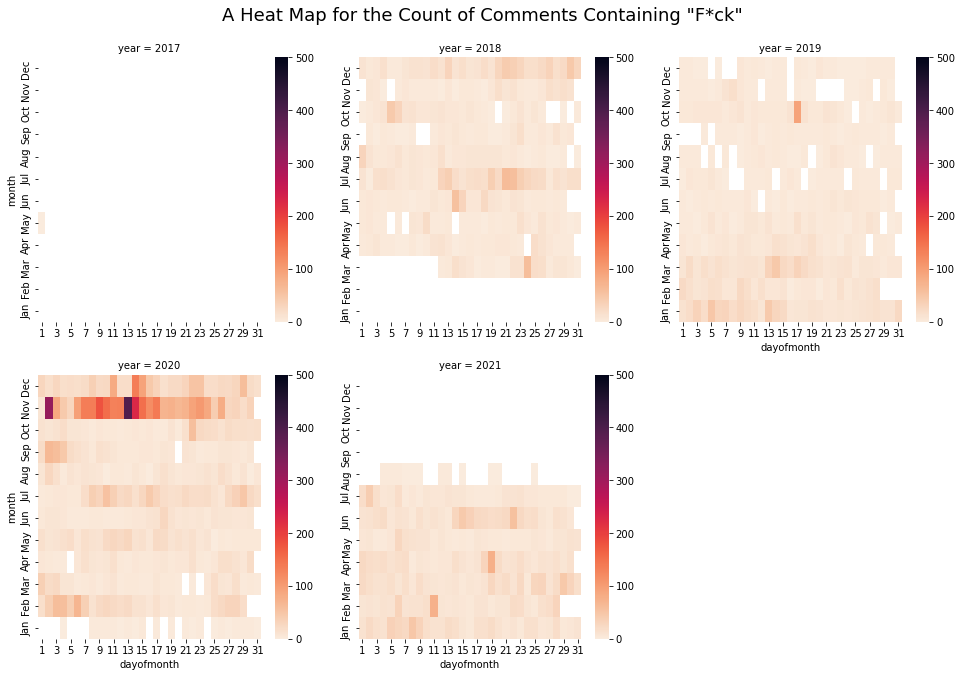

In [1388]:
df_fuc = df_comments[df_comments["message"].str.contains("fuck")]
daily_counts = df_fuc.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

print('\nNote: The Peaks Also on Nov 2020\n ')
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=3, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=500);

plt.suptitle('A Heat Map for the Count of Comments Containing "F*ck"', y=1.04, fontsize=18)
g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1389]:
len(df_fuc)

15476

### The Most Repeated Comments Containing "F*ck"

In [1390]:
df = df_fuc.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
5245,fuck amber heard,291,762.0,68.0
5635,fuck her,185,122.0,14.0
73,#fuckamberheard,165,272.0,7.0
2144,@johnnydepp #wearewithyoujohnnydepp #amberhear...,124,23.0,0.0
5221,fuck amber,105,158.0,3.0
12882,🖕🖕🖕🖕 fuck you and your bullshit copy/paste tags,85,16.0,3.0
5155,fuck,80,125.0,0.0
5912,fuck no,75,392.0,7.0
6094,fuck that bitch,74,69.0,19.0
6672,fuck you,63,25.0,0.0


### Top Users Commented with "F*ck"

In [1391]:
# The total number of different users posted justiceforjohnnydepp
df_fuc.username.nunique()

11865

In [1392]:
df_nfuc = df_fuc.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nfuc.head(25)


,username,n_comments,n_likes,n_replies
6285,kingskippy1987,103,151.0,17.0
4195,funkfried4,103,21.0,3.0
8852,queenmusicvidoe,70,14.0,0.0
4791,hosein.sarsam,45,78.0,5.0
8851,queenmusicvideo,41,0.0,0.0
9456,sahartaleb___,37,35.0,1.0
11821,zhra.006,36,5.0,0.0
2137,c_shortt,31,100.0,4.0
10182,staffordcarlis1,30,0.0,0.0
8366,ohgodnotsimone,26,109.0,3.0


### "F*ck" Users Contributions on Each Date

In [1393]:
df = df_fuc.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
7763,2020-11-02,queenmusicvidoe,70,14.0,0.0
10695,2020-12-11,kingskippy1987,56,15.0,0.0
7762,2020-11-02,queenmusicvideo,41,0.0,0.0
11938,2021-02-11,zhra.006,32,3.0,0.0
11935,2021-02-11,sahartaleb___,30,18.0,1.0
7694,2020-11-02,babikate6,24,2.0,0.0
8371,2020-11-09,ngnrzi,22,22.0,0.0
8686,2020-11-12,c_shortt,18,48.0,2.0
10206,2020-11-24,bonecrackii,14,34.0,1.0
7890,2020-11-04,dana__milash,14,10.0,0.0


In [1394]:
fuc_dates = df_fuc.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

fuc_dates.head(15)

,date,n_comments,n_likes,n_replies
918,2020-11-13,393,7008.0,177.0
907,2020-11-02,314,1615.0,2.0
919,2020-11-14,227,1495.0,29.0
914,2020-11-09,181,681.0,17.0
915,2020-11-10,153,1326.0,35.0
920,2020-11-15,152,1291.0,13.0
922,2020-11-17,139,1248.0,17.0
912,2020-11-07,136,1896.0,50.0
913,2020-11-08,136,191.0,12.0
949,2020-12-14,135,2295.0,21.0


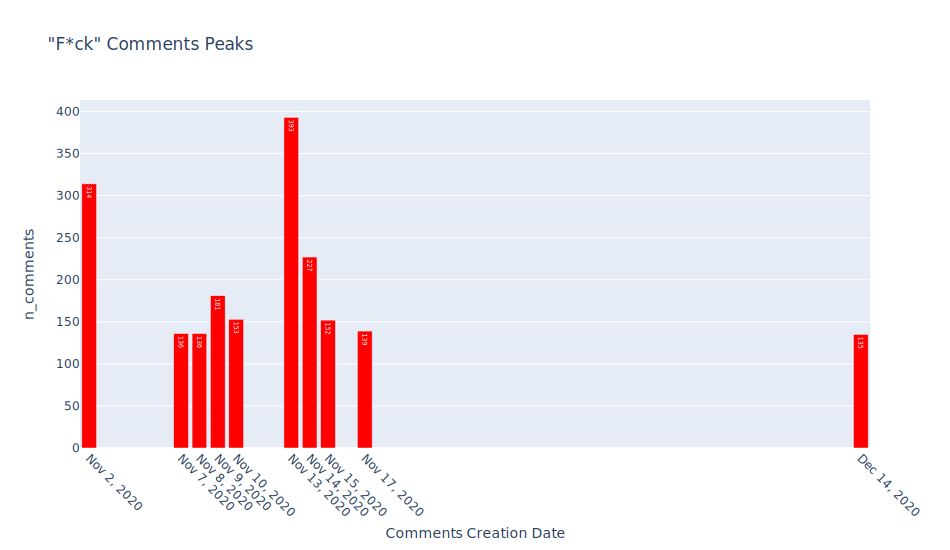

In [1395]:
bar_peaks(fuc_dates[['date', 'n_comments']].head(10), '"F*ck" Comments Peaks')

<a id= 'agree'></a>
>>### Contains Agree
> <ul>
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree"><b>Contains "Agree"</b></a></li>
 <li>--------------------------------</li>    
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

In [1396]:
df_agree = df_comments[df_comments["message"].str.contains("agree")]
print(df_agree.shape)
df_agree.head()

(5404, 16)


,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
858,"i’ve been a victim of emotional abuse, the mos...",2020-02-03 00:42:26,18006776428275864,1.0,58.0,2235162134629858816,n,8056784446,uncute.slut,False,https://www.instagram.com/uncute.slut,2020,Feb,3,2020-02-03,0
1184,@lea_seydoux_myplatonicpassion #katyperry #ra...,2021-05-26 12:58:01,17956322701419604,NaN,1.0,2582068684691097088,17882889281210796,9673947311,lea_seydoux_myplatonicpassion,True,https://www.instagram.com/lea_seydoux_myplaton...,2021,May,26,2021-05-26,12
2409,totally agree 😂😂,2020-06-01 03:32:22,18100154578152792,0.0,0.0,2318954103417754624,n,2970832866,noelia.villalta,False,https://www.instagram.com/noelia.villalta,2020,Jun,1,2020-06-01,3
2416,agreeeeeee,2020-06-02 11:23:04,17895069952518566,0.0,1.0,2318954103417754624,n,29391791686,__ilaria22__,False,https://www.instagram.com/__ilaria22__,2020,Jun,2,2020-06-02,11
2419,@amberheard totally reptile 🦎 and i agree with...,2020-06-02 18:05:47,17875233562691908,0.0,1.0,2318954103417754624,n,462111525,shenzrlife02,False,https://www.instagram.com/shenzrlife02,2020,Jun,2,2020-06-02,18


### A Heat Map for the Count of Comments Containing "Agree" 

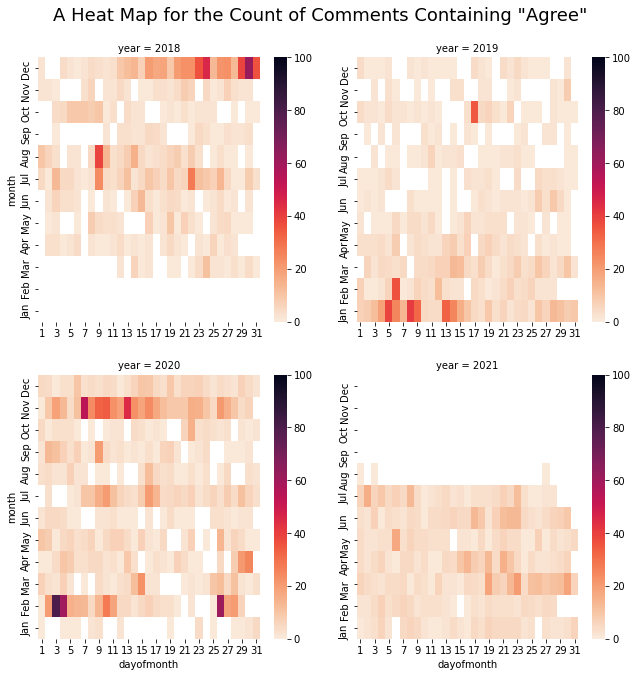

In [1397]:
daily_counts = df_agree.groupby(['year', 'dayofmonth', 'month']).size().reset_index(name='count')
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    d = d.reindex(index=months[::-1])
    sb.heatmap(d, **kwargs)

g = sb.FacetGrid(daily_counts, col='year', col_wrap=2, height=4.5)
g.map_dataframe(draw_heatmap, 'dayofmonth', 'month', 'count', cmap='rocket_r', vmin=0, vmax=100);

plt.suptitle('A Heat Map for the Count of Comments Containing "Agree"', y=1.04, fontsize=18)
g.fig.subplots_adjust(wspace=0.15, hspace=0.2)
for axis in g.axes.flat:
    axis.tick_params(labelbottom=True, labelleft=True)

In [1398]:
len(df_agree)

5404

### The Most Repeated Comments Containing "Agree"

In [1399]:
df = df_agree.groupby(['message']).agg({'id':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'id':'repeated_times'})

df.sort_values('repeated_times', ascending=False).head(25)

,message,repeated_times,n_likes,n_replies
3043,agree,183,181.0,3.0
3247,agreed,85,69.0,3.0
3719,i agree,46,13.0,3.0
3523,disagree,36,40.0,1.0
3116,agree with caption,25,73.0,0.0
3174,agree!,15,7.0,0.0
3294,agreed!,13,12.0,2.0
742,@cupofmegan #meganfoxedit #meganfoxedits #mega...,13,0.0,0.0
4561,totally agree,13,7.0,0.0
3139,agree with the caption,12,21.0,0.0


### Top Users Commented with "Agree"

In [1400]:
# The total number of different users Commented with "Agree"
df_agree.username.nunique()

4403

In [1401]:
df_nagree = df_agree.groupby(['username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df_nagree.head(25)


,username,n_comments,n_likes,n_replies
2356,lea_seydoux_myplatonicpassion,61,75.0,0.0
1658,heard_addicted,29,51.0,4.0
2757,missdanicosplay,20,26.0,0.0
2410,liliacypriani,14,21.0,2.0
970,cupofmegan,13,0.0,0.0
1790,imnicolekidmanfan,12,3.0,0.0
4270,wintersoldier121,12,202.0,0.0
449,aquamans_army,11,25.0,0.0
1066,dc_addict,11,34.0,0.0
1720,hottiesofmcu,10,7.0,1.0


### "Agree" Users Contributions on Each Date

In [1402]:
df = df_agree.groupby(['date', 'username']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

df.head(15)

,date,username,n_comments,n_likes,n_replies
1035,2018-12-24,missdanicosplay,6,9.0,0.0
1068,2018-12-26,cine.te.philia,6,7.0,0.0
4700,2021-04-21,the.batfan,6,3.0,0.0
367,2018-07-22,missdanicosplay,5,6.0,0.0
1178,2018-12-30,lane_ch12,5,0.0,0.0
1687,2019-02-12,qwerttyui99000,5,0.0,0.0
3784,2020-11-10,katie_annemlr,5,5.0,0.0
2340,2019-12-23,imnicolekidmanfan,4,1.0,0.0
3870,2020-11-13,mac_alpha_man_stiles,4,3.0,0.0
4044,2020-11-26,charliothy,4,8.0,0.0


In [1403]:
agree_dates = df_agree.groupby(['date']).agg({'message':'count', 'n_likes': 'sum', 'n_replies': 'sum'}).reset_index(
).rename(columns={'message':'n_comments'}).sort_values('n_comments', ascending=False)

agree_dates.head(15)

,date,n_comments,n_likes,n_replies
536,2020-02-03,80,702.0,11.0
235,2018-12-30,62,295.0,14.0
556,2020-02-26,61,349.0,7.0
537,2020-02-04,60,739.0,17.0
773,2020-11-07,54,238.0,5.0
229,2018-12-24,46,1293.0,10.0
779,2020-11-13,45,774.0,54.0
244,2019-01-08,41,209.0,6.0
241,2019-01-05,39,139.0,6.0
234,2018-12-29,39,162.0,7.0


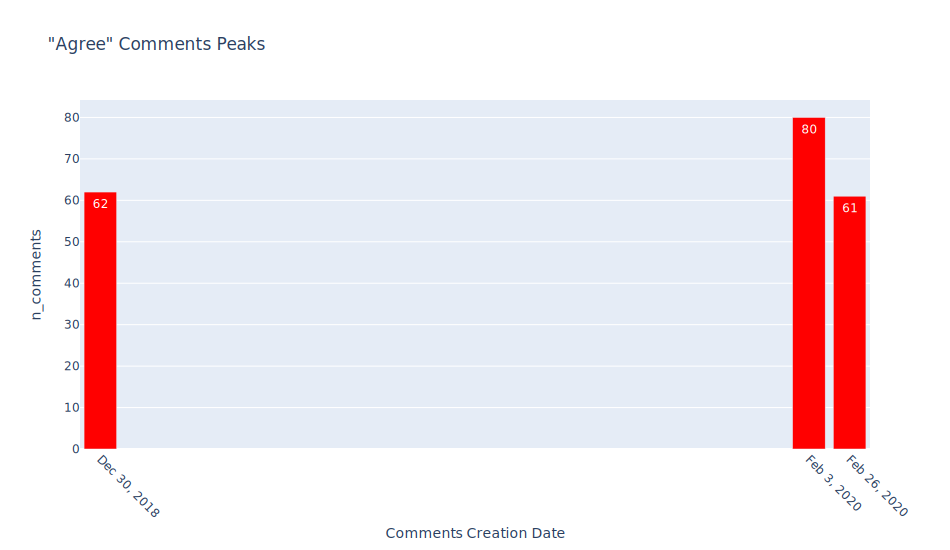

In [1404]:
bar_peaks(agree_dates[['date', 'n_comments']].head(3), '"Agree" Comments Peaks')

<a id='sina'></a>
>>### @sinadeinert @sinadeinertcf #sinas22 ❤️
> <ul>
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
     <li>--------------------------------</li>
 <li><a href="#sina"><b>@sinadeinert @sinadeinertcf</b></a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

This comment repeated  418 times in the same day!

In [1405]:
df1 = df_comments.query(" message ==@top_repeted[0][0] ").datetime.to_frame()
df1.head()

,datetime
973469,2020-08-24 20:06:15
973470,2020-08-24 20:06:15
973471,2020-08-24 20:06:16
973472,2020-08-24 20:06:17
973473,2020-08-24 20:06:18


In [1406]:
df1.groupby(df1.datetime.dt.hour)["datetime"].count().to_frame().rename(
    columns={"datetime": "n_comments"}
).reset_index().rename(columns={"datetime": "hour"})

,hour,n_comments
0,5,219
1,6,187
2,20,12


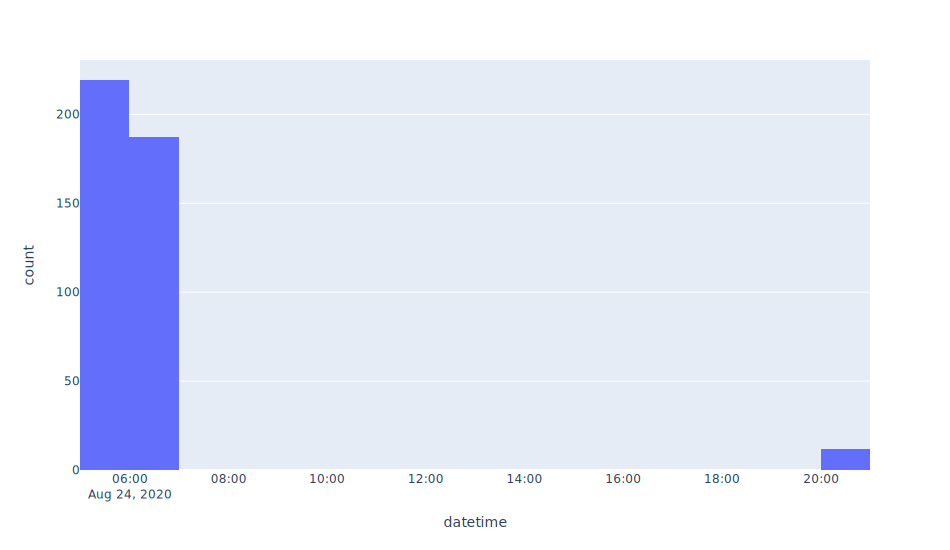

In [1407]:
df = df_comments.query(" message ==@top_repeted[0][0] ").datetime.to_frame()
fig = px.histogram(df, x="datetime", nbins=20)
fig.show("svg")

In [1408]:
df_comments.query(" message ==@top_repeted[0][0] ").username.value_counts()

sinasbutterfly      364
whogiovanna          25
desativei.dbbdbd     17
ilysmsiina           12
Name: username, dtype: int64

In [1409]:
df_comments.query(" message ==@top_repeted[0][0] ").is_verified.value_counts()

False    418
Name: is_verified, dtype: int64

**@sinadeinert @sinadeinertcf #sinas22 ❤️** 
- This comment repeated 418 times in the same day on these hours:
    - 5    219
    - 06   187
     
    - 20   12
- By those users (all of them NOT VERIFIED):
    - sinasbutterfly      364
    -whogiovanna          25
    -desativei.dbbdbd     17
    -ilysmsiina           12
 


### @sinadeinert #sinas22 💕

In [1410]:
df_1_1 = df_comments.query(' message =="@sinadeinert #sinas22 💕" ')
df_1_1.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
973476,@sinadeinert #sinas22 💕,2020-08-24 20:23:14,17844181808338172,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,20
973477,@sinadeinert #sinas22 💕,2020-08-24 20:23:14,17844253259336034,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,20
973478,@sinadeinert #sinas22 💕,2020-08-24 20:23:15,17864073887047444,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,20
973479,@sinadeinert #sinas22 💕,2020-08-24 20:23:15,17895144304586232,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,20
973480,@sinadeinert #sinas22 💕,2020-08-24 20:23:16,18069435310235024,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,20


In [1411]:
df_1_1.shape[0]

207

In [1412]:
df_1_1.date.value_counts()

2020-08-24    201
2020-08-25      6
Name: date, dtype: int64

In [1413]:
df_1_1.datetime.dt.hour.value_counts()

18    151
23     13
19     13
21     12
20     11
0       6
17      1
Name: datetime, dtype: int64

In [1414]:
df_1_1.username.value_counts()

sinasbutterfly      189
whogiovanna          11
desativei.dbbdbd      7
Name: username, dtype: int64

In [1415]:
df_1_1.is_verified.value_counts()

False    207
Name: is_verified, dtype: int64

**@sinadeinert #sinas22 💕** 
- This comment repeated 207 times in the same day on these hours:
    - 18    151
    - 19     13
    - 23     13
    - 21     12
    - 20     11
    - 0       6
    - 17      1
- By those users (all of them NOT VERIFIED):
    - sinasbutterfly      189
    - whogiovanna          11
    - desativei.dbbdbd      7
 

### @sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘 @savannah.clarke @heyoon_jeong @alex__dnt @isolde_dnt_

In [1416]:
df_1_2 = df_comments.query(
    ' message =="@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘 @savannah.clarke @heyoon_jeong @alex__dnt @isolde_dnt_" '
)
df_1_2.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
973733,@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘...,2020-08-24 17:54:37,18160767436023476,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,17
973734,@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘...,2020-08-24 17:54:38,17985302140305956,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,17
973820,@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘...,2020-08-24 07:32:19,17875881028816088,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,7
973821,@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘...,2020-08-24 07:32:20,17873323036885500,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,7
973822,@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘...,2020-08-24 07:32:21,17888209621635858,0.0,0.0,2382515382839532032,n,10216933845,sinasbutterfly,False,https://www.instagram.com/sinasbutterfly,2020,Aug,24,2020-08-24,7


In [1417]:
df_1_2.shape[0]

137

In [1418]:
df_1_2.date.value_counts()

2020-08-24    137
Name: date, dtype: int64

In [1419]:
df_1_2.datetime.dt.hour.value_counts()

7     135
17      2
Name: datetime, dtype: int64

In [1420]:
df_1_2.username.value_counts()

sinasbutterfly    137
Name: username, dtype: int64

In [1421]:
df_1_2.is_verified.value_counts()

False    137
Name: is_verified, dtype: int64

**@sinadeinert @sinadeinertcf #sinas22 💕🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘🆘 @savannah.clarke @heyoon_jeong @alex__dnt @isolde_dnt_** 
- This comment repeated 167 times in the same day on these hours:
    - 7     135
    - 17      2
- By this not verifed user:
    - sinasbutterfly    137
 

### @sinadeinert

In [1422]:
df_1_3 = df_comments.query(' message =="@sinadeinert" ')
df_1_3.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
613519,@sinadeinert,2020-08-24 17:28:13,17924776702430142,0.0,0.0,2382890348743399424,n,6361102186,desativado123398,False,https://www.instagram.com/desativado123398,2020,Aug,24,2020-08-24,17
613520,@sinadeinert,2020-08-24 17:28:15,17884496128706744,0.0,0.0,2382890348743399424,n,6361102186,desativado123398,False,https://www.instagram.com/desativado123398,2020,Aug,24,2020-08-24,17
613526,@sinadeinert,2020-08-24 17:34:36,18130303330128104,0.0,0.0,2382890348743399424,n,35352867118,always.bangttan,False,https://www.instagram.com/always.bangttan,2020,Aug,24,2020-08-24,17
613564,@sinadeinert,2020-08-24 22:09:12,17894797966564560,0.0,0.0,2382890348743399424,n,20496528031,larinasfavs,False,https://www.instagram.com/larinasfavs,2020,Aug,24,2020-08-24,22
613565,@sinadeinert,2020-08-24 22:09:14,17888534464638304,0.0,0.0,2382890348743399424,n,20496528031,larinasfavs,False,https://www.instagram.com/larinasfavs,2020,Aug,24,2020-08-24,22


In [1423]:
df_1_3.shape[0]

134

In [1424]:
df_1_3.date.value_counts()

2020-08-24    113
2020-08-25     21
Name: date, dtype: int64

In [1425]:
df_1_3.datetime.dt.hour.value_counts()

5     30
13    23
7     18
18    17
17    11
6     10
11     7
19     6
12     6
14     4
22     2
Name: datetime, dtype: int64

In [1426]:
df_1_3.username.value_counts()

desativei.obrigada.por.tudo    24
sinasbutterfly                 18
sinasluvrc                     11
kkkjjkjii                       9
wavssina                        9
dreamsranieri                   8
sabyaffects                     7
vibewurrea                      7
lovely_joalin_                  6
desativado123398                6
sabithinker                     6
larinasfavs                     5
wunderbar_sina                  4
sabysgiaw                       4
charmantssina                   3
deinertcurls                    3
always.bangttan                 2
famous.sinas                    2
Name: username, dtype: int64

In [1427]:
df_1_3.is_verified.value_counts()

False    134
Name: is_verified, dtype: int64

**@sinadeinert** 
- This comment repeated 134 times in the two days:
    - 2020-08-24    113
    - 2020-08-25     21
- In those hours
    - 5     30
    - 13    23
    - 7     18
    - 18    17
    - 17    11
    - 6     10
    - ...
- By this not verifed user:
    - desativei.obrigada.por.tudo    24
    - sinasbutterfly                 18
    - sinasluvrc                     11
    - kkkjjkjii                       9
    - wavssina                        9
    - dreamsranieri                   8
    - ...
 

<a id='red'></a>
>>### Red
> <ul>
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
     <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red"><b>Red</b></a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

In [1428]:
df_red = df_comments.query(' message =="red" ')
df_red.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
36045,red,2020-12-12 00:29:58,17889257659768024,0.0,0.0,2461433123156382720,n,22364216171,tahirdarkub,False,https://www.instagram.com/tahirdarkub,2020,Dec,12,2020-12-12,0
55463,red,2018-03-26 21:32:07,17919010036121604,0.0,1.0,1743650688645557760,n,4198084078,fabioo_79,False,https://www.instagram.com/fabioo_79,2018,Mar,26,2018-03-26,21
107270,red,2019-07-28 12:45:35,18048351244161016,0.0,0.0,2097797387641861376,n,14027786480,danielmendoza5486,False,https://www.instagram.com/danielmendoza5486,2019,Jul,28,2019-07-28,12
109003,red,2021-07-03 12:24:41,17961216790439608,0.0,3.0,2609385706551819264,n,48046672318,ma.hde5528,False,https://www.instagram.com/ma.hde5528,2021,Jul,3,2021-07-03,12
190136,red,2020-12-13 21:55:40,17880636355949640,0.0,0.0,2463433737814054912,n,5776619446,alvesp080,False,https://www.instagram.com/alvesp080,2020,Dec,13,2020-12-13,21


In [1429]:
df_red.date.value_counts()

2018-04-09    178
2018-04-08    155
2018-04-10    153
2018-06-11    128
2018-06-10     70
             ... 
2018-06-15      1
2020-01-11      1
2018-04-13      1
2018-04-14      1
2020-09-09      1
Name: date, Length: 81, dtype: int64

In [1430]:
red_dates = get_top(df_red, "date", 10, "date", "n_comments")
red_dates

,date,n_comments
0,2018-04-09,178
1,2018-04-08,155
2,2018-04-10,153
3,2018-06-11,128
4,2018-06-10,70
5,2018-05-27,56
6,2018-05-03,56
7,2018-04-20,38
8,2020-12-14,22
9,2018-04-19,21


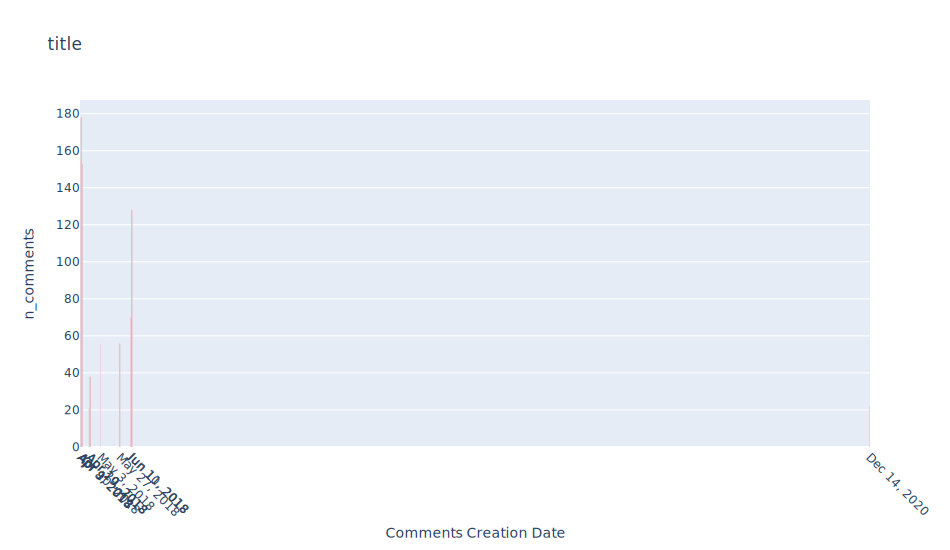

In [1431]:
bar_peaks(red_dates, "title")

In [1432]:
df_red.username.value_counts()

_abdvl._              3
the.legendary.owl     3
baydenjack            3
sharzmahmood          3
abe_xiong             3
                     ..
caio_._camo           1
hdjeoskdjdkdkdksm     1
bobbyoliverpoptart    1
zo_notfinal.wav       1
masoud_heidari.1      1
Name: username, Length: 1006, dtype: int64

<a id='inevitable'></a>
>>### I am invitable
> <ul>
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
     <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable"><b>I am inevitable</b></a></li>
 <li><a href="#nums">Only Numbers</a></li> 
 </ul>

In [1433]:
df_inev = df_comments.query(' message =="i am inevitable" ')
df_inev.head()

,message,datetime,id,n_replies,n_likes,media_id,parent_id,user_id,username,is_verified,account_url,year,month,dayofmonth,date,hour
993242,i am inevitable,2019-05-15 08:24:51,18062326633066476,0.0,0.0,2043370785717132288,n,5557721675,ronak.jain15,False,https://www.instagram.com/ronak.jain15,2019,May,15,2019-05-15,8
993263,i am inevitable,2019-05-15 16:38:36,17853256882422760,0.0,0.0,2043370785717132288,n,11161354018,_maddie_cookie_,False,https://www.instagram.com/_maddie_cookie_,2019,May,15,2019-05-15,16
993265,i am inevitable,2019-05-15 17:59:27,17963838115266740,0.0,0.0,2043370785717132288,n,6677024448,cholo_blackpanther,False,https://www.instagram.com/cholo_blackpanther,2019,May,15,2019-05-15,17
993271,i am inevitable,2019-05-15 19:38:44,17963433061265200,0.0,0.0,2043370785717132288,n,7199686219,swastikshukla1308,False,https://www.instagram.com/swastikshukla1308,2019,May,15,2019-05-15,19
993278,i am inevitable,2019-05-16 04:02:31,18033199981150260,0.0,0.0,2043370785717132288,n,8299889227,bxvin._,False,https://www.instagram.com/bxvin._,2019,May,16,2019-05-16,4


In [1434]:
df_inev.date.value_counts()

2019-05-14    128
2019-05-15     21
2019-05-16      1
2019-05-25      1
Name: date, dtype: int64

In [1435]:
inev_dates = get_top(df_inev, "date", 10, "date", "n_comments")
inev_dates

,date,n_comments
0,2019-05-14,128
1,2019-05-15,21
2,2019-05-16,1
3,2019-05-25,1


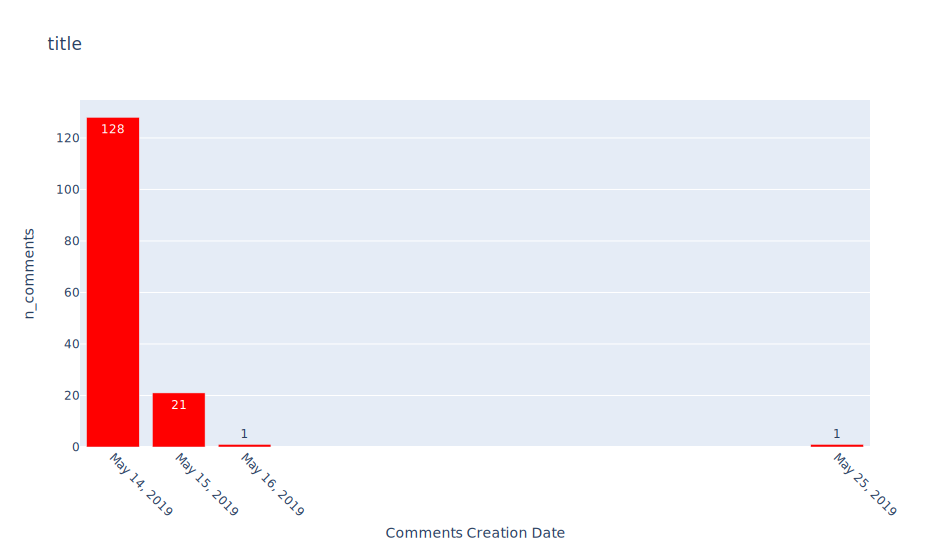

In [1436]:
bar_peaks(inev_dates, "title")

the peak day of **I am inevitable** comment is 14 May 2019

In [1437]:
df_inev.username.value_counts()

ronak.jain15           1
its_rajdeep_m          1
j.a.k.e.t.a.y.l.o.r    1
dhruvv.agrawal         1
melylunac_             1
                      ..
lyfaday                1
karthickhere           1
jamesquinn3630         1
saini_lovers           1
doughboii.2120         1
Name: username, Length: 151, dtype: int64

**This text used 136 times by different 136 users in 3 consecutive days**
- in those dates
    - 2019-05-14 	114
    - 2019-05-15 	20
    - 2019-05-16 	1
    - 2019-05-25 	1

<a id='nums'></a>
>>### Only Numbers
> <ul>
 <li><a href="#justice">#justiceforjohnnydepp</a></li>
 <li><a href="#amber">Contains "Amber"</a></li>
 <li><a href="#fuck0">Contains "F*ck"</a></li>
 <li><a href="#agree">Contains "Agree"</a></li>
     <li>--------------------------------</li>
 <li><a href="#sina">@sinadeinert @sinadeinertcf</a></li>
 <li><a href="#red">Red</a></li>  
 <li><a href="#inevitable">I am inevitable</a></li>
 <li><a href="#nums"><b>Only Numbers</b></a></li> 
 </ul>

In [1438]:
numbers = []

In [1439]:
for i in range(0, 100):
    i = str(i)
    if df_comments.query("message==@i").shape[0] > 100:
        print(i, df_comments.query("message==@i").shape[0])
        numbers.append(i)

0 133
1 2043
2 2099
3 1238
4 792
5 588
6 270
7 271
8 336
9 471
10 993
11 146


In [1440]:
df_num = df_comments.query("message in @numbers")

In [1441]:
df_num.date.value_counts()

2018-08-16    346
2018-07-13    322
2019-11-22    189
2018-07-12    189
2018-12-31    165
             ... 
2021-08-21      1
2019-09-14      1
2018-09-14      1
2018-09-20      1
2018-06-23      1
Name: date, Length: 1000, dtype: int64

In [1442]:
df_num.username.value_counts()

poison_roar_ivy      45
nicolaspezeshkian    19
nasrabadi_vahid      17
rgjas8               16
hcarney50            14
                     ..
mamaofboyz2           1
elnaz_e_naaz          1
b.doliveira           1
jaramillo8207         1
rubenizuriets         1
Name: username, Length: 8169, dtype: int64

## Negative Text

In [1443]:
neg_text

{' death',
 ' death ',
 ' go kys',
 ' raped',
 '#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abuse',
 'abuser',
 'abusing',
 'aggressively pull',
 'amber abus',
 'amber heard abus',
 'amber lunge',
 'amber-heard-abus',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'assaulted johnny',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycottamber',
 'boycottamberheard',
 'burn',
 'burn in hell',
 'change.org',
 'clawing',
 'clown',
 'cunt',
 'deathtoamber',
 'diecunt',
 'disgusting',
 'domestic violence',
 'exposing her ass',
 'fake victim',
 'felony',
 'fire amber',
 'fire her',
 'fireamberheard',
 'fireamberheardfromaquaman',
 'fired',
 'fuck  amber',
 'fuck @amberheard',
 'fuck amber',
 'fuck amber heard',
 'fuck her',
 'fuck herself',
 'fuck off',
 'fuck that bitch',
 'fuck this bitch',
 'fuck u @amberheard',
 'fuck you @amberheard',
 'fuck you amber',
 

In [1444]:
neg_dict = { 'kill': 4856,
 'kill her': 161,                   
 'kys': 147,
 'kill amber': 124, 
 'she should kys': 2,                   
 'go kys amber': 1,
                   
                   
 'death': 1799,
 ' death': 1256,
 'burn': 792,                   
 ' death ': 710,                   
 'deserves it': 178, 
 'burn in hell': 63,
 'go to hell': 105,                   
 'go die': 18, 
 'gotohell': 5,
 'to death amber': 2,  
 'burninhell': 2,                   
 'death to amber': 1,
 'deathtoamber': 1,
 'diecunt': 1,                   

                    
                  
 'abus': 17574,
 'abuse': 14013,
 'shit': 9747,                   
 'abuser': 8568,                   
 'bitch': 5989,                   
 'liar': 3134,
 'stupid': 2412,                    
 'amberheardisanabuser': 2033,
 'fired': 1840,                   
 'disgusting': 1545,                   
 'abusing': 1155,
 'bullshit': 1130,
 "shut": 1025,                   
 'amberheardisaliar': 776,
 'amber turd': 731,                   
 'cunt': 645,                   
 'expos': 550,
 'clown': 506, 
 'amberturd': 505, 
 'whor': 383,                  
 'boycottamber': 329,  
 'boycottamberheard': 324,                                    
 'ambertheabuser': 167,                   
 'amberheardisanabuserandliar': 144,
 'amber abus': 121,                   
 'amberisanabuser': 105,
 'amber heard abus': 75,
 'stupid ass': 55,
 'scammer': 32,
 'amber-heard-abus': 31,                    
 'violencehasnogender': 16,                 
 'exposingamberheard': 11,               
                                  

 'clawing': 8,
 'fire amber': 113,
 'fireamber': 356,                 
 'fire her': 318,
 'fireamberheard': 350,
 'fireamberheardfromaquaman': 22,
 'remove amber': 106,
 'removeamber': 106,                
 'remove-amber': 198,
 'removeamberheardsfromaquaman2': 57,
 'removed': 315,
                   
                                    
 'fuck amber': 1115,
 'fuck amber heard': 783, 
 'fuck her': 613,                   
 'fuckamber': 518,
 '#fuckamberheard': 489,                   
 'fuckamberheard': 494, 
 'fuck off': 425, 
 'fuckthesun': 335,
 'fuck that bitch': 182,                  
 'fucking bitch': 160,
 'fuck this bitch': 135,                   
 'fuck you amber': 120,                   
 'fucking abuser': 73,
 'fuck @amberheard': 42,
 'fuck you @amberheard': 39,
 'fucking bullshit': 31,                                    
 '@amberheard fuck you': 23,
 'fuck herself': 21,
 'fuck u @amberheard': 16,
 'fuck  amber': 16,
 'fuck amber herd': 14, 
 'fucked the right off': 1,
                    
                   
 'beaten': 173,
 'beaten up': 21,
 'get raped': 15,
 ' raped': 158,                
                   
 'victim': 3166,                     
 'assault': 482,                   
 'alcoholic': 170,
 'aggressive': 145, 
 'fake victim': 33,                   
 'aggressively pull': 5,                   
 'amber lunge': 5,
 'tugging': 5,                    
 'assaulted johnny': 16,
 'punched': 168,
 'threw a vodka bottle': 14,
 'vodka bottle': 59,                    

 'violence': 1196, 
 'violent': 1017,                   
 'petition': 865,
 'domestic violence': 636,                   
 'change.org': 479, 
 'felony': 6,                   
 'exposing her ass': 1,              

                                           
 '50 million': 70,
 '7 million': 86,
 'gold digger': 376,
 'golddigger': 71,
 
 'because she is a woman': 31,
 'because she’s a woman': 51,                   
 'how can you still have fans': 1,
 "no one will believe you're a victim because you're a man": 1,

 'jailforamberheard': 153,
 'lawsuit': 209,                   
 'jail': 1825,
 'prison': 646}

In [1445]:
my_set = set()
for key in neg_dict.keys():
    my_set.add(key)
    
my_set  

{' death',
 ' death ',
 ' raped',
 '#fuckamberheard',
 '50 million',
 '7 million',
 '@amberheard fuck you',
 'abus',
 'abuse',
 'abuser',
 'abusing',
 'aggressive',
 'aggressively pull',
 'alcoholic',
 'amber abus',
 'amber heard abus',
 'amber lunge',
 'amber turd',
 'amber-heard-abus',
 'amberheardisaliar',
 'amberheardisanabuser',
 'amberheardisanabuserandliar',
 'amberisanabuser',
 'ambertheabuser',
 'amberturd',
 'assault',
 'assaulted johnny',
 'beaten',
 'beaten up',
 'because she is a woman',
 'because she’s a woman',
 'bitch',
 'boycottamber',
 'boycottamberheard',
 'bullshit',
 'burn',
 'burn in hell',
 'burninhell',
 'change.org',
 'clawing',
 'clown',
 'cunt',
 'death',
 'death to amber',
 'deathtoamber',
 'deserves it',
 'diecunt',
 'disgusting',
 'domestic violence',
 'expos',
 'exposing her ass',
 'exposingamberheard',
 'fake victim',
 'felony',
 'fire amber',
 'fire her',
 'fireamber',
 'fireamberheard',
 'fireamberheardfromaquaman',
 'fired',
 'fuck  amber',
 'fuck @am

## Negative Users

In [1446]:
len(neg_users)

14511

In [1447]:
# To Save the negative commented users in a dictionary pkl file
import pickle

with open('negative_users.pkl', 'wb') as f:
    pickle.dump(neg_users, f)
    
with open('negative_text.pkl', 'wb') as f:
    pickle.dump(neg_dict, f)    

In [1448]:
# To Load the set of negativly commented users
with open('negative_users.pkl', 'rb') as f:
    neg_users = pickle.load(f)

# To Load the dictionary of negative text    
with open('negative_text.pkl', 'rb') as f:
    neg_dict = pickle.load(f)    

<a id = 'conclusions'></a>
## Conclusions
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions"><b>Conclusions</b></a></li>
</ul>

In [1449]:
print(
    f"The data contains {df_posts.shape[0]} posts with {df_comments.shape[0]} comments"
)

The data contains 193967 posts with 1751113 comments


In [1450]:
print(
    f"Posts were made by {df_posts['username'].nunique()} users, and {df_comments['username'].nunique()} users commented"
)

Posts were made by 36137 users, and 681174 users commented


<a id = 'end'><a/>
# END OF NOTEBOOK